In [6]:
import gbspy as g
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py

import multiprocessing as mp
from matplotlib.animation import FuncAnimation
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.ticker import AutoMinorLocator
import matplotlib.lines as mlines
from matplotlib.ticker import AutoMinorLocator

# For power quantification diagnostic
from gbspy.surfaces import get_line

# Get the current working directory|
cwd = os.getcwd()

In [8]:
# IEEE journals typically require figures to be very clear at a column width of around 3.5 to 4 inches
fig_width = 3.5  # in inches
fig_height = fig_width / 1.618  # Golden ratio height for a single subplot

plt.rcParams.update({
    # Figure size and DPI
    'figure.figsize': (fig_width, fig_width / 1.618),  # IEEE column width, golden ratio height
    'figure.dpi': 300,                     # Figure resolution
    'savefig.dpi': 300,                    # Save figure resolution
    'savefig.format': 'pdf',               # Preferred format for vector graphics

    # Font settings
    'font.size': 10,                       # Main font size
    'font.family': 'sans-serif',           # Font family
    'font.sans-serif': ['Arial', 'Helvetica', 'DejaVu Sans'],  # Font type

    # Axes settings
    'axes.labelsize': 10,                  # Font size of the x and y labels
    'axes.titlesize': 10,                  # Font size of the title
    'axes.linewidth': 1,                   # Edge line width

    # Tick settings
    'xtick.labelsize': 8,                  # Font size of the x tick labels
    'ytick.labelsize': 8,                  # Font size of the y tick labels
    'xtick.major.size': 4,                 # Length of major tick marks
    'xtick.minor.size': 2,                 # Length of minor tick marks
    'xtick.major.width': 1,                # Width of major tick marks
    'xtick.minor.width': 0.5,              # Width of minor tick marks
    'ytick.major.size': 4,                 # Length of major tick marks
    'ytick.minor.size': 2,                 # Length of minor tick marks
    'ytick.major.width': 1,                # Width of major tick marks
    'ytick.minor.width': 0.5,              # Width of minor tick marks

    # Legend settings
    'legend.fontsize': 8,                  # Font size of the legend
    'legend.frameon': True,               # Disable background frame
    'legend.edgecolor':'white',

    # Line settings
    'lines.linewidth': 1.5,                # Line width
    'lines.markersize': 5,                 # Marker size

    # Grid settings
    'grid.alpha': 0.5,                     # Grid line transparency
    'grid.linestyle': ':',                 # Grid line style

})


<div class="alert alert-block alert-info"  style="text-align: center;">
<span style="font-size: 40px;"><b> PT 0.6 </b></span><br>
</div>

In [10]:
os.chdir('/marconi_work/FUA37_TSVV2/kyungtak/GBS_DN/DN_tria/delta_scan/DPT_d0p6')

# Print the current working directory
print("Current working directory: {0}".format(cwd))

# Load GBS simulations
s=g.Sim()

Psi_PT_d0p6 = s.Psi
ixxpt_PT_d0p6 = s.ixxpt
iyxpt_PT_d0p6 = s.iyxpt
iy0_PT_d0p6 = s.iy0
ix0_PT_d0p6 = s.ix0

from gbspy.surfaces import get_line

t_final = s.time[-1]
t_init = t_final -5
bsign = s.attribute["B0sign"]
t_read = np.linspace(t_init, t_final, 101)

dens_DPT_d0p6 = s.get_field('n', t1=t_init, t2=t_final)
phi_DPT_d0p6 = s.get_field('strmf', t1=t_init, t2=t_final)

vpare_DPT_d0p6 = s.get_field('vpare', t1=t_init, t2=t_final)
vpare_DPT_d0p6_avg = np.mean(vpare_DPT_d0p6, axis=(2,3))
Te_DPT_d0p6 = s.get_field('Te', t1=t_init, t2=t_final)


# Fluctuating quantity
dens_DPT_d0p6_avg  = np.mean(dens_DPT_d0p6, axis=(2,3)); dens_DPT_d0p6_avg_tor = np.mean(dens_DPT_d0p6, axis=2)
dens_DPT_d0p6_fluct   = np.sqrt((dens_DPT_d0p6[:,:,0,:]-dens_DPT_d0p6_avg_tor)**2) / dens_DPT_d0p6_avg_tor
dens_DPT_d0p6_fluct_avg = np.mean(dens_DPT_d0p6_fluct, axis=2)

phi_DPT_d0p6_avg  = np.mean(phi_DPT_d0p6, axis=(2,3)); phi_DPT_d0p6_avg_tor = np.mean(phi_DPT_d0p6, axis=2)
phi_DPT_d0p6_fluct   = np.sqrt((phi_DPT_d0p6[:,:,0,:]-phi_DPT_d0p6_avg_tor)**2) / phi_DPT_d0p6_avg_tor
phi_DPT_d0p6_fluct_avg = np.mean(phi_DPT_d0p6_fluct, axis=2)

# Convective Heat Flux
qpare_DPT_d0p6 = (5/2) * np.mean(vpare_DPT_d0p6 * Te_DPT_d0p6 * dens_DPT_d0p6, axis=(2,3))

Current working directory: /marconi/home/userexternal/klim0000


In [12]:
from gbspy.surfaces import get_line
# For balanced DN
UI_DPT_d0p6=(158.85261121620908, 709.7637771419237)
UO_DPT_d0p6=(305.110743051502, 721.353638088224)
LI_DPT_d0p6=(158.85475695604873, 90.23778669576583)
LO_DPT_d0p6=(305.11048564829156, 78.6468451190245)


coord_UI_DPT_d0p6, length_UI_DPT_d0p6 = get_line(s, UI_DPT_d0p6, (-40,40), "psi", resolution=(40,40))
coord_UO_DPT_d0p6, length_UO_DPT_d0p6 = get_line(s, UO_DPT_d0p6, (-40,40), "psi", resolution=(40,40))
coord_LI_DPT_d0p6, length_LI_DPT_d0p6 = get_line(s, LI_DPT_d0p6, (-40,40), "psi", resolution=(40,40))
coord_LO_DPT_d0p6, length_LO_DPT_d0p6 = get_line(s, LO_DPT_d0p6, (-40,40), "psi", resolution=(40,40))

## Full length
#coord_xpt_up, length_xpt_up = get_line(s, (s.xxpt, s.yxpt), (-1,170), "chi", resolution=(40,40))
#coord_xpt_up2, length_xpt_up2 = get_line(s, (s.xxpt, s.yxpt), (-250,1), "chi", resolution=(40,40))
#coord_xpt_up3, length_xpt_up3 = get_line(s, (s.xxpt, 800-s.yxpt), (-170,1), "chi", resolution=(40,40))
#coord_xpt_up4, length_xpt_up4 = get_line(s, (s.xxpt, 800-s.yxpt), (-1,250), "chi", resolution=(40,40))

# Half length
#coord_xpt_up, length_xpt_up = get_line(s, (s.xxpt, s.yxpt), (-1,85), "chi", resolution=(40,40))
#coord_xpt_up2, length_xpt_up2 = get_line(s, (s.xxpt, s.yxpt), (-125,1), "chi", resolution=(40,40))
#coord_xpt_up3, length_xpt_up3 = get_line(s, (s.xxpt, 800-s.yxpt), (-85,1), "chi", resolution=(40,40))
#coord_xpt_up4, length_xpt_up4 = get_line(s, (s.xxpt, 800-s.yxpt), (-1,125), "chi", resolution=(40,40))

from scipy.interpolate import RectBivariateSpline
qpare_interpolant = RectBivariateSpline(s.y, s.x, qpare_DPT_d0p6)
qpare_DPT_d0p6_UI = qpare_interpolant(coord_UI_DPT_d0p6[1,:], coord_UI_DPT_d0p6[0,:], grid=False)
qpare_DPT_d0p6_UO = qpare_interpolant(coord_UO_DPT_d0p6[1,:], coord_UO_DPT_d0p6[0,:], grid=False)
qpare_DPT_d0p6_LI = qpare_interpolant(coord_LI_DPT_d0p6[1,:], coord_LI_DPT_d0p6[0,:], grid=False)
qpare_DPT_d0p6_LO = qpare_interpolant(coord_LO_DPT_d0p6[1,:], coord_LO_DPT_d0p6[0,:], grid=False)

# Apply the function to each array
Heat_DPT_d0p6_LO = np.sum(np.abs(qpare_DPT_d0p6_LO))
Heat_DPT_d0p6_UO = np.sum(np.abs(qpare_DPT_d0p6_UO))
Heat_DPT_d0p6_LI = np.sum(np.abs(qpare_DPT_d0p6_LI))
Heat_DPT_d0p6_UI = np.sum(np.abs(qpare_DPT_d0p6_UI))

# Peak Heat Flux
Peak_DPT_d0p6_LO = np.max(np.abs(qpare_DPT_d0p6_LO))
Peak_DPT_d0p6_UO = np.max(np.abs(qpare_DPT_d0p6_UO))
Peak_DPT_d0p6_LI = np.max(np.abs(qpare_DPT_d0p6_LI))
Peak_DPT_d0p6_UI = np.max(np.abs(qpare_DPT_d0p6_UI))


Heat_tot_DPT_d0p6 = Heat_DPT_d0p6_LO + Heat_DPT_d0p6_UO + Heat_DPT_d0p6_LI + Heat_DPT_d0p6_UI
Peak_tot_DPT_d0p6 = Peak_DPT_d0p6_LO + Peak_DPT_d0p6_UO + Peak_DPT_d0p6_LI + Peak_DPT_d0p6_UI

chart_tot_DPT_d0p6 = [Heat_DPT_d0p6_LO, Heat_DPT_d0p6_UO, Heat_DPT_d0p6_LI, Heat_DPT_d0p6_UI] / Heat_tot_DPT_d0p6
chart_peak_DPT_d0p6= [Peak_DPT_d0p6_LO, Peak_DPT_d0p6_UO, Peak_DPT_d0p6_LI, Peak_DPT_d0p6_UI] / Peak_tot_DPT_d0p6

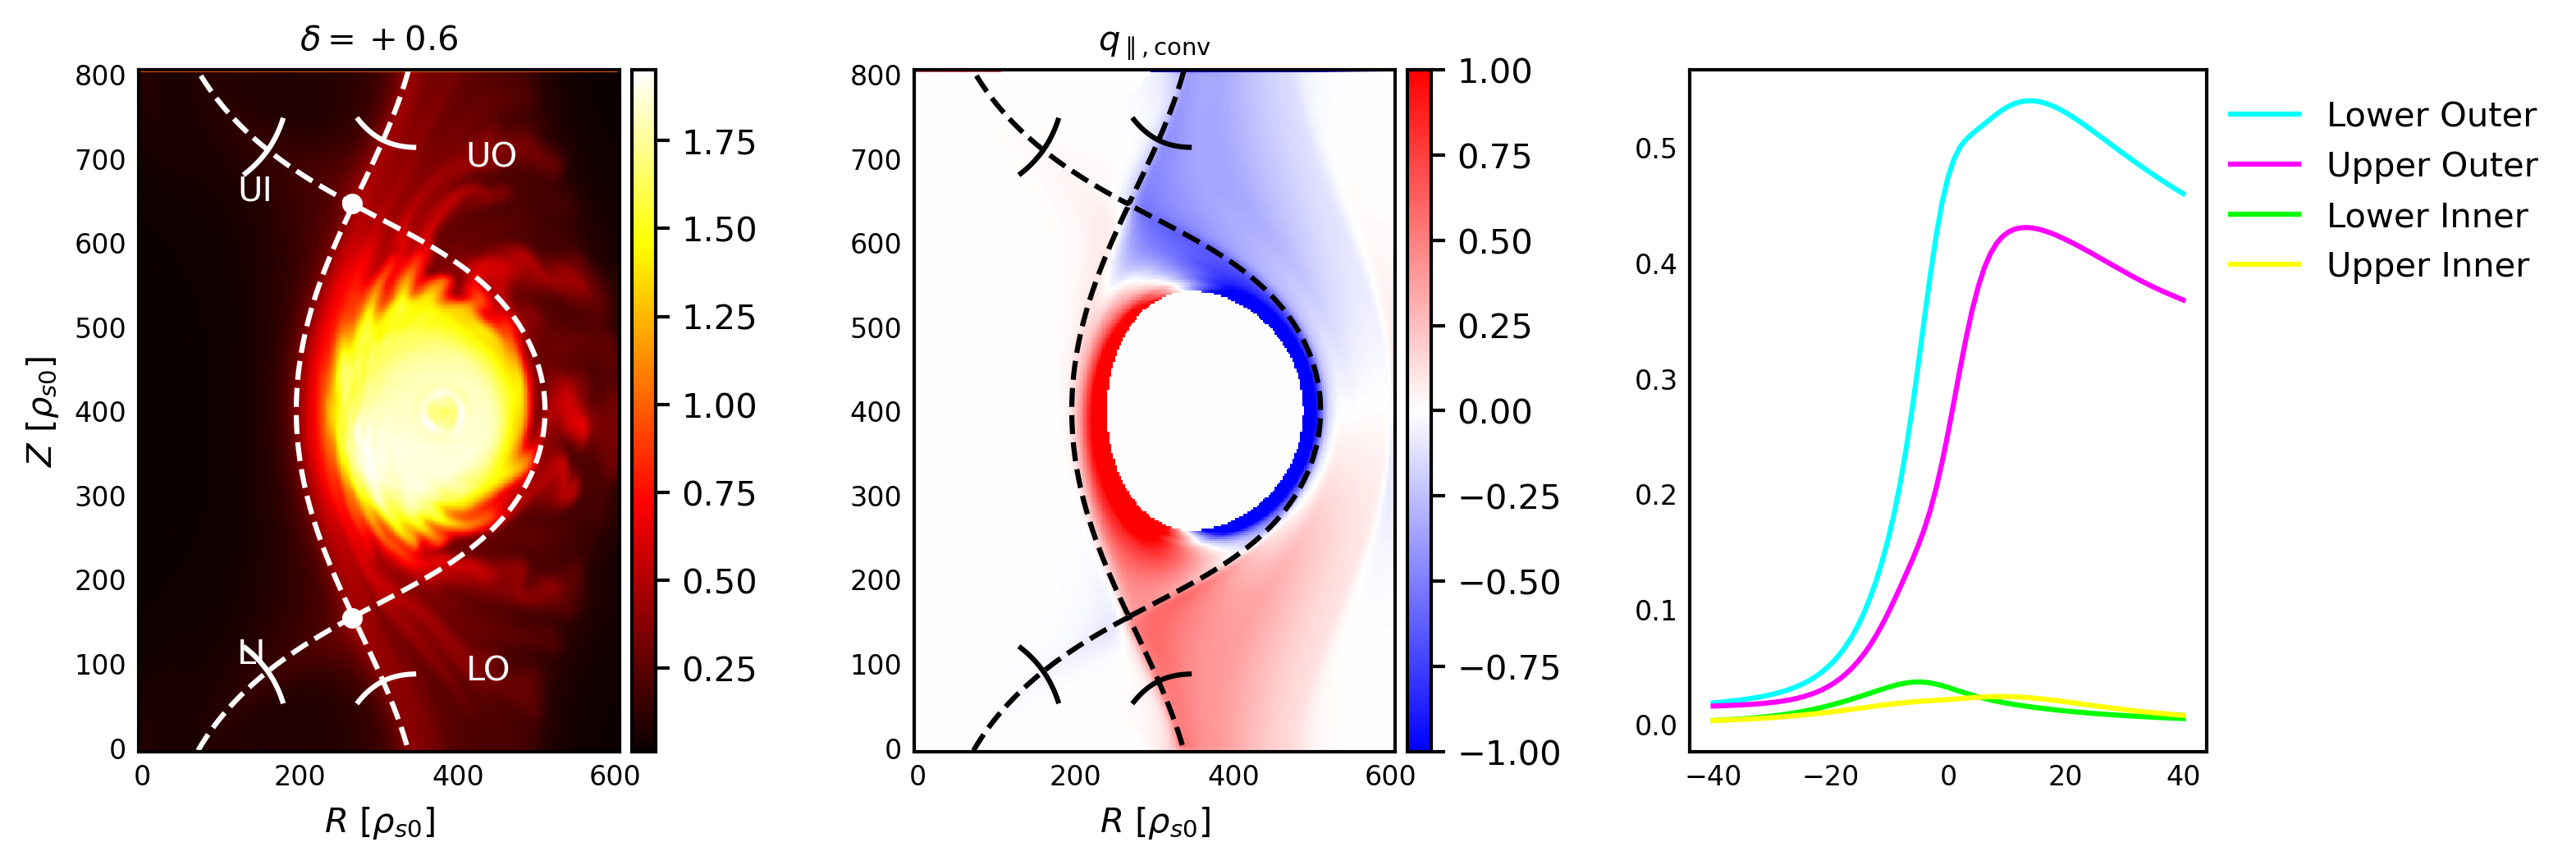

In [14]:
fig, axes = plt.subplots(ncols=3, figsize=(3*fig_width, 1.6*fig_height))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.4)

X,Y = np.meshgrid(s.x, s.y)

cs0=axes[0].pcolormesh(X, Y, dens_DPT_d0p6[:,:,0,-1], cmap='hot', rasterized=True)
divider = make_axes_locatable(axes[0])
cax0 = divider.append_axes('right', size='5%', pad=0.05)
cbar0 = fig.colorbar(cs0, cax=cax0, orientation='vertical')
cbar0.ax.tick_params(labelsize=10)  # Adjusted size

###############################################################################
qpare_DPT_d0p6_masked = np.copy(qpare_DPT_d0p6)

# Apply mask for the core region
for i in range(s.ny):
    for j in range(s.nx):
        if Psi_PT_d0p6[i,j] < Psi_PT_d0p6[iy0_PT_d0p6,ix0_PT_d0p6]+6000:
            qpare_DPT_d0p6_masked[i,j]=0.0
################################################################################            

cs1=axes[1].pcolormesh(X, Y, qpare_DPT_d0p6_masked, cmap='bwr', vmin=-1, vmax=1, rasterized=True)
divider = make_axes_locatable(axes[1])
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar1 = fig.colorbar(cs1, cax=cax1, orientation='vertical')
cbar1.ax.tick_params(labelsize=10)  # Adjusted size

axes[0].scatter(s.xxpt, s.yxpt, c='w')
axes[0].scatter(s.xxpt, 800-s.yxpt, c='w')

#ax.scatter(UI_DPT_d0p6)

axes[0].plot(coord_UI_DPT_d0p6[0,:], coord_UI_DPT_d0p6[1,:], c='w', linestyle='-')
axes[0].plot(coord_UO_DPT_d0p6[0,:], coord_UO_DPT_d0p6[1,:], c='w', linestyle='-')
axes[0].plot(coord_LI_DPT_d0p6[0,:], coord_LI_DPT_d0p6[1,:], c='w', linestyle='-')
axes[0].plot(coord_LO_DPT_d0p6[0,:], coord_LO_DPT_d0p6[1,:], c='w', linestyle='-')

# Plot Separatrix
axes[0].contour(X, Y, Psi_PT_d0p6, levels=[Psi_PT_d0p6[iyxpt_PT_d0p6, ixxpt_PT_d0p6]], colors='w', linestyles='--')
axes[1].contour(X, Y, Psi_PT_d0p6, levels=[Psi_PT_d0p6[iyxpt_PT_d0p6, ixxpt_PT_d0p6]], colors='k', linestyles='--')

axes[1].plot(coord_UI_DPT_d0p6[0,:], coord_UI_DPT_d0p6[1,:], c='k', linestyle='-')
axes[1].plot(coord_UO_DPT_d0p6[0,:], coord_UO_DPT_d0p6[1,:], c='k', linestyle='-')
axes[1].plot(coord_LI_DPT_d0p6[0,:], coord_LI_DPT_d0p6[1,:], c='k', linestyle='-')
axes[1].plot(coord_LO_DPT_d0p6[0,:], coord_LO_DPT_d0p6[1,:], c='k', linestyle='-')

axes[2].plot(length_LO_DPT_d0p6, np.abs(qpare_DPT_d0p6_LO), label="Lower Outer", c='cyan')
axes[2].plot(length_UO_DPT_d0p6, np.abs(qpare_DPT_d0p6_UO), label="Upper Outer", c='magenta')
axes[2].plot(length_LI_DPT_d0p6, np.abs(qpare_DPT_d0p6_LI), label="Lower Inner", c='lime')
axes[2].plot(length_UI_DPT_d0p6, np.abs(qpare_DPT_d0p6_UI), label="Upper Inner", c='yellow')

for ax in axes:
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='minor', direction="in", size=0.2, width=0.2)
    ax.tick_params(which='major', direction="in", size=0.5, width=0.4)


axes[0].set_xlabel(r'$R\,\,[\rho_{s0}]$')
axes[1].set_xlabel(r'$R\,\,[\rho_{s0}]$')
axes[0].set_ylabel(r'$Z\,\,[\rho_{s0}]$', rotation=90)
    
axes[0].text(410, 80, 'LO', style ='normal', family='sans-serif', color ="w")
axes[0].text(120, 100, 'LI', style ='normal', family='sans-serif', color ="w")
axes[0].text(410, 690, 'UO', style ='normal', family='sans-serif', color ="w")
axes[0].text(120, 650, 'UI', style ='normal', family='sans-serif', color ="w")

axes[0].set_title(r'$\delta=+0.6$')
axes[1].set_title(r'$q_{\parallel, \rm{conv}}$')

leg=axes[2].legend(bbox_to_anchor=(1.7, 1.), loc='upper right', edgecolor='white', prop={'size': 10}, 
         facecolor='white', framealpha=0)

# Save the figure
dpi_val = 300
home_directory = os.path.expanduser('~')
os.chdir(home_directory)
#plt.savefig("DN_PT_getline_d0p6.pdf", bbox_inches='tight', format='pdf', pad_inches=0.01, dpi=dpi_val)

<div class="alert alert-block alert-info"  style="text-align: center;">
<span style="font-size: 40px;"><b> Now, Negative Triangularity (NT) </b></span><br>
</div>

<div class="alert alert-block alert-info"  style="text-align: center;">
<span style="font-size: 40px;"><b> NT -0.6 </b></span><br>
</div>

In [16]:
os.chdir('/marconi_work/FUA37_TSVV2/kyungtak/GBS_DN/DN_tria/delta_scan/DNT_dn0p6')

# Load GBS simulations
s=g.Sim()

t_final = s.time[-1]
t_init = t_final -5
t_read = np.linspace(t_init, t_final, 101)

Psi_NT_dn0p6 = s.Psi
ixxpt_NT_dn0p6 = s.ixxpt
iyxpt_NT_dn0p6 = s.iyxpt
iy0_NT_dn0p6 = s.iy0
ix0_NT_dn0p6 = s.ix0

dens_DNT_dn0p6  = s.get_field('n', t1=t_init, t2=t_final)
vpare_DNT_dn0p6 = s.get_field('vpare', t1=t_init, t2=t_final)
Te_DNT_dn0p6 = s.get_field('Te', t1=t_init, t2=t_final)
phi_DNT_dn0p6 = s.get_field('strmf', t1=t_init, t2=t_final)

vpare_DNT_dn0p6_avg = np.mean(vpare_DNT_dn0p6, axis=(2,3))

# Fluctuating quantity
dens_DNT_dn0p6_avg  = np.mean(dens_DNT_dn0p6, axis=(2,3)); dens_DNT_dn0p6_avg_tor = np.mean(dens_DNT_dn0p6, axis=2)
dens_DNT_dn0p6_fluct   = np.sqrt((dens_DNT_dn0p6[:,:,0,:]-dens_DNT_dn0p6_avg_tor)**2) / dens_DNT_dn0p6_avg_tor
dens_DNT_dn0p6_fluct_avg = np.mean(dens_DNT_dn0p6_fluct, axis=2)

phi_DNT_dn0p6_avg  = np.mean(phi_DNT_dn0p6, axis=(2,3)); phi_DNT_dn0p6_avg_tor = np.mean(phi_DNT_dn0p6, axis=2)
phi_DNT_dn0p6_fluct   = np.sqrt((phi_DNT_dn0p6[:,:,0,:]-phi_DNT_dn0p6_avg_tor)**2) / phi_DNT_dn0p6_avg_tor
phi_DNT_dn0p6_fluct_avg = np.mean(phi_DNT_dn0p6_fluct, axis=2)

# Convective Heat Flux
qpare_DNT_dn0p6 = (5/2) * np.mean(vpare_DNT_dn0p6 * Te_DNT_dn0p6 * dens_DNT_dn0p6, axis=(2,3))

In [18]:
# For balanced DN
UO_DNT_dn0p6=(456.5503784658009, 709.075944151039)
UI_DNT_dn0p6=(310.36118514691896, 721.6963043686486)
LI_DNT_dn0p6=(310.3629879445284, 78.30729369710014)
LO_DNT_dn0p6=(456.5471511382758, 90.92656834368125)

coord_UI_DNT_dn0p6, length_UI_DNT_dn0p6 = get_line(s, UI_DNT_dn0p6, (-40,40), "psi", resolution=(40,40))
coord_UO_DNT_dn0p6, length_UO_DNT_dn0p6 = get_line(s, UO_DNT_dn0p6, (-40,40), "psi", resolution=(40,40))
coord_LI_DNT_dn0p6, length_LI_DNT_dn0p6 = get_line(s, LI_DNT_dn0p6, (-40,40), "psi", resolution=(40,40))
coord_LO_DNT_dn0p6, length_LO_DNT_dn0p6 = get_line(s, LO_DNT_dn0p6, (-40,40), "psi", resolution=(40,40))

# Half length
#coord_xpt_up, length_xpt_up = get_line(s, (s.xxpt, s.yxpt), (-1,125), "chi", resolution=(40,125))
#coord_xpt_up2, length_xpt_up2 = get_line(s, (s.xxpt, s.yxpt), (-85,1), "chi", resolution=(40,40))
#coord_xpt_up3, length_xpt_up3 = get_line(s, (s.xxpt, 800-s.yxpt), (-1,85), "chi", resolution=(40,40))
#coord_xpt_up4, length_xpt_up4 = get_line(s, (s.xxpt, 800-s.yxpt), (-125,1), "chi", resolution=(40,40))


from scipy.interpolate import RectBivariateSpline
qpare_interpolant = RectBivariateSpline(s.y, s.x, qpare_DNT_dn0p6)
qpare_DNT_dn0p6_UI = qpare_interpolant(coord_UI_DNT_dn0p6[1,:], coord_UI_DNT_dn0p6[0,:], grid=False)
qpare_DNT_dn0p6_UO = qpare_interpolant(coord_UO_DNT_dn0p6[1,:], coord_UO_DNT_dn0p6[0,:], grid=False)
qpare_DNT_dn0p6_LI = qpare_interpolant(coord_LI_DNT_dn0p6[1,:], coord_LI_DNT_dn0p6[0,:], grid=False)
qpare_DNT_dn0p6_LO = qpare_interpolant(coord_LO_DNT_dn0p6[1,:], coord_LO_DNT_dn0p6[0,:], grid=False)


# Apply the function to each array
Heat_DNT_dn0p6_LO = np.sum(np.abs(qpare_DNT_dn0p6_LO))
Heat_DNT_dn0p6_UO = np.sum(np.abs(qpare_DNT_dn0p6_UO))
Heat_DNT_dn0p6_LI = np.sum(np.abs(qpare_DNT_dn0p6_LI))
Heat_DNT_dn0p6_UI = np.sum(np.abs(qpare_DNT_dn0p6_UI))

# Peak Heat Flux
Peak_DNT_dn0p6_LO = np.max(np.abs(qpare_DNT_dn0p6_LO))
Peak_DNT_dn0p6_UO = np.max(np.abs(qpare_DNT_dn0p6_UO))
Peak_DNT_dn0p6_LI = np.max(np.abs(qpare_DNT_dn0p6_LI))
Peak_DNT_dn0p6_UI = np.max(np.abs(qpare_DNT_dn0p6_UI))

Heat_tot_DNT_dn0p6 = Heat_DNT_dn0p6_LO + Heat_DNT_dn0p6_UO + Heat_DNT_dn0p6_LI + Heat_DNT_dn0p6_UI
Peak_tot_DNT_dn0p6 = Peak_DNT_dn0p6_LO + Peak_DNT_dn0p6_UO + Peak_DNT_dn0p6_LI + Peak_DNT_dn0p6_UI

chart_tot_DNT_dn0p6 = [Heat_DNT_dn0p6_LO, Heat_DNT_dn0p6_UO, Heat_DNT_dn0p6_LI, Heat_DNT_dn0p6_UI] / Heat_tot_DNT_dn0p6
chart_peak_DNT_dn0p6= [Peak_DNT_dn0p6_LO, Peak_DNT_dn0p6_UO, Peak_DNT_dn0p6_LI, Peak_DNT_dn0p6_UI] / Peak_tot_DNT_dn0p6

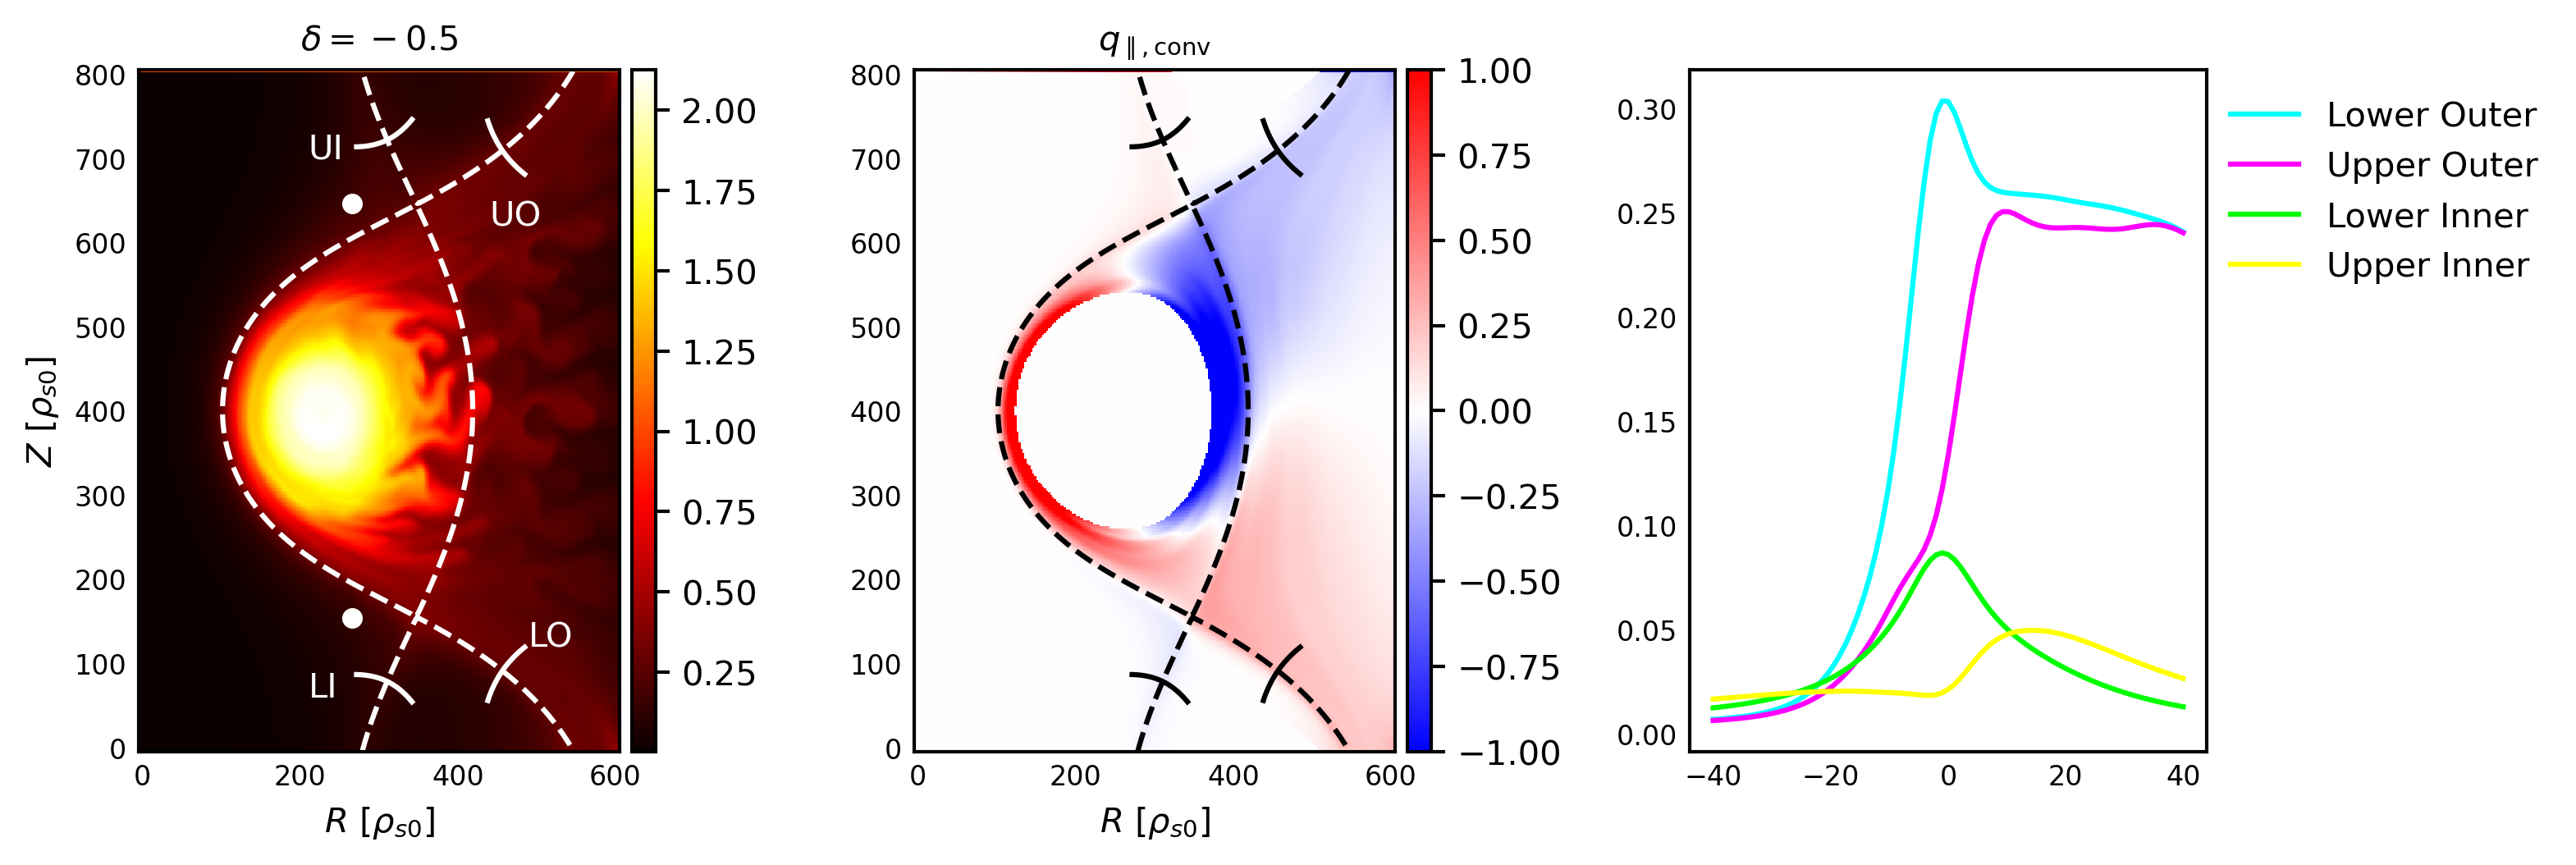

In [20]:
fig, axes = plt.subplots(ncols=3, figsize=(3*fig_width, 1.6*fig_height))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.4)

X,Y = np.meshgrid(s.x, s.y)

cs0=axes[0].pcolormesh(X, Y, dens_DNT_dn0p6[:,:,0,-1], cmap='hot', rasterized=True)
divider = make_axes_locatable(axes[0])
cax0 = divider.append_axes('right', size='5%', pad=0.05)
cbar0 = fig.colorbar(cs0, cax=cax0, orientation='vertical')
cbar0.ax.tick_params(labelsize=10)  # Adjusted size

###############################################################################
qpare_DNT_dn0p6_masked = np.copy(qpare_DNT_dn0p6)

# Apply mask for the core region
for i in range(s.ny):
    for j in range(s.nx):
        if Psi_NT_dn0p6[i,j] < Psi_NT_dn0p6[iy0_NT_dn0p6,ix0_NT_dn0p6]+6000:
            qpare_DNT_dn0p6_masked[i,j]=0.0
################################################################################            

cs1=axes[1].pcolormesh(X, Y, qpare_DNT_dn0p6_masked, cmap='bwr', vmin=-1, vmax=1, rasterized=True)
divider = make_axes_locatable(axes[1])
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar1 = fig.colorbar(cs1, cax=cax1, orientation='vertical')
cbar1.ax.tick_params(labelsize=10)  # Adjusted size

axes[0].scatter(s.xxpt, s.yxpt, c='w')
axes[0].scatter(s.xxpt, 800-s.yxpt, c='w')

#ax.scatter(UI_DNT_dn0p6)

axes[0].plot(coord_UI_DNT_dn0p6[0,:], coord_UI_DNT_dn0p6[1,:], c='w', linestyle='-')
axes[0].plot(coord_UO_DNT_dn0p6[0,:], coord_UO_DNT_dn0p6[1,:], c='w', linestyle='-')
axes[0].plot(coord_LI_DNT_dn0p6[0,:], coord_LI_DNT_dn0p6[1,:], c='w', linestyle='-')
axes[0].plot(coord_LO_DNT_dn0p6[0,:], coord_LO_DNT_dn0p6[1,:], c='w', linestyle='-')

# Plot Separatrix
axes[0].contour(X, Y, Psi_NT_dn0p6, levels=[Psi_NT_dn0p6[iyxpt_NT_dn0p6, ixxpt_NT_dn0p6]], colors='w', linestyles='--')
axes[1].contour(X, Y, Psi_NT_dn0p6, levels=[Psi_NT_dn0p6[iyxpt_NT_dn0p6, ixxpt_NT_dn0p6]], colors='k', linestyles='--')


axes[1].plot(coord_UI_DNT_dn0p6[0,:], coord_UI_DNT_dn0p6[1,:], c='k', linestyle='-')
axes[1].plot(coord_UO_DNT_dn0p6[0,:], coord_UO_DNT_dn0p6[1,:], c='k', linestyle='-')
axes[1].plot(coord_LI_DNT_dn0p6[0,:], coord_LI_DNT_dn0p6[1,:], c='k', linestyle='-')
axes[1].plot(coord_LO_DNT_dn0p6[0,:], coord_LO_DNT_dn0p6[1,:], c='k', linestyle='-')

axes[2].plot(length_LO_DNT_dn0p6, np.abs(qpare_DNT_dn0p6_LO), label="Lower Outer", c='cyan')
axes[2].plot(length_UO_DNT_dn0p6, np.abs(qpare_DNT_dn0p6_UO), label="Upper Outer", c='magenta')
axes[2].plot(length_LI_DNT_dn0p6, np.abs(qpare_DNT_dn0p6_LI), label="Lower Inner", c='lime')
axes[2].plot(length_UI_DNT_dn0p6, np.abs(qpare_DNT_dn0p6_UI), label="Upper Inner", c='yellow')

for ax in axes:
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='minor', direction="in", size=0.2, width=0.2)
    ax.tick_params(which='major', direction="in", size=0.5, width=0.4)


axes[0].set_xlabel(r'$R\,\,[\rho_{s0}]$')
axes[1].set_xlabel(r'$R\,\,[\rho_{s0}]$')
axes[0].set_ylabel(r'$Z\,\,[\rho_{s0}]$', rotation=90)
    
axes[0].text(490, 120, 'LO', style ='normal', family='sans-serif', color ="w")
axes[0].text(210, 60, 'LI', style ='normal', family='sans-serif', color ="w")
axes[0].text(440, 620, 'UO', style ='normal', family='sans-serif', color ="w")
axes[0].text(210, 700, 'UI', style ='normal', family='sans-serif', color ="w")

axes[0].set_title(r'$\delta=-0.5$')
axes[1].set_title(r'$q_{\parallel, \rm{conv}}$')

leg=axes[2].legend(bbox_to_anchor=(1.7, 1.), loc='upper right', edgecolor='white', prop={'size': 10}, 
         facecolor='white', framealpha=0)

# Save the figure
dpi_val = 300
home_directory = os.path.expanduser('~')
os.chdir(home_directory)
#plt.savefig("DN_PT_getline_dn0p6.pdf", bbox_inches='tight', format='pdf', pad_inches=0.01, dpi=dpi_val)

<div class="alert alert-block alert-info"  style="text-align: center;">
<span style="font-size: 40px;"><b> Load nuscan </b></span><br>
</div>

<div class="alert alert-block alert-info"  style="text-align: center;">
<span style="font-size: 20px;"><b> DPT $\nu_0=0.1$ </b></span><br>
</div>

In [22]:
os.chdir('/marconi_work/FUA37_TSVV2/kyungtak/GBS_DN/DN_tria/nu_scan/DPT_nu0p1')

# Print the current working directory
print("Current working directory: {0}".format(cwd))

# Load GBS simulations
s=g.Sim()

Psi_PT_nu0p1 = s.Psi
ixxpt_PT_nu0p1 = s.ixxpt
iyxpt_PT_nu0p1 = s.iyxpt
iy0_PT_nu0p1 = s.iy0
ix0_PT_nu0p1 = s.ix0

t_final = s.time[-1]
t_init = t_final -5
bsign = s.attribute["B0sign"]
t_read = np.linspace(t_init, t_final, 101)

dens_DPT_nu0p1 = s.get_field('n', t1=t_init, t2=t_final)
phi_DPT_nu0p1 = s.get_field('strmf', t1=t_init, t2=t_final)
vpare_DPT_nu0p1 = s.get_field('vpare', t1=t_init, t2=t_final)
vpare_DPT_nu0p1_avg = np.mean(vpare_DPT_nu0p1, axis=(2,3))
Te_DPT_nu0p1 = s.get_field('Te', t1=t_init, t2=t_final)


# Fluctuating quantity
dens_DPT_nu0p1_avg  = np.mean(dens_DPT_nu0p1, axis=(2,3)); dens_DPT_nu0p1_avg_tor = np.mean(dens_DPT_nu0p1, axis=2)
dens_DPT_nu0p1_fluct   = np.sqrt((dens_DPT_nu0p1[:,:,0,:]-dens_DPT_nu0p1_avg_tor)**2) / dens_DPT_nu0p1_avg_tor
dens_DPT_nu0p1_fluct_avg = np.mean(dens_DPT_nu0p1_fluct, axis=2)

phi_DPT_nu0p1_avg  = np.mean(phi_DPT_nu0p1, axis=(2,3)); phi_DPT_nu0p1_avg_tor = np.mean(phi_DPT_nu0p1, axis=2)
phi_DPT_nu0p1_fluct   = np.sqrt((phi_DPT_nu0p1[:,:,0,:]-phi_DPT_nu0p1_avg_tor)**2) / phi_DPT_nu0p1_avg_tor
phi_DPT_nu0p1_fluct_avg = np.mean(phi_DPT_nu0p1_fluct, axis=2)

# Convective Heat Flux
qpare_DPT_nu0p1 = (5/2) * np.mean(vpare_DPT_nu0p1 * Te_DPT_nu0p1 * dens_DPT_nu0p1, axis=(2,3))

Current working directory: /marconi/home/userexternal/klim0000


In [24]:
from gbspy.surfaces import get_line
# For balanced DN
UI_DPT_nu0p1=(158.85261121620908, 709.7637771419237)
UO_DPT_nu0p1=(305.110743051502, 721.353638088224)
LI_DPT_nu0p1=(158.85475695604873, 90.23778669576583)
LO_DPT_nu0p1=(305.11048564829156, 78.6468451190245)


coord_UI_DPT_nu0p1, length_UI_DPT_nu0p1 = get_line(s, UI_DPT_nu0p1, (-40,40), "psi", resolution=(40,40))
coord_UO_DPT_nu0p1, length_UO_DPT_nu0p1 = get_line(s, UO_DPT_nu0p1, (-40,40), "psi", resolution=(40,40))
coord_LI_DPT_nu0p1, length_LI_DPT_nu0p1 = get_line(s, LI_DPT_nu0p1, (-40,40), "psi", resolution=(40,40))
coord_LO_DPT_nu0p1, length_LO_DPT_nu0p1 = get_line(s, LO_DPT_nu0p1, (-40,40), "psi", resolution=(40,40))

## Full length
#coord_xpt_up, length_xpt_up = get_line(s, (s.xxpt, s.yxpt), (-1,170), "chi", resolution=(40,40))
#coord_xpt_up2, length_xpt_up2 = get_line(s, (s.xxpt, s.yxpt), (-250,1), "chi", resolution=(40,40))
#coord_xpt_up3, length_xpt_up3 = get_line(s, (s.xxpt, 800-s.yxpt), (-170,1), "chi", resolution=(40,40))
#coord_xpt_up4, length_xpt_up4 = get_line(s, (s.xxpt, 800-s.yxpt), (-1,250), "chi", resolution=(40,40))

# Half length
#coord_xpt_up, length_xpt_up = get_line(s, (s.xxpt, s.yxpt), (-1,85), "chi", resolution=(40,40))
#coord_xpt_up2, length_xpt_up2 = get_line(s, (s.xxpt, s.yxpt), (-125,1), "chi", resolution=(40,40))
#coord_xpt_up3, length_xpt_up3 = get_line(s, (s.xxpt, 800-s.yxpt), (-85,1), "chi", resolution=(40,40))
#coord_xpt_up4, length_xpt_up4 = get_line(s, (s.xxpt, 800-s.yxpt), (-1,125), "chi", resolution=(40,40))

from scipy.interpolate import RectBivariateSpline
qpare_interpolant = RectBivariateSpline(s.y, s.x, qpare_DPT_nu0p1)
qpare_DPT_nu0p1_UI = qpare_interpolant(coord_UI_DPT_nu0p1[1,:], coord_UI_DPT_nu0p1[0,:], grid=False)
qpare_DPT_nu0p1_UO = qpare_interpolant(coord_UO_DPT_nu0p1[1,:], coord_UO_DPT_nu0p1[0,:], grid=False)
qpare_DPT_nu0p1_LI = qpare_interpolant(coord_LI_DPT_nu0p1[1,:], coord_LI_DPT_nu0p1[0,:], grid=False)
qpare_DPT_nu0p1_LO = qpare_interpolant(coord_LO_DPT_nu0p1[1,:], coord_LO_DPT_nu0p1[0,:], grid=False)

# Apply the function to each array
Heat_DPT_nu0p1_LO = np.sum(np.abs(qpare_DPT_nu0p1_LO))
Heat_DPT_nu0p1_UO = np.sum(np.abs(qpare_DPT_nu0p1_UO))
Heat_DPT_nu0p1_LI = np.sum(np.abs(qpare_DPT_nu0p1_LI))
Heat_DPT_nu0p1_UI = np.sum(np.abs(qpare_DPT_nu0p1_UI))

# Peak Heat Flux
Peak_DPT_nu0p1_LO = np.max(np.abs(qpare_DPT_nu0p1_LO))
Peak_DPT_nu0p1_UO = np.max(np.abs(qpare_DPT_nu0p1_UO))
Peak_DPT_nu0p1_LI = np.max(np.abs(qpare_DPT_nu0p1_LI))
Peak_DPT_nu0p1_UI = np.max(np.abs(qpare_DPT_nu0p1_UI))


Heat_tot_DPT_nu0p1 = Heat_DPT_nu0p1_LO + Heat_DPT_nu0p1_UO + Heat_DPT_nu0p1_LI + Heat_DPT_nu0p1_UI
Peak_tot_DPT_nu0p1 = Peak_DPT_nu0p1_LO + Peak_DPT_nu0p1_UO + Peak_DPT_nu0p1_LI + Peak_DPT_nu0p1_UI

chart_tot_DPT_nu0p1 = [Heat_DPT_nu0p1_LO, Heat_DPT_nu0p1_UO, Heat_DPT_nu0p1_LI, Heat_DPT_nu0p1_UI] / Heat_tot_DPT_nu0p1
chart_peak_DPT_nu0p1= [Peak_DPT_nu0p1_LO, Peak_DPT_nu0p1_UO, Peak_DPT_nu0p1_LI, Peak_DPT_nu0p1_UI] / Peak_tot_DPT_nu0p1

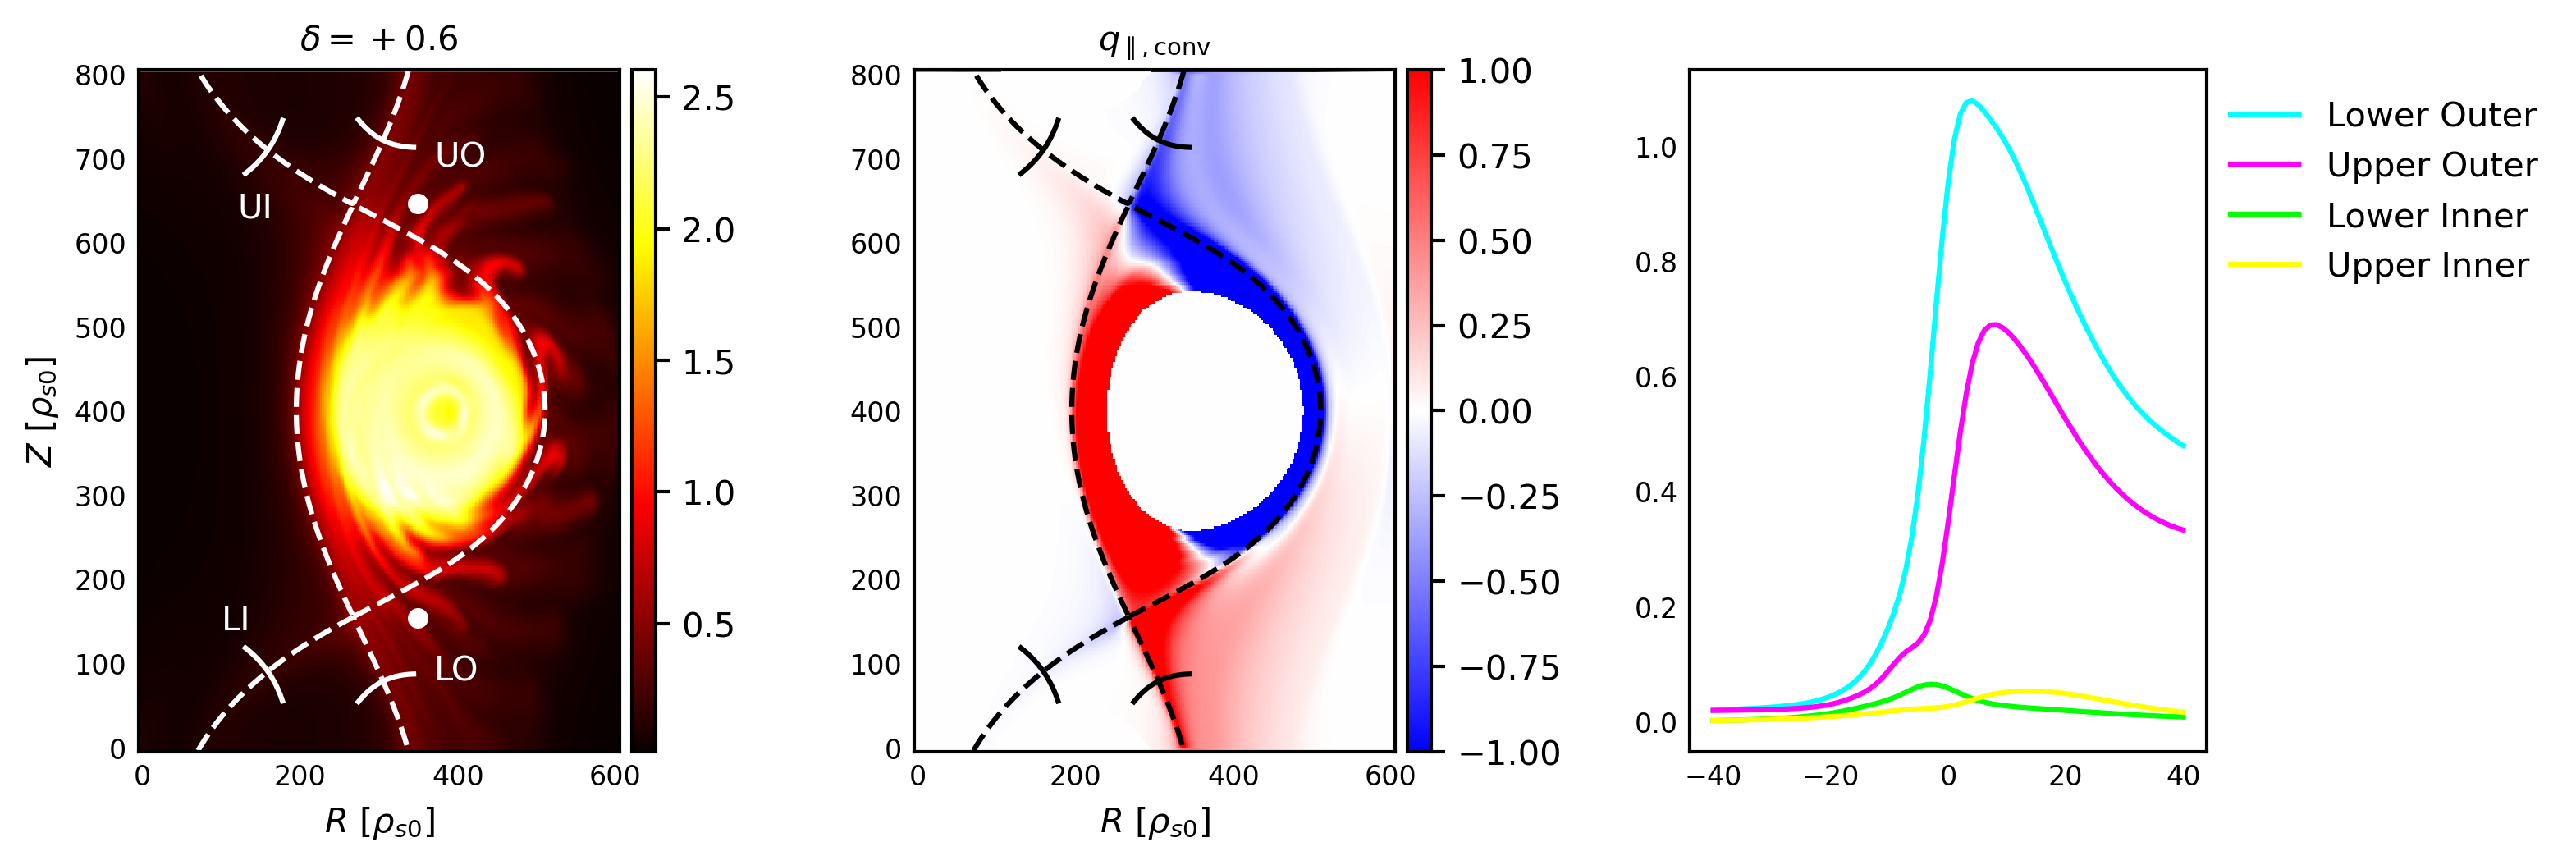

In [26]:
fig, axes = plt.subplots(ncols=3, figsize=(3*fig_width, 1.6*fig_height))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.4)

X,Y = np.meshgrid(s.x, s.y)

cs0=axes[0].pcolormesh(X, Y, dens_DPT_nu0p1[:,:,0,-1], cmap='hot', rasterized=True)
divider = make_axes_locatable(axes[0])
cax0 = divider.append_axes('right', size='5%', pad=0.05)
cbar0 = fig.colorbar(cs0, cax=cax0, orientation='vertical')
cbar0.ax.tick_params(labelsize=10)  # Adjusted size

###############################################################################
qpare_DPT_nu0p1_masked = np.copy(qpare_DPT_nu0p1)
# Apply mask for the core region
for i in range(s.ny):
    for j in range(s.nx):
        if Psi_PT_nu0p1[i,j] < Psi_PT_nu0p1[iy0_PT_nu0p1,ix0_PT_nu0p1]+6000:
            qpare_DPT_nu0p1_masked[i,j]=0.0
################################################################################            

cs1=axes[1].pcolormesh(X, Y, qpare_DPT_nu0p1_masked, cmap='bwr', vmin=-1, vmax=1, rasterized=True)
divider = make_axes_locatable(axes[1])
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar1 = fig.colorbar(cs1, cax=cax1, orientation='vertical')
cbar1.ax.tick_params(labelsize=10)  # Adjusted size

axes[0].scatter(s.xxpt, s.yxpt, c='w')
axes[0].scatter(s.xxpt, 800-s.yxpt, c='w')

#ax.scatter(UI_DPT_nu0p1)

axes[0].plot(coord_UI_DPT_nu0p1[0,:], coord_UI_DPT_nu0p1[1,:], c='w', linestyle='-')
axes[0].plot(coord_UO_DPT_nu0p1[0,:], coord_UO_DPT_nu0p1[1,:], c='w', linestyle='-')
axes[0].plot(coord_LI_DPT_nu0p1[0,:], coord_LI_DPT_nu0p1[1,:], c='w', linestyle='-')
axes[0].plot(coord_LO_DPT_nu0p1[0,:], coord_LO_DPT_nu0p1[1,:], c='w', linestyle='-')

# Plot Separatrix
axes[0].contour(X, Y, Psi_PT_nu0p1, levels=[Psi_PT_nu0p1[iyxpt_PT_nu0p1, ixxpt_PT_nu0p1]], colors='w', linestyles='--')
axes[1].contour(X, Y, Psi_PT_nu0p1, levels=[Psi_PT_nu0p1[iyxpt_PT_nu0p1, ixxpt_PT_nu0p1]], colors='k', linestyles='--')

axes[1].plot(coord_UI_DPT_nu0p1[0,:], coord_UI_DPT_nu0p1[1,:], c='k', linestyle='-')
axes[1].plot(coord_UO_DPT_nu0p1[0,:], coord_UO_DPT_nu0p1[1,:], c='k', linestyle='-')
axes[1].plot(coord_LI_DPT_nu0p1[0,:], coord_LI_DPT_nu0p1[1,:], c='k', linestyle='-')
axes[1].plot(coord_LO_DPT_nu0p1[0,:], coord_LO_DPT_nu0p1[1,:], c='k', linestyle='-')

axes[2].plot(length_LO_DPT_nu0p1, np.abs(qpare_DPT_nu0p1_LO), label="Lower Outer", c='cyan')
axes[2].plot(length_UO_DPT_nu0p1, np.abs(qpare_DPT_nu0p1_UO), label="Upper Outer", c='magenta')
axes[2].plot(length_LI_DPT_nu0p1, np.abs(qpare_DPT_nu0p1_LI), label="Lower Inner", c='lime')
axes[2].plot(length_UI_DPT_nu0p1, np.abs(qpare_DPT_nu0p1_UI), label="Upper Inner", c='yellow')

for ax in axes:
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='minor', direction="in", size=0.2, width=0.2)
    ax.tick_params(which='major', direction="in", size=0.5, width=0.4)


axes[0].set_xlabel(r'$R\,\,[\rho_{s0}]$')
axes[1].set_xlabel(r'$R\,\,[\rho_{s0}]$')
axes[0].set_ylabel(r'$Z\,\,[\rho_{s0}]$', rotation=90)
    
axes[0].text(370, 80, 'LO', style ='normal', family='sans-serif', color ="w")
axes[0].text(100, 140, 'LI', style ='normal', family='sans-serif', color ="w")
axes[0].text(370, 690, 'UO', style ='normal', family='sans-serif', color ="w")
axes[0].text(120, 630, 'UI', style ='normal', family='sans-serif', color ="w")

axes[0].set_title(r'$\delta=+0.6$')
axes[1].set_title(r'$q_{\parallel, \rm{conv}}$')

leg=axes[2].legend(bbox_to_anchor=(1.7, 1.), loc='upper right', edgecolor='white', prop={'size': 10}, 
         facecolor='white', framealpha=0)

# Save the figure
dpi_val = 300
home_directory = os.path.expanduser('~')
os.chdir(home_directory)
#plt.savefig("DN_PT_getline_nu0p1.pdf", bbox_inches='tight', format='pdf', pad_inches=0.01, dpi=dpi_val)

<div class="alert alert-block alert-info"  style="text-align: center;">
<span style="font-size: 20px;"><b> DPT $\nu_0=1$ </b></span><br>
</div>

In [28]:
os.chdir('/marconi_work/FUA37_TSVV2/kyungtak/GBS_DN/DN_tria/nu_scan/DPT_nu1')

# Print the current working directory
print("Current working directory: {0}".format(cwd))

# Load GBS simulations
s=g.Sim()

Psi_PT_nu1 = s.Psi
ixxpt_PT_nu1 = s.ixxpt
iyxpt_PT_nu1 = s.iyxpt
iy0_PT_nu1 = s.iy0
ix0_PT_nu1 = s.ix0

t_final = s.time[-1]
t_init = t_final -5
bsign = s.attribute["B0sign"]
t_read = np.linspace(t_init, t_final, 101)

dens_DPT_nu1 = s.get_field('n', t1=t_init, t2=t_final)
phi_DPT_nu1 = s.get_field('strmf', t1=t_init, t2=t_final)
vpare_DPT_nu1 = s.get_field('vpare', t1=t_init, t2=t_final)
vpare_DPT_nu1_avg = np.mean(vpare_DPT_nu1, axis=(2,3))
Te_DPT_nu1 = s.get_field('Te', t1=t_init, t2=t_final)


# Fluctuating quantity
dens_DPT_nu1_avg  = np.mean(dens_DPT_nu1, axis=(2,3)); dens_DPT_nu1_avg_tor = np.mean(dens_DPT_nu1, axis=2)
dens_DPT_nu1_fluct   = np.sqrt((dens_DPT_nu1[:,:,0,:]-dens_DPT_nu1_avg_tor)**2) / dens_DPT_nu1_avg_tor
dens_DPT_nu1_fluct_avg = np.mean(dens_DPT_nu1_fluct, axis=2)

phi_DPT_nu1_avg  = np.mean(phi_DPT_nu1, axis=(2,3)); phi_DPT_nu1_avg_tor = np.mean(phi_DPT_nu1, axis=2)
phi_DPT_nu1_fluct   = np.sqrt((phi_DPT_nu1[:,:,0,:]-phi_DPT_nu1_avg_tor)**2) / phi_DPT_nu1_avg_tor
phi_DPT_nu1_fluct_avg = np.mean(phi_DPT_nu1_fluct, axis=2)

# Convective Heat Flux
qpare_DPT_nu1 = (5/2) * np.mean(vpare_DPT_nu1 * Te_DPT_nu1 * dens_DPT_nu1, axis=(2,3))

Current working directory: /marconi/home/userexternal/klim0000


In [30]:
from gbspy.surfaces import get_line
# For balanced DN
UI_DPT_nu1=(158.85261121620908, 709.7637771419237)
UO_DPT_nu1=(305.110743051502, 721.353638088224)
LI_DPT_nu1=(158.85475695604873, 90.23778669576583)
LO_DPT_nu1=(305.11048564829156, 78.6468451190245)


coord_UI_DPT_nu1, length_UI_DPT_nu1 = get_line(s, UI_DPT_nu1, (-40,40), "psi", resolution=(40,40))
coord_UO_DPT_nu1, length_UO_DPT_nu1 = get_line(s, UO_DPT_nu1, (-40,40), "psi", resolution=(40,40))
coord_LI_DPT_nu1, length_LI_DPT_nu1 = get_line(s, LI_DPT_nu1, (-40,40), "psi", resolution=(40,40))
coord_LO_DPT_nu1, length_LO_DPT_nu1 = get_line(s, LO_DPT_nu1, (-40,40), "psi", resolution=(40,40))

## Full length
#coord_xpt_up, length_xpt_up = get_line(s, (s.xxpt, s.yxpt), (-1,170), "chi", resolution=(40,40))
#coord_xpt_up2, length_xpt_up2 = get_line(s, (s.xxpt, s.yxpt), (-250,1), "chi", resolution=(40,40))
#coord_xpt_up3, length_xpt_up3 = get_line(s, (s.xxpt, 800-s.yxpt), (-170,1), "chi", resolution=(40,40))
#coord_xpt_up4, length_xpt_up4 = get_line(s, (s.xxpt, 800-s.yxpt), (-1,250), "chi", resolution=(40,40))

# Half length
#coord_xpt_up, length_xpt_up = get_line(s, (s.xxpt, s.yxpt), (-1,85), "chi", resolution=(40,40))
#coord_xpt_up2, length_xpt_up2 = get_line(s, (s.xxpt, s.yxpt), (-125,1), "chi", resolution=(40,40))
#coord_xpt_up3, length_xpt_up3 = get_line(s, (s.xxpt, 800-s.yxpt), (-85,1), "chi", resolution=(40,40))
#coord_xpt_up4, length_xpt_up4 = get_line(s, (s.xxpt, 800-s.yxpt), (-1,125), "chi", resolution=(40,40))

from scipy.interpolate import RectBivariateSpline
qpare_interpolant = RectBivariateSpline(s.y, s.x, qpare_DPT_nu1)
qpare_DPT_nu1_UI = qpare_interpolant(coord_UI_DPT_nu1[1,:], coord_UI_DPT_nu1[0,:], grid=False)
qpare_DPT_nu1_UO = qpare_interpolant(coord_UO_DPT_nu1[1,:], coord_UO_DPT_nu1[0,:], grid=False)
qpare_DPT_nu1_LI = qpare_interpolant(coord_LI_DPT_nu1[1,:], coord_LI_DPT_nu1[0,:], grid=False)
qpare_DPT_nu1_LO = qpare_interpolant(coord_LO_DPT_nu1[1,:], coord_LO_DPT_nu1[0,:], grid=False)

# Apply the function to each array
Heat_DPT_nu1_LO = np.sum(np.abs(qpare_DPT_nu1_LO))
Heat_DPT_nu1_UO = np.sum(np.abs(qpare_DPT_nu1_UO))
Heat_DPT_nu1_LI = np.sum(np.abs(qpare_DPT_nu1_LI))
Heat_DPT_nu1_UI = np.sum(np.abs(qpare_DPT_nu1_UI))

# Peak Heat Flux
Peak_DPT_nu1_LO = np.max(np.abs(qpare_DPT_nu1_LO))
Peak_DPT_nu1_UO = np.max(np.abs(qpare_DPT_nu1_UO))
Peak_DPT_nu1_LI = np.max(np.abs(qpare_DPT_nu1_LI))
Peak_DPT_nu1_UI = np.max(np.abs(qpare_DPT_nu1_UI))


Heat_tot_DPT_nu1 = Heat_DPT_nu1_LO + Heat_DPT_nu1_UO + Heat_DPT_nu1_LI + Heat_DPT_nu1_UI
Peak_tot_DPT_nu1 = Peak_DPT_nu1_LO + Peak_DPT_nu1_UO + Peak_DPT_nu1_LI + Peak_DPT_nu1_UI

chart_tot_DPT_nu1 = [Heat_DPT_nu1_LO, Heat_DPT_nu1_UO, Heat_DPT_nu1_LI, Heat_DPT_nu1_UI] / Heat_tot_DPT_nu1
chart_peak_DPT_nu1= [Peak_DPT_nu1_LO, Peak_DPT_nu1_UO, Peak_DPT_nu1_LI, Peak_DPT_nu1_UI] / Peak_tot_DPT_nu1

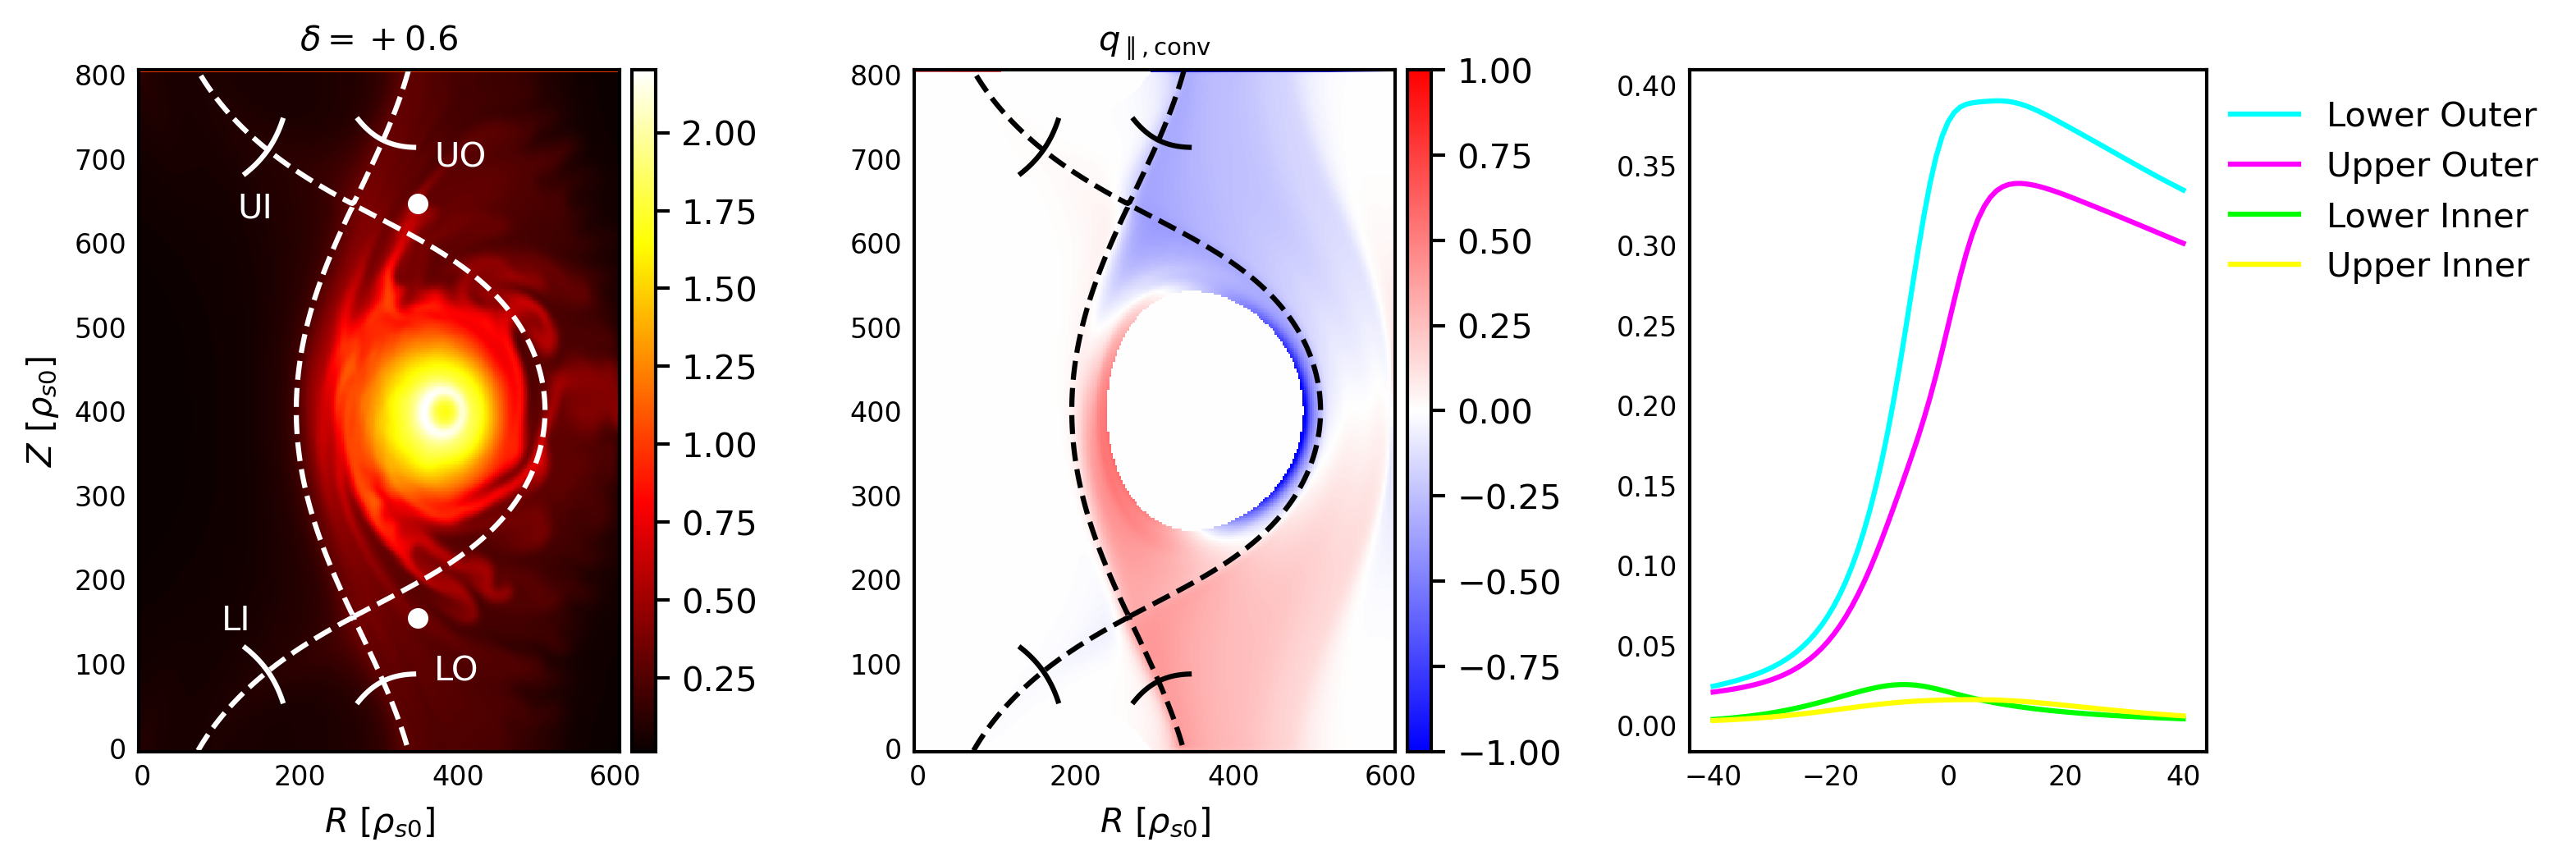

In [32]:
fig, axes = plt.subplots(ncols=3, figsize=(3*fig_width, 1.6*fig_height))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.4)

X,Y = np.meshgrid(s.x, s.y)

cs0=axes[0].pcolormesh(X, Y, dens_DPT_nu1[:,:,0,-1], cmap='hot', rasterized=True)
divider = make_axes_locatable(axes[0])
cax0 = divider.append_axes('right', size='5%', pad=0.05)
cbar0 = fig.colorbar(cs0, cax=cax0, orientation='vertical')
cbar0.ax.tick_params(labelsize=10)  # Adjusted size

###############################################################################
qpare_DPT_nu1_masked = np.copy(qpare_DPT_nu1)
# Apply mask for the core region
for i in range(s.ny):
    for j in range(s.nx):
        if Psi_PT_nu1[i,j] < Psi_PT_nu1[iy0_PT_nu1,ix0_PT_nu1]+6000:
            qpare_DPT_nu1_masked[i,j]=0.0
################################################################################            

cs1=axes[1].pcolormesh(X, Y, qpare_DPT_nu1_masked, cmap='bwr', vmin=-1, vmax=1, rasterized=True)
divider = make_axes_locatable(axes[1])
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar1 = fig.colorbar(cs1, cax=cax1, orientation='vertical')
cbar1.ax.tick_params(labelsize=10)  # Adjusted size

axes[0].scatter(s.xxpt, s.yxpt, c='w')
axes[0].scatter(s.xxpt, 800-s.yxpt, c='w')

#ax.scatter(UI_DPT_nu1)

axes[0].plot(coord_UI_DPT_nu1[0,:], coord_UI_DPT_nu1[1,:], c='w', linestyle='-')
axes[0].plot(coord_UO_DPT_nu1[0,:], coord_UO_DPT_nu1[1,:], c='w', linestyle='-')
axes[0].plot(coord_LI_DPT_nu1[0,:], coord_LI_DPT_nu1[1,:], c='w', linestyle='-')
axes[0].plot(coord_LO_DPT_nu1[0,:], coord_LO_DPT_nu1[1,:], c='w', linestyle='-')

# Plot Separatrix
axes[0].contour(X, Y, Psi_PT_nu1, levels=[Psi_PT_nu1[iyxpt_PT_nu1, ixxpt_PT_nu1]], colors='w', linestyles='--')
axes[1].contour(X, Y, Psi_PT_nu1, levels=[Psi_PT_nu1[iyxpt_PT_nu1, ixxpt_PT_nu1]], colors='k', linestyles='--')

axes[1].plot(coord_UI_DPT_nu1[0,:], coord_UI_DPT_nu1[1,:], c='k', linestyle='-')
axes[1].plot(coord_UO_DPT_nu1[0,:], coord_UO_DPT_nu1[1,:], c='k', linestyle='-')
axes[1].plot(coord_LI_DPT_nu1[0,:], coord_LI_DPT_nu1[1,:], c='k', linestyle='-')
axes[1].plot(coord_LO_DPT_nu1[0,:], coord_LO_DPT_nu1[1,:], c='k', linestyle='-')

axes[2].plot(length_LO_DPT_nu1, np.abs(qpare_DPT_nu1_LO), label="Lower Outer", c='cyan')
axes[2].plot(length_UO_DPT_nu1, np.abs(qpare_DPT_nu1_UO), label="Upper Outer", c='magenta')
axes[2].plot(length_LI_DPT_nu1, np.abs(qpare_DPT_nu1_LI), label="Lower Inner", c='lime')
axes[2].plot(length_UI_DPT_nu1, np.abs(qpare_DPT_nu1_UI), label="Upper Inner", c='yellow')

for ax in axes:
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='minor', direction="in", size=0.2, width=0.2)
    ax.tick_params(which='major', direction="in", size=0.5, width=0.4)


axes[0].set_xlabel(r'$R\,\,[\rho_{s0}]$')
axes[1].set_xlabel(r'$R\,\,[\rho_{s0}]$')
axes[0].set_ylabel(r'$Z\,\,[\rho_{s0}]$', rotation=90)
    
axes[0].text(370, 80, 'LO', style ='normal', family='sans-serif', color ="w")
axes[0].text(100, 140, 'LI', style ='normal', family='sans-serif', color ="w")
axes[0].text(370, 690, 'UO', style ='normal', family='sans-serif', color ="w")
axes[0].text(120, 630, 'UI', style ='normal', family='sans-serif', color ="w")

axes[0].set_title(r'$\delta=+0.6$')
axes[1].set_title(r'$q_{\parallel, \rm{conv}}$')

leg=axes[2].legend(bbox_to_anchor=(1.7, 1.), loc='upper right', edgecolor='white', prop={'size': 10}, 
         facecolor='white', framealpha=0)

# Save the figure
dpi_val = 300
home_directory = os.path.expanduser('~')
os.chdir(home_directory)
#plt.savefig("DN_PT_getline_nu1.pdf", bbox_inches='tight', format='pdf', pad_inches=0.01, dpi=dpi_val)

<div class="alert alert-block alert-info"  style="text-align: center;">
<span style="font-size: 20px;"><b> DNT $\nu_0=0.1$ </b></span><br>
</div>

In [34]:
os.chdir('/marconi_work/FUA37_TSVV2/kyungtak/GBS_DN/DN_tria/nu_scan/DNT_nu0p1')

# Load GBS simulations
s=g.Sim()

t_final = s.time[-1]
t_init = t_final -5
t_read = np.linspace(t_init, t_final, 101)

Psi_NT_nu0p1 = s.Psi
ixxpt_NT_nu0p1 = s.ixxpt
iyxpt_NT_nu0p1 = s.iyxpt
iy0_NT_nu0p1 = s.iy0
ix0_NT_nu0p1 = s.ix0

dens_DNT_nu0p1  = s.get_field('n', t1=t_init, t2=t_final)
vpare_DNT_nu0p1 = s.get_field('vpare', t1=t_init, t2=t_final)
Te_DNT_nu0p1 = s.get_field('Te', t1=t_init, t2=t_final)
phi_DNT_nu0p1 = s.get_field('strmf', t1=t_init, t2=t_final)

vpare_DNT_nu0p1_avg = np.mean(vpare_DNT_nu0p1, axis=(2,3))

# Fluctuating quantity
dens_DNT_nu0p1_avg  = np.mean(dens_DNT_nu0p1, axis=(2,3)); dens_DNT_nu0p1_avg_tor = np.mean(dens_DNT_nu0p1, axis=2)
dens_DNT_nu0p1_fluct   = np.sqrt((dens_DNT_nu0p1[:,:,0,:]-dens_DNT_nu0p1_avg_tor)**2) / dens_DNT_nu0p1_avg_tor
dens_DNT_nu0p1_fluct_avg = np.mean(dens_DNT_nu0p1_fluct, axis=2)

phi_DNT_nu0p1_avg  = np.mean(phi_DNT_nu0p1, axis=(2,3)); phi_DNT_nu0p1_avg_tor = np.mean(phi_DNT_nu0p1, axis=2)
phi_DNT_nu0p1_fluct   = np.sqrt((phi_DNT_nu0p1[:,:,0,:]-phi_DNT_nu0p1_avg_tor)**2) / phi_DNT_nu0p1_avg_tor
phi_DNT_nu0p1_fluct_avg = np.mean(phi_DNT_nu0p1_fluct, axis=2)

# Convective Heat Flux
qpare_DNT_nu0p1 = (5/2) * np.mean(vpare_DNT_nu0p1 * Te_DNT_nu0p1 * dens_DNT_nu0p1, axis=(2,3))

In [36]:
# For balanced DN
UO_DNT_nu0p1=(456.5503784658009, 709.075944151039)
UI_DNT_nu0p1=(310.36118514691896, 721.6963043686486)
LI_DNT_nu0p1=(310.3629879445284, 78.30729369710014)
LO_DNT_nu0p1=(456.5471511382758, 90.92656834368125)

coord_UI_DNT_nu0p1, length_UI_DNT_nu0p1 = get_line(s, UI_DNT_nu0p1, (-40,40), "psi", resolution=(40,40))
coord_UO_DNT_nu0p1, length_UO_DNT_nu0p1 = get_line(s, UO_DNT_nu0p1, (-40,40), "psi", resolution=(40,40))
coord_LI_DNT_nu0p1, length_LI_DNT_nu0p1 = get_line(s, LI_DNT_nu0p1, (-40,40), "psi", resolution=(40,40))
coord_LO_DNT_nu0p1, length_LO_DNT_nu0p1 = get_line(s, LO_DNT_nu0p1, (-40,40), "psi", resolution=(40,40))

# Half length
#coord_xpt_up, length_xpt_up = get_line(s, (s.xxpt, s.yxpt), (-1,125), "chi", resolution=(40,125))
#coord_xpt_up2, length_xpt_up2 = get_line(s, (s.xxpt, s.yxpt), (-85,1), "chi", resolution=(40,40))
#coord_xpt_up3, length_xpt_up3 = get_line(s, (s.xxpt, 800-s.yxpt), (-1,85), "chi", resolution=(40,40))
#coord_xpt_up4, length_xpt_up4 = get_line(s, (s.xxpt, 800-s.yxpt), (-125,1), "chi", resolution=(40,40))


from scipy.interpolate import RectBivariateSpline
qpare_interpolant = RectBivariateSpline(s.y, s.x, qpare_DNT_nu0p1)
qpare_DNT_nu0p1_UI = qpare_interpolant(coord_UI_DNT_nu0p1[1,:], coord_UI_DNT_nu0p1[0,:], grid=False)
qpare_DNT_nu0p1_UO = qpare_interpolant(coord_UO_DNT_nu0p1[1,:], coord_UO_DNT_nu0p1[0,:], grid=False)
qpare_DNT_nu0p1_LI = qpare_interpolant(coord_LI_DNT_nu0p1[1,:], coord_LI_DNT_nu0p1[0,:], grid=False)
qpare_DNT_nu0p1_LO = qpare_interpolant(coord_LO_DNT_nu0p1[1,:], coord_LO_DNT_nu0p1[0,:], grid=False)


# Apply the function to each array
Heat_DNT_nu0p1_LO = np.sum(np.abs(qpare_DNT_nu0p1_LO))
Heat_DNT_nu0p1_UO = np.sum(np.abs(qpare_DNT_nu0p1_UO))
Heat_DNT_nu0p1_LI = np.sum(np.abs(qpare_DNT_nu0p1_LI))
Heat_DNT_nu0p1_UI = np.sum(np.abs(qpare_DNT_nu0p1_UI))

# Peak Heat Flux
Peak_DNT_nu0p1_LO = np.max(np.abs(qpare_DNT_nu0p1_LO))
Peak_DNT_nu0p1_UO = np.max(np.abs(qpare_DNT_nu0p1_UO))
Peak_DNT_nu0p1_LI = np.max(np.abs(qpare_DNT_nu0p1_LI))
Peak_DNT_nu0p1_UI = np.max(np.abs(qpare_DNT_nu0p1_UI))

Heat_tot_DNT_nu0p1 = Heat_DNT_nu0p1_LO + Heat_DNT_nu0p1_UO + Heat_DNT_nu0p1_LI + Heat_DNT_nu0p1_UI
Peak_tot_DNT_nu0p1 = Peak_DNT_nu0p1_LO + Peak_DNT_nu0p1_UO + Peak_DNT_nu0p1_LI + Peak_DNT_nu0p1_UI


# Calculating the proportion of each element
chart_tot = [Heat_DNT_nu0p1_LO, Heat_DNT_nu0p1_UO, Heat_DNT_nu0p1_LI, Heat_DNT_nu0p1_UI] / Heat_tot_DNT_nu0p1
chart_peak= [Peak_DNT_nu0p1_LO, Peak_DNT_nu0p1_UO, Peak_DNT_nu0p1_LI, Peak_DNT_nu0p1_UI] / Peak_tot_DNT_nu0p1

chart_tot_DNT_nu0p1 = [Heat_DNT_nu0p1_LO, Heat_DNT_nu0p1_UO, Heat_DNT_nu0p1_LI, Heat_DNT_nu0p1_UI] / Heat_tot_DNT_nu0p1
chart_peak_DNT_nu0p1= [Peak_DNT_nu0p1_LO, Peak_DNT_nu0p1_UO, Peak_DNT_nu0p1_LI, Peak_DNT_nu0p1_UI] / Peak_tot_DNT_nu0p1

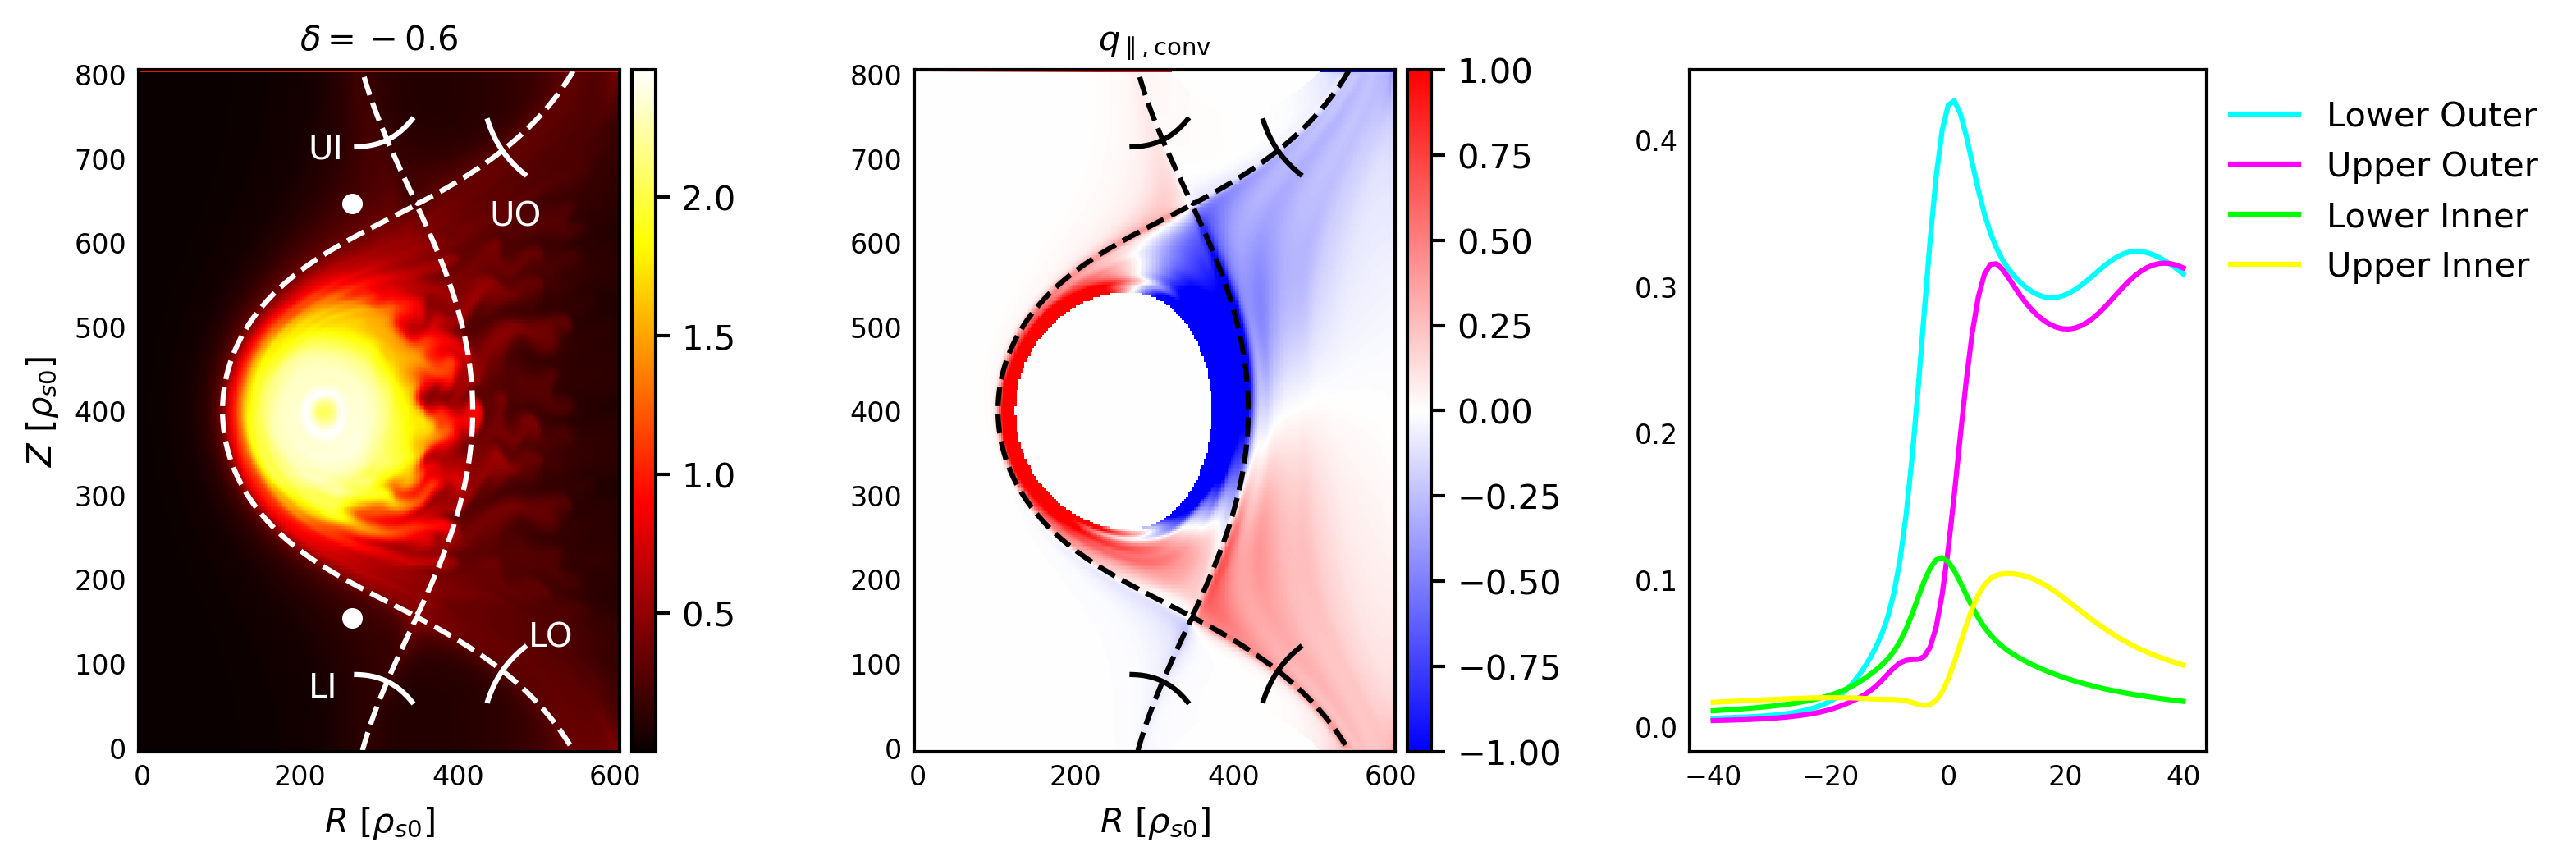

In [38]:
fig, axes = plt.subplots(ncols=3, figsize=(3*fig_width, 1.6*fig_height))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.4)

X,Y = np.meshgrid(s.x, s.y)

cs0=axes[0].pcolormesh(X, Y, dens_DNT_nu0p1[:,:,0,-1], cmap='hot', rasterized=True)
divider = make_axes_locatable(axes[0])
cax0 = divider.append_axes('right', size='5%', pad=0.05)
cbar0 = fig.colorbar(cs0, cax=cax0, orientation='vertical')
cbar0.ax.tick_params(labelsize=10)  # Adjusted size

###############################################################################
qpare_DNT_nu0p1_masked = np.copy(qpare_DNT_nu0p1)

# Apply mask for the core region
for i in range(s.ny):
    for j in range(s.nx):
        if Psi_NT_nu0p1[i,j] < Psi_NT_nu0p1[iy0_NT_nu0p1,ix0_NT_nu0p1]+6000:
            qpare_DNT_nu0p1_masked[i,j]=0.0
################################################################################            

cs1=axes[1].pcolormesh(X, Y, qpare_DNT_nu0p1_masked, cmap='bwr', vmin=-1, vmax=1, rasterized=True)
divider = make_axes_locatable(axes[1])
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar1 = fig.colorbar(cs1, cax=cax1, orientation='vertical')
cbar1.ax.tick_params(labelsize=10)  # Adjusted size

axes[0].scatter(s.xxpt, s.yxpt, c='w')
axes[0].scatter(s.xxpt, 800-s.yxpt, c='w')

#ax.scatter(UI_DNT_nu0p1)

axes[0].plot(coord_UI_DNT_nu0p1[0,:], coord_UI_DNT_nu0p1[1,:], c='w', linestyle='-')
axes[0].plot(coord_UO_DNT_nu0p1[0,:], coord_UO_DNT_nu0p1[1,:], c='w', linestyle='-')
axes[0].plot(coord_LI_DNT_nu0p1[0,:], coord_LI_DNT_nu0p1[1,:], c='w', linestyle='-')
axes[0].plot(coord_LO_DNT_nu0p1[0,:], coord_LO_DNT_nu0p1[1,:], c='w', linestyle='-')

# Plot Separatrix
axes[0].contour(X, Y, Psi_NT_nu0p1, levels=[Psi_NT_nu0p1[iyxpt_NT_nu0p1, ixxpt_NT_nu0p1]], colors='w', linestyles='--')
axes[1].contour(X, Y, Psi_NT_nu0p1, levels=[Psi_NT_nu0p1[iyxpt_NT_nu0p1, ixxpt_NT_nu0p1]], colors='k', linestyles='--')

axes[1].plot(coord_UI_DNT_nu0p1[0,:], coord_UI_DNT_nu0p1[1,:], c='k', linestyle='-')
axes[1].plot(coord_UO_DNT_nu0p1[0,:], coord_UO_DNT_nu0p1[1,:], c='k', linestyle='-')
axes[1].plot(coord_LI_DNT_nu0p1[0,:], coord_LI_DNT_nu0p1[1,:], c='k', linestyle='-')
axes[1].plot(coord_LO_DNT_nu0p1[0,:], coord_LO_DNT_nu0p1[1,:], c='k', linestyle='-')

axes[2].plot(length_LO_DNT_nu0p1, np.abs(qpare_DNT_nu0p1_LO), label="Lower Outer", c='cyan')
axes[2].plot(length_UO_DNT_nu0p1, np.abs(qpare_DNT_nu0p1_UO), label="Upper Outer", c='magenta')
axes[2].plot(length_LI_DNT_nu0p1, np.abs(qpare_DNT_nu0p1_LI), label="Lower Inner", c='lime')
axes[2].plot(length_UI_DNT_nu0p1, np.abs(qpare_DNT_nu0p1_UI), label="Upper Inner", c='yellow')

for ax in axes:
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='minor', direction="in", size=0.2, width=0.2)
    ax.tick_params(which='major', direction="in", size=0.5, width=0.4)


axes[0].set_xlabel(r'$R\,\,[\rho_{s0}]$')
axes[1].set_xlabel(r'$R\,\,[\rho_{s0}]$')
axes[0].set_ylabel(r'$Z\,\,[\rho_{s0}]$', rotation=90)
    
axes[0].text(490, 120, 'LO', style ='normal', family='sans-serif', color ="w")
axes[0].text(210, 60, 'LI', style ='normal', family='sans-serif', color ="w")
axes[0].text(440, 620, 'UO', style ='normal', family='sans-serif', color ="w")
axes[0].text(210, 700, 'UI', style ='normal', family='sans-serif', color ="w")

axes[0].set_title(r'$\delta=-0.6$')
axes[1].set_title(r'$q_{\parallel, \rm{conv}}$')

leg=axes[2].legend(bbox_to_anchor=(1.7, 1.), loc='upper right', edgecolor='white', prop={'size': 10}, 
         facecolor='white', framealpha=0)

# Save the figure
dpi_val = 300
home_directory = os.path.expanduser('~')
os.chdir(home_directory)
#plt.savefig("DN_PT_getline_nu0p1.pdf", bbox_inches='tight', format='pdf', pad_inches=0.01, dpi=dpi_val)

<div class="alert alert-block alert-info"  style="text-align: center;">
<span style="font-size: 20px;"><b> DNT $\nu_0=1$ </b></span><br>
</div>

In [40]:
os.chdir('/marconi_work/FUA37_TSVV2/kyungtak/GBS_DN/DN_tria/nu_scan/DNT_nu1')

# Load GBS simulations
s=g.Sim()

t_final = s.time[-1]
t_init = t_final -5
t_read = np.linspace(t_init, t_final, 101)

Psi_NT_nu1 = s.Psi
ixxpt_NT_nu1 = s.ixxpt
iyxpt_NT_nu1 = s.iyxpt
iy0_NT_nu1 = s.iy0
ix0_NT_nu1 = s.ix0

dens_DNT_nu1  = s.get_field('n', t1=t_init, t2=t_final)
vpare_DNT_nu1 = s.get_field('vpare', t1=t_init, t2=t_final)
Te_DNT_nu1 = s.get_field('Te', t1=t_init, t2=t_final)
phi_DNT_nu1 = s.get_field('strmf', t1=t_init, t2=t_final)

vpare_DNT_nu1_avg = np.mean(vpare_DNT_nu1, axis=(2,3))

# Fluctuating quantity
dens_DNT_nu1_avg  = np.mean(dens_DNT_nu1, axis=(2,3)); dens_DNT_nu1_avg_tor = np.mean(dens_DNT_nu1, axis=2)
dens_DNT_nu1_fluct   = np.sqrt((dens_DNT_nu1[:,:,0,:]-dens_DNT_nu1_avg_tor)**2) / dens_DNT_nu1_avg_tor
dens_DNT_nu1_fluct_avg = np.mean(dens_DNT_nu1_fluct, axis=2)

phi_DNT_nu1_avg  = np.mean(phi_DNT_nu1, axis=(2,3)); phi_DNT_nu1_avg_tor = np.mean(phi_DNT_nu1, axis=2)
phi_DNT_nu1_fluct   = np.sqrt((phi_DNT_nu1[:,:,0,:]-phi_DNT_nu1_avg_tor)**2) / phi_DNT_nu1_avg_tor
phi_DNT_nu1_fluct_avg = np.mean(phi_DNT_nu1_fluct, axis=2)

# Convective Heat Flux
qpare_DNT_nu1 = (5/2) * np.mean(vpare_DNT_nu1 * Te_DNT_nu1 * dens_DNT_nu1, axis=(2,3))

In [42]:
# For balanced DN
UO_DNT_nu1=(456.5503784658009, 709.075944151039)
UI_DNT_nu1=(310.36118514691896, 721.6963043686486)
LI_DNT_nu1=(310.3629879445284, 78.30729369710014)
LO_DNT_nu1=(456.5471511382758, 90.92656834368125)

coord_UI_DNT_nu1, length_UI_DNT_nu1 = get_line(s, UI_DNT_nu1, (-40,40), "psi", resolution=(40,40))
coord_UO_DNT_nu1, length_UO_DNT_nu1 = get_line(s, UO_DNT_nu1, (-40,40), "psi", resolution=(40,40))
coord_LI_DNT_nu1, length_LI_DNT_nu1 = get_line(s, LI_DNT_nu1, (-40,40), "psi", resolution=(40,40))
coord_LO_DNT_nu1, length_LO_DNT_nu1 = get_line(s, LO_DNT_nu1, (-40,40), "psi", resolution=(40,40))

# Half length
#coord_xpt_up, length_xpt_up = get_line(s, (s.xxpt, s.yxpt), (-1,125), "chi", resolution=(40,125))
#coord_xpt_up2, length_xpt_up2 = get_line(s, (s.xxpt, s.yxpt), (-85,1), "chi", resolution=(40,40))
#coord_xpt_up3, length_xpt_up3 = get_line(s, (s.xxpt, 800-s.yxpt), (-1,85), "chi", resolution=(40,40))
#coord_xpt_up4, length_xpt_up4 = get_line(s, (s.xxpt, 800-s.yxpt), (-125,1), "chi", resolution=(40,40))


from scipy.interpolate import RectBivariateSpline
qpare_interpolant = RectBivariateSpline(s.y, s.x, qpare_DNT_nu1)
qpare_DNT_nu1_UI = qpare_interpolant(coord_UI_DNT_nu1[1,:], coord_UI_DNT_nu1[0,:], grid=False)
qpare_DNT_nu1_UO = qpare_interpolant(coord_UO_DNT_nu1[1,:], coord_UO_DNT_nu1[0,:], grid=False)
qpare_DNT_nu1_LI = qpare_interpolant(coord_LI_DNT_nu1[1,:], coord_LI_DNT_nu1[0,:], grid=False)
qpare_DNT_nu1_LO = qpare_interpolant(coord_LO_DNT_nu1[1,:], coord_LO_DNT_nu1[0,:], grid=False)


# Apply the function to each array
Heat_DNT_nu1_LO = np.sum(np.abs(qpare_DNT_nu1_LO))
Heat_DNT_nu1_UO = np.sum(np.abs(qpare_DNT_nu1_UO))
Heat_DNT_nu1_LI = np.sum(np.abs(qpare_DNT_nu1_LI))
Heat_DNT_nu1_UI = np.sum(np.abs(qpare_DNT_nu1_UI))

# Peak Heat Flux
Peak_DNT_nu1_LO = np.max(np.abs(qpare_DNT_nu1_LO))
Peak_DNT_nu1_UO = np.max(np.abs(qpare_DNT_nu1_UO))
Peak_DNT_nu1_LI = np.max(np.abs(qpare_DNT_nu1_LI))
Peak_DNT_nu1_UI = np.max(np.abs(qpare_DNT_nu1_UI))

Heat_tot_DNT_nu1 = Heat_DNT_nu1_LO + Heat_DNT_nu1_UO + Heat_DNT_nu1_LI + Heat_DNT_nu1_UI
Peak_tot_DNT_nu1 = Peak_DNT_nu1_LO + Peak_DNT_nu1_UO + Peak_DNT_nu1_LI + Peak_DNT_nu1_UI


# Calculating the proportion of each element
chart_tot_DNT_nu1 = [Heat_DNT_nu1_LO, Heat_DNT_nu1_UO, Heat_DNT_nu1_LI, Heat_DNT_nu1_UI] / Heat_tot_DNT_nu1
chart_peak_DNT_nu1= [Peak_DNT_nu1_LO, Peak_DNT_nu1_UO, Peak_DNT_nu1_LI, Peak_DNT_nu1_UI] / Peak_tot_DNT_nu1

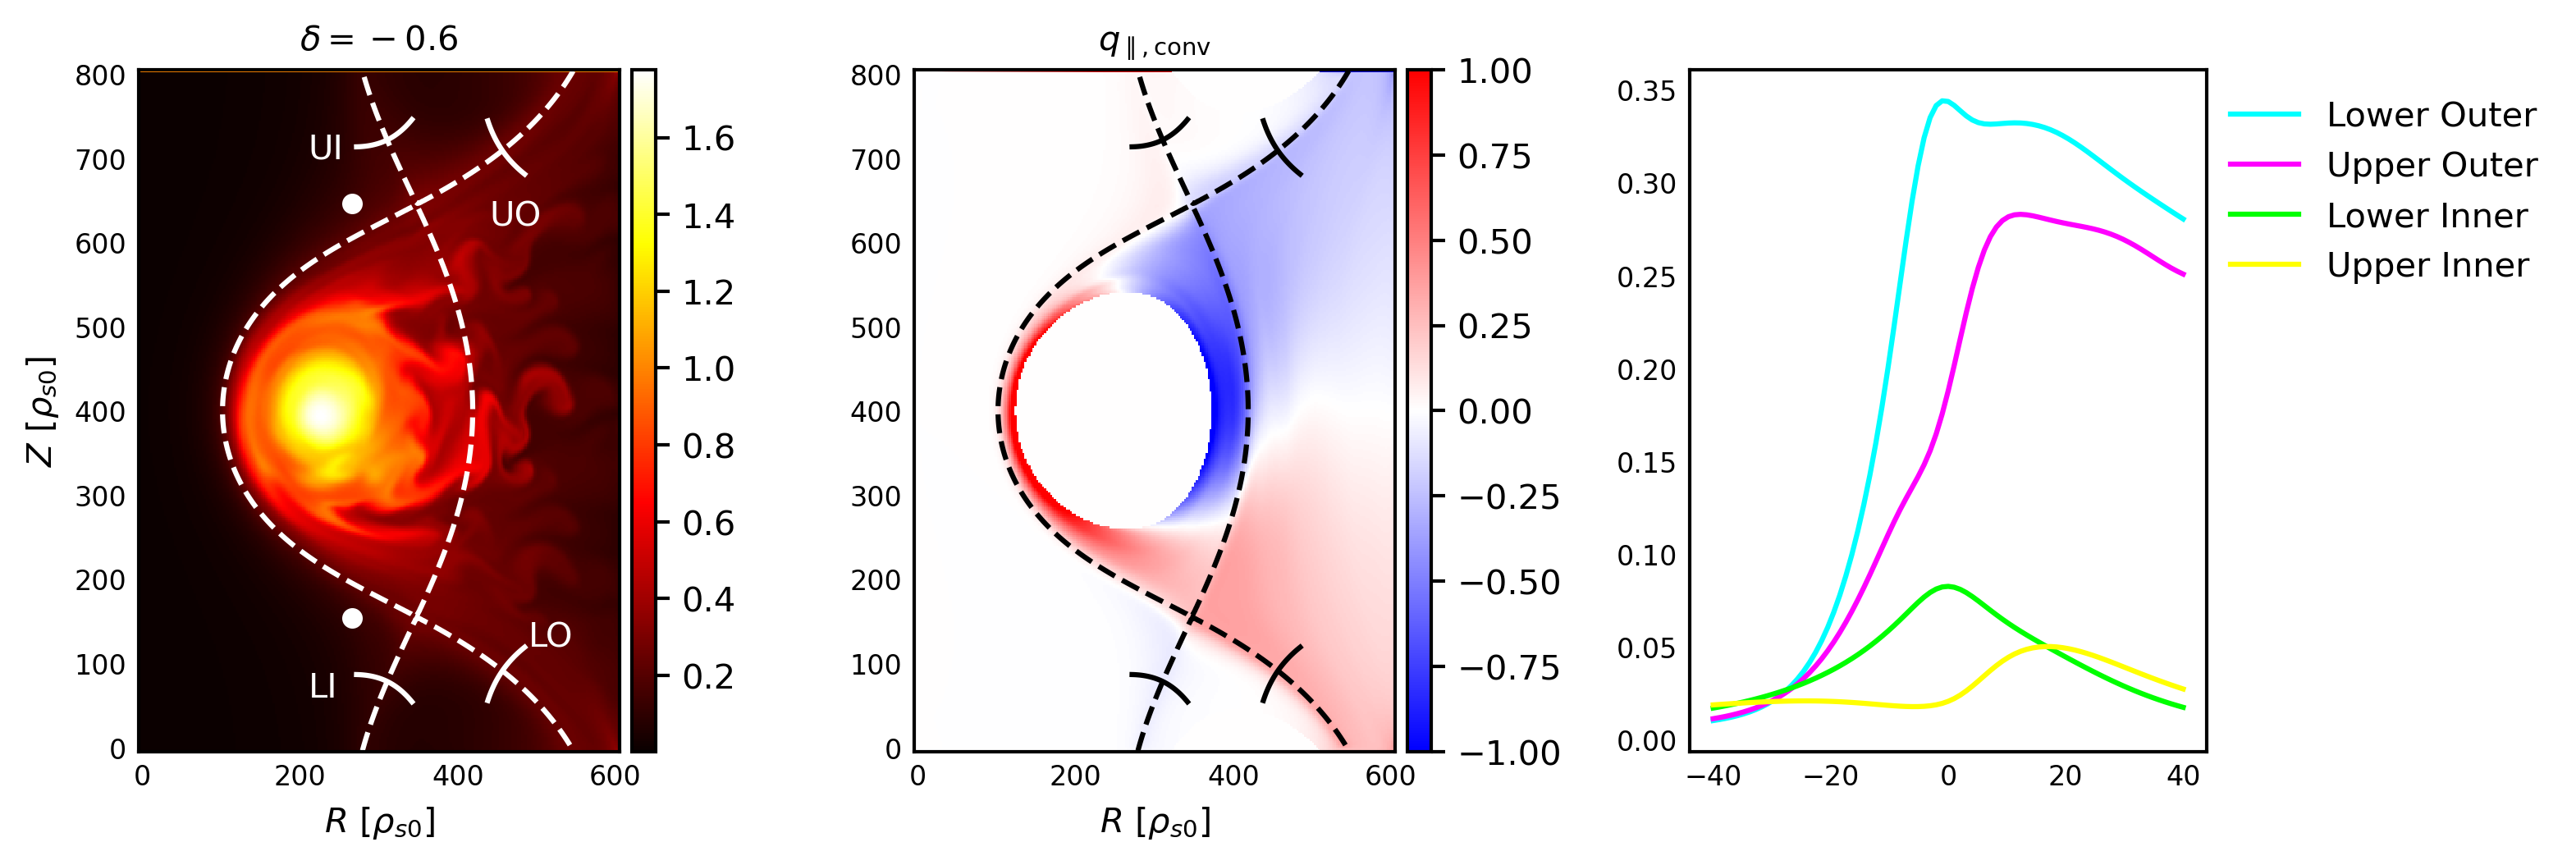

In [44]:
fig, axes = plt.subplots(ncols=3, figsize=(3*fig_width, 1.6*fig_height))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.4)

X,Y = np.meshgrid(s.x, s.y)

cs0=axes[0].pcolormesh(X, Y, dens_DNT_nu1[:,:,0,-1], cmap='hot', rasterized=True)
divider = make_axes_locatable(axes[0])
cax0 = divider.append_axes('right', size='5%', pad=0.05)
cbar0 = fig.colorbar(cs0, cax=cax0, orientation='vertical')
cbar0.ax.tick_params(labelsize=10)  # Adjusted size

###############################################################################
qpare_DNT_nu1_masked = np.copy(qpare_DNT_nu1)

# Apply mask for the core region
for i in range(s.ny):
    for j in range(s.nx):
        if Psi_NT_nu1[i,j] < Psi_NT_nu1[iy0_NT_nu1,ix0_NT_nu1]+6000:
            qpare_DNT_nu1_masked[i,j]=0.0
################################################################################            

cs1=axes[1].pcolormesh(X, Y, qpare_DNT_nu1_masked, cmap='bwr', vmin=-1, vmax=1, rasterized=True)
divider = make_axes_locatable(axes[1])
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar1 = fig.colorbar(cs1, cax=cax1, orientation='vertical')
cbar1.ax.tick_params(labelsize=10)  # Adjusted size

axes[0].scatter(s.xxpt, s.yxpt, c='w')
axes[0].scatter(s.xxpt, 800-s.yxpt, c='w')

#ax.scatter(UI_DNT_nu1)

axes[0].plot(coord_UI_DNT_nu1[0,:], coord_UI_DNT_nu1[1,:], c='w', linestyle='-')
axes[0].plot(coord_UO_DNT_nu1[0,:], coord_UO_DNT_nu1[1,:], c='w', linestyle='-')
axes[0].plot(coord_LI_DNT_nu1[0,:], coord_LI_DNT_nu1[1,:], c='w', linestyle='-')
axes[0].plot(coord_LO_DNT_nu1[0,:], coord_LO_DNT_nu1[1,:], c='w', linestyle='-')

# Plot Separatrix
axes[0].contour(X, Y, Psi_NT_nu1, levels=[Psi_NT_nu1[iyxpt_NT_nu1, ixxpt_NT_nu1]], colors='w', linestyles='--')
axes[1].contour(X, Y, Psi_NT_nu1, levels=[Psi_NT_nu1[iyxpt_NT_nu1, ixxpt_NT_nu1]], colors='k', linestyles='--')

axes[1].plot(coord_UI_DNT_nu1[0,:], coord_UI_DNT_nu1[1,:], c='k', linestyle='-')
axes[1].plot(coord_UO_DNT_nu1[0,:], coord_UO_DNT_nu1[1,:], c='k', linestyle='-')
axes[1].plot(coord_LI_DNT_nu1[0,:], coord_LI_DNT_nu1[1,:], c='k', linestyle='-')
axes[1].plot(coord_LO_DNT_nu1[0,:], coord_LO_DNT_nu1[1,:], c='k', linestyle='-')

axes[2].plot(length_LO_DNT_nu1, np.abs(qpare_DNT_nu1_LO), label="Lower Outer", c='cyan')
axes[2].plot(length_UO_DNT_nu1, np.abs(qpare_DNT_nu1_UO), label="Upper Outer", c='magenta')
axes[2].plot(length_LI_DNT_nu1, np.abs(qpare_DNT_nu1_LI), label="Lower Inner", c='lime')
axes[2].plot(length_UI_DNT_nu1, np.abs(qpare_DNT_nu1_UI), label="Upper Inner", c='yellow')

for ax in axes:
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='minor', direction="in", size=0.2, width=0.2)
    ax.tick_params(which='major', direction="in", size=0.5, width=0.4)


axes[0].set_xlabel(r'$R\,\,[\rho_{s0}]$')
axes[1].set_xlabel(r'$R\,\,[\rho_{s0}]$')
axes[0].set_ylabel(r'$Z\,\,[\rho_{s0}]$', rotation=90)
    
axes[0].text(490, 120, 'LO', style ='normal', family='sans-serif', color ="w")
axes[0].text(210, 60, 'LI', style ='normal', family='sans-serif', color ="w")
axes[0].text(440, 620, 'UO', style ='normal', family='sans-serif', color ="w")
axes[0].text(210, 700, 'UI', style ='normal', family='sans-serif', color ="w")

axes[0].set_title(r'$\delta=-0.6$')
axes[1].set_title(r'$q_{\parallel, \rm{conv}}$')

leg=axes[2].legend(bbox_to_anchor=(1.7, 1.), loc='upper right', edgecolor='white', prop={'size': 10}, 
         facecolor='white', framealpha=0)

# Save the figure
dpi_val = 300
home_directory = os.path.expanduser('~')
os.chdir(home_directory)
#plt.savefig("DN_PT_getline_nu1.pdf", bbox_inches='tight', format='pdf', pad_inches=0.01, dpi=dpi_val)

<div class="alert alert-block alert-info"  style="text-align: center;">
<span style="font-size: 40px;"><b> Load stscan </b></span><br>
</div>

<div class="alert alert-block alert-info"  style="text-align: center;">
<span style="font-size: 20px;"><b> DPT $s_{T0}=0.05$ </b></span><br>
</div>

In [46]:
os.chdir('/marconi_work/FUA37_TSVV2/kyungtak/GBS_DN/DN_tria/st_scan/DPT_st0p05')

# Print the current working directory
print("Current working directory: {0}".format(cwd))

# Load GBS simulations
s=g.Sim()

Psi_PT_st0p05 = s.Psi
ixxpt_PT_st0p05 = s.ixxpt
iyxpt_PT_st0p05 = s.iyxpt
iy0_PT_st0p05 = s.iy0
ix0_PT_st0p05 = s.ix0

from gbspy.surfaces import get_line

t_final = s.time[-1]
t_init = t_final -5
bsign = s.attribute["B0sign"]
t_read = np.linspace(t_init, t_final, 101)

dens_DPT_st0p05 = s.get_field('n', t1=t_init, t2=t_final)
phi_DPT_st0p05 = s.get_field('strmf', t1=t_init, t2=t_final)

vpare_DPT_st0p05 = s.get_field('vpare', t1=t_init, t2=t_final)
vpare_DPT_st0p05_avg = np.mean(vpare_DPT_st0p05, axis=(2,3))
Te_DPT_st0p05 = s.get_field('Te', t1=t_init, t2=t_final)


# Fluctuating quantity
dens_DPT_st0p05_avg  = np.mean(dens_DPT_st0p05, axis=(2,3)); dens_DPT_st0p05_avg_tor = np.mean(dens_DPT_st0p05, axis=2)
dens_DPT_st0p05_fluct   = np.sqrt((dens_DPT_st0p05[:,:,0,:]-dens_DPT_st0p05_avg_tor)**2) / dens_DPT_st0p05_avg_tor
dens_DPT_st0p05_fluct_avg = np.mean(dens_DPT_st0p05_fluct, axis=2)

phi_DPT_st0p05_avg  = np.mean(phi_DPT_st0p05, axis=(2,3)); phi_DPT_st0p05_avg_tor = np.mean(phi_DPT_st0p05, axis=2)
phi_DPT_st0p05_fluct   = np.sqrt((phi_DPT_st0p05[:,:,0,:]-phi_DPT_st0p05_avg_tor)**2) / phi_DPT_st0p05_avg_tor
phi_DPT_st0p05_fluct_avg = np.mean(phi_DPT_st0p05_fluct, axis=2)

# Convective Heat Flux
qpare_DPT_st0p05 = (5/2) * np.mean(vpare_DPT_st0p05 * Te_DPT_st0p05 * dens_DPT_st0p05, axis=(2,3))

Current working directory: /marconi/home/userexternal/klim0000


In [48]:
from gbspy.surfaces import get_line
# For balanced DN
UI_DPT_st0p05=(158.85261121620908, 709.7637771419237)
UO_DPT_st0p05=(305.110743051502, 721.353638088224)
LI_DPT_st0p05=(158.85475695604873, 90.23778669576583)
LO_DPT_st0p05=(305.11048564829156, 78.6468451190245)


coord_UI_DPT_st0p05, length_UI_DPT_st0p05 = get_line(s, UI_DPT_st0p05, (-40,40), "psi", resolution=(40,40))
coord_UO_DPT_st0p05, length_UO_DPT_st0p05 = get_line(s, UO_DPT_st0p05, (-40,40), "psi", resolution=(40,40))
coord_LI_DPT_st0p05, length_LI_DPT_st0p05 = get_line(s, LI_DPT_st0p05, (-40,40), "psi", resolution=(40,40))
coord_LO_DPT_st0p05, length_LO_DPT_st0p05 = get_line(s, LO_DPT_st0p05, (-40,40), "psi", resolution=(40,40))

## Full length
#coord_xpt_up, length_xpt_up = get_line(s, (s.xxpt, s.yxpt), (-1,170), "chi", resolution=(40,40))
#coord_xpt_up2, length_xpt_up2 = get_line(s, (s.xxpt, s.yxpt), (-250,1), "chi", resolution=(40,40))
#coord_xpt_up3, length_xpt_up3 = get_line(s, (s.xxpt, 800-s.yxpt), (-170,1), "chi", resolution=(40,40))
#coord_xpt_up4, length_xpt_up4 = get_line(s, (s.xxpt, 800-s.yxpt), (-1,250), "chi", resolution=(40,40))

# Half length
#coord_xpt_up, length_xpt_up = get_line(s, (s.xxpt, s.yxpt), (-1,85), "chi", resolution=(40,40))
#coord_xpt_up2, length_xpt_up2 = get_line(s, (s.xxpt, s.yxpt), (-125,1), "chi", resolution=(40,40))
#coord_xpt_up3, length_xpt_up3 = get_line(s, (s.xxpt, 800-s.yxpt), (-85,1), "chi", resolution=(40,40))
#coord_xpt_up4, length_xpt_up4 = get_line(s, (s.xxpt, 800-s.yxpt), (-1,125), "chi", resolution=(40,40))

from scipy.interpolate import RectBivariateSpline
qpare_interpolant = RectBivariateSpline(s.y, s.x, qpare_DPT_st0p05)
qpare_DPT_st0p05_UI = qpare_interpolant(coord_UI_DPT_st0p05[1,:], coord_UI_DPT_st0p05[0,:], grid=False)
qpare_DPT_st0p05_UO = qpare_interpolant(coord_UO_DPT_st0p05[1,:], coord_UO_DPT_st0p05[0,:], grid=False)
qpare_DPT_st0p05_LI = qpare_interpolant(coord_LI_DPT_st0p05[1,:], coord_LI_DPT_st0p05[0,:], grid=False)
qpare_DPT_st0p05_LO = qpare_interpolant(coord_LO_DPT_st0p05[1,:], coord_LO_DPT_st0p05[0,:], grid=False)

# Apply the function to each array
Heat_DPT_st0p05_LO = np.sum(np.abs(qpare_DPT_st0p05_LO))
Heat_DPT_st0p05_UO = np.sum(np.abs(qpare_DPT_st0p05_UO))
Heat_DPT_st0p05_LI = np.sum(np.abs(qpare_DPT_st0p05_LI))
Heat_DPT_st0p05_UI = np.sum(np.abs(qpare_DPT_st0p05_UI))

# Peak Heat Flux
Peak_DPT_st0p05_LO = np.max(np.abs(qpare_DPT_st0p05_LO))
Peak_DPT_st0p05_UO = np.max(np.abs(qpare_DPT_st0p05_UO))
Peak_DPT_st0p05_LI = np.max(np.abs(qpare_DPT_st0p05_LI))
Peak_DPT_st0p05_UI = np.max(np.abs(qpare_DPT_st0p05_UI))


Heat_tot_DPT_st0p05 = Heat_DPT_st0p05_LO + Heat_DPT_st0p05_UO + Heat_DPT_st0p05_LI + Heat_DPT_st0p05_UI
Peak_tot_DPT_st0p05 = Peak_DPT_st0p05_LO + Peak_DPT_st0p05_UO + Peak_DPT_st0p05_LI + Peak_DPT_st0p05_UI

chart_tot_DPT_st0p05 = [Heat_DPT_st0p05_LO, Heat_DPT_st0p05_UO, Heat_DPT_st0p05_LI, Heat_DPT_st0p05_UI] / Heat_tot_DPT_st0p05
chart_peak_DPT_st0p05= [Peak_DPT_st0p05_LO, Peak_DPT_st0p05_UO, Peak_DPT_st0p05_LI, Peak_DPT_st0p05_UI] / Peak_tot_DPT_st0p05


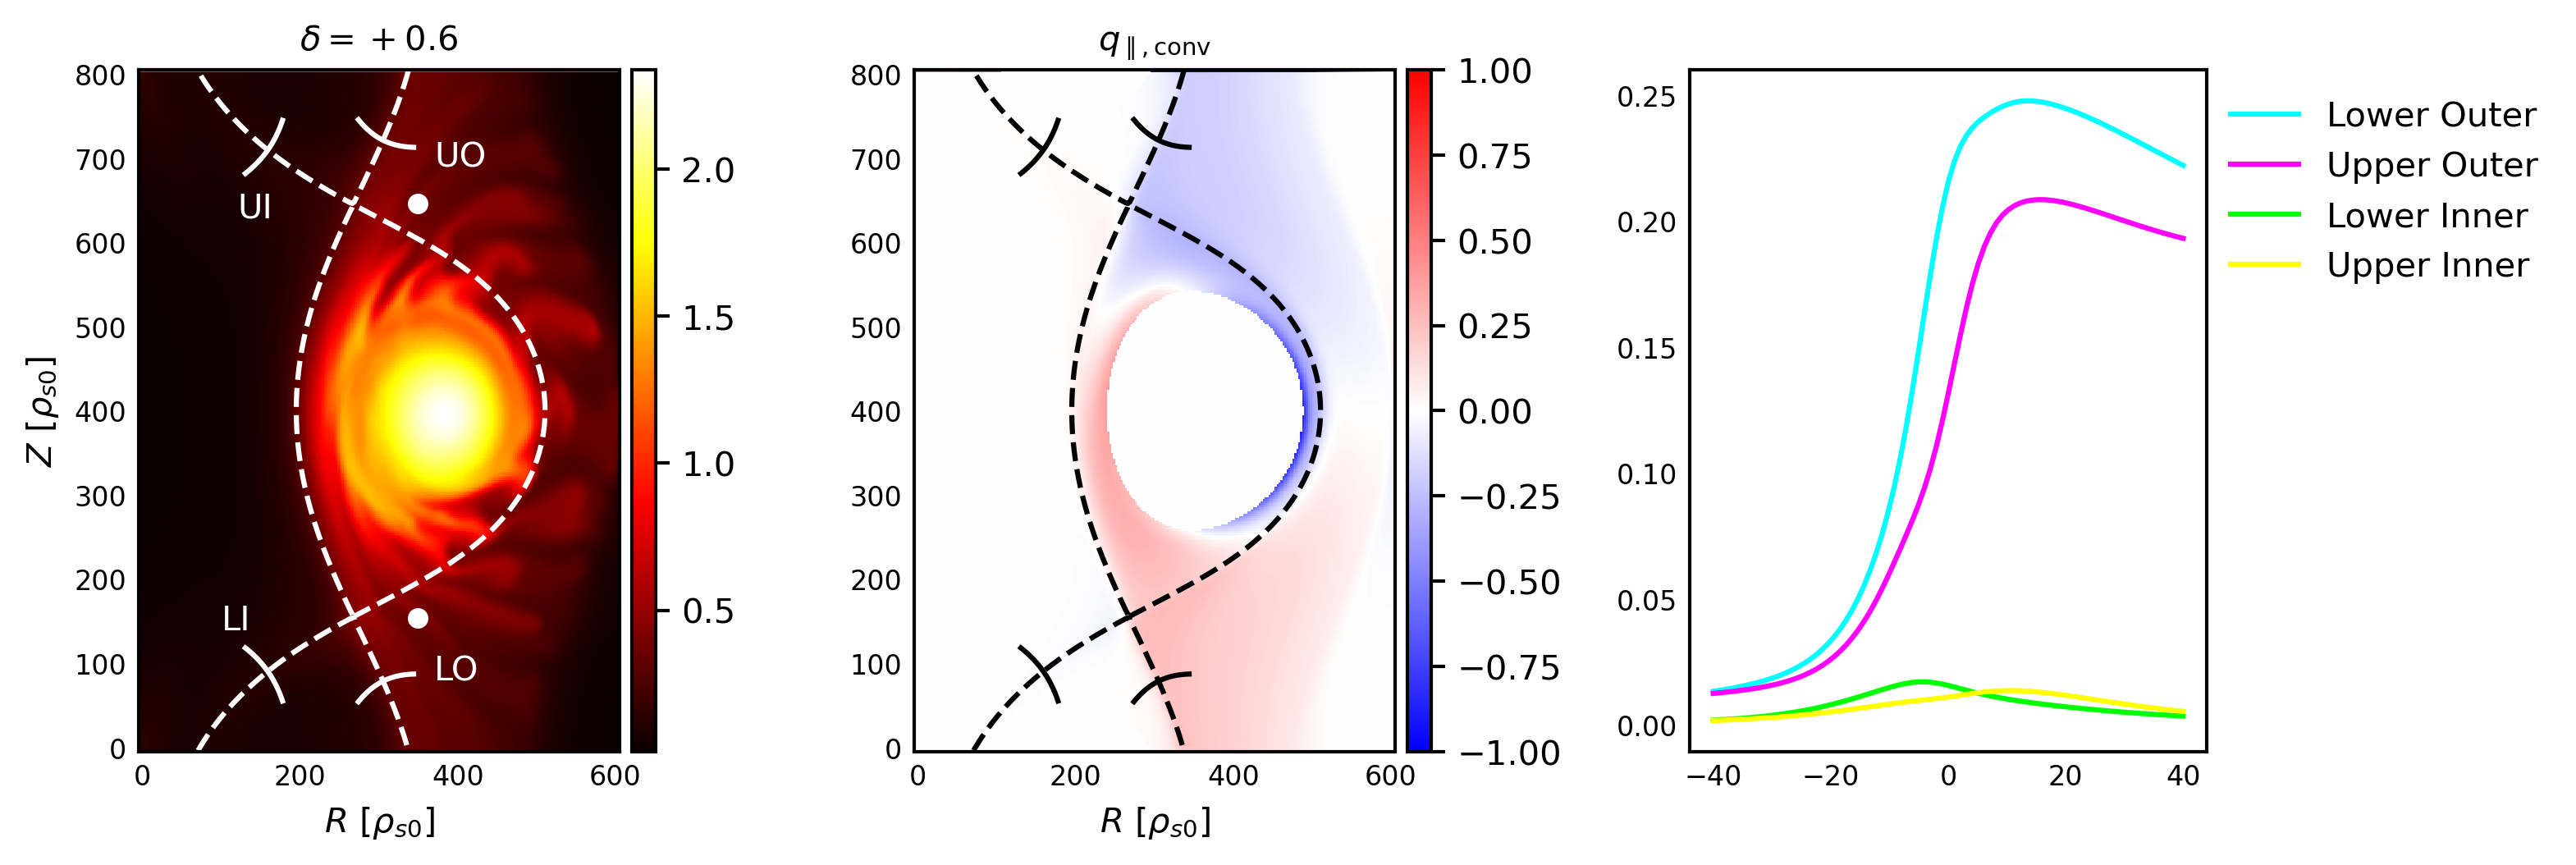

In [50]:
fig, axes = plt.subplots(ncols=3, figsize=(3*fig_width, 1.6*fig_height))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.4)

X,Y = np.meshgrid(s.x, s.y)

cs0=axes[0].pcolormesh(X, Y, dens_DPT_st0p05[:,:,0,-1], cmap='hot', rasterized=True)
divider = make_axes_locatable(axes[0])
cax0 = divider.append_axes('right', size='5%', pad=0.05)
cbar0 = fig.colorbar(cs0, cax=cax0, orientation='vertical')
cbar0.ax.tick_params(labelsize=10)  # Adjusted size

###############################################################################
qpare_DPT_st0p05_masked = np.copy(qpare_DPT_st0p05)
# Apply mask for the core region
for i in range(s.ny):
    for j in range(s.nx):
        if Psi_PT_st0p05[i,j] < Psi_PT_st0p05[iy0_PT_st0p05,ix0_PT_st0p05]+6000:
            qpare_DPT_st0p05_masked[i,j]=0.0
################################################################################            

cs1=axes[1].pcolormesh(X, Y, qpare_DPT_st0p05_masked, cmap='bwr', vmin=-1, vmax=1, rasterized=True)
divider = make_axes_locatable(axes[1])
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar1 = fig.colorbar(cs1, cax=cax1, orientation='vertical')
cbar1.ax.tick_params(labelsize=10)  # Adjusted size

axes[0].scatter(s.xxpt, s.yxpt, c='w')
axes[0].scatter(s.xxpt, 800-s.yxpt, c='w')

#ax.scatter(UI_DPT_st0p05)

axes[0].plot(coord_UI_DPT_st0p05[0,:], coord_UI_DPT_st0p05[1,:], c='w', linestyle='-')
axes[0].plot(coord_UO_DPT_st0p05[0,:], coord_UO_DPT_st0p05[1,:], c='w', linestyle='-')
axes[0].plot(coord_LI_DPT_st0p05[0,:], coord_LI_DPT_st0p05[1,:], c='w', linestyle='-')
axes[0].plot(coord_LO_DPT_st0p05[0,:], coord_LO_DPT_st0p05[1,:], c='w', linestyle='-')

# Plot Separatrix
axes[0].contour(X, Y, Psi_PT_st0p05, levels=[Psi_PT_st0p05[iyxpt_PT_st0p05, ixxpt_PT_st0p05]], colors='w', linestyles='--')
axes[1].contour(X, Y, Psi_PT_st0p05, levels=[Psi_PT_st0p05[iyxpt_PT_st0p05, ixxpt_PT_st0p05]], colors='k', linestyles='--')

axes[1].plot(coord_UI_DPT_st0p05[0,:], coord_UI_DPT_st0p05[1,:], c='k', linestyle='-')
axes[1].plot(coord_UO_DPT_st0p05[0,:], coord_UO_DPT_st0p05[1,:], c='k', linestyle='-')
axes[1].plot(coord_LI_DPT_st0p05[0,:], coord_LI_DPT_st0p05[1,:], c='k', linestyle='-')
axes[1].plot(coord_LO_DPT_st0p05[0,:], coord_LO_DPT_st0p05[1,:], c='k', linestyle='-')

axes[2].plot(length_LO_DPT_st0p05, np.abs(qpare_DPT_st0p05_LO), label="Lower Outer", c='cyan')
axes[2].plot(length_UO_DPT_st0p05, np.abs(qpare_DPT_st0p05_UO), label="Upper Outer", c='magenta')
axes[2].plot(length_LI_DPT_st0p05, np.abs(qpare_DPT_st0p05_LI), label="Lower Inner", c='lime')
axes[2].plot(length_UI_DPT_st0p05, np.abs(qpare_DPT_st0p05_UI), label="Upper Inner", c='yellow')

for ax in axes:
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='minor', direction="in", size=0.2, width=0.2)
    ax.tick_params(which='major', direction="in", size=0.5, width=0.4)


axes[0].set_xlabel(r'$R\,\,[\rho_{s0}]$')
axes[1].set_xlabel(r'$R\,\,[\rho_{s0}]$')
axes[0].set_ylabel(r'$Z\,\,[\rho_{s0}]$', rotation=90)
    
axes[0].text(370, 80, 'LO', style ='normal', family='sans-serif', color ="w")
axes[0].text(100, 140, 'LI', style ='normal', family='sans-serif', color ="w")
axes[0].text(370, 690, 'UO', style ='normal', family='sans-serif', color ="w")
axes[0].text(120, 630, 'UI', style ='normal', family='sans-serif', color ="w")

axes[0].set_title(r'$\delta=+0.6$')
axes[1].set_title(r'$q_{\parallel, \rm{conv}}$')

leg=axes[2].legend(bbox_to_anchor=(1.7, 1.), loc='upper right', edgecolor='white', prop={'size': 10}, 
         facecolor='white', framealpha=0)

# Save the figure
dpi_val = 300
home_directory = os.path.expanduser('~')
os.chdir(home_directory)
#plt.savefig("DN_PT_getline_st0p05.pdf", bbox_inches='tight', format='pdf', pad_inches=0.01, dpi=dpi_val)

<div class="alert alert-block alert-info"  style="text-align: center;">
<span style="font-size: 20px;"><b> DPT $s_{T0}=0.3$ </b></span><br>
</div>

In [52]:
os.chdir('/marconi_work/FUA37_TSVV2/kyungtak/GBS_DN/DN_tria/st_scan/DPT_st0p3')

# Print the current working directory
print("Current working directory: {0}".format(cwd))

# Load GBS simulations
s=g.Sim()

Psi_PT_st0p3 = s.Psi
ixxpt_PT_st0p3 = s.ixxpt
iyxpt_PT_st0p3 = s.iyxpt
iy0_PT_st0p3 = s.iy0
ix0_PT_st0p3 = s.ix0

from gbspy.surfaces import get_line

t_final = s.time[-1]-3
t_init = t_final -5
bsign = s.attribute["B0sign"]
t_read = np.linspace(t_init, t_final, 101)

dens_DPT_st0p3 = s.get_field('n', t1=t_init, t2=t_final)
phi_DPT_st0p3 = s.get_field('strmf', t1=t_init, t2=t_final)

vpare_DPT_st0p3 = s.get_field('vpare', t1=t_init, t2=t_final)
vpare_DPT_st0p3_avg = np.mean(vpare_DPT_st0p3, axis=(2,3))
Te_DPT_st0p3 = s.get_field('Te', t1=t_init, t2=t_final)


# Fluctuating quantity
dens_DPT_st0p3_avg  = np.mean(dens_DPT_st0p3, axis=(2,3)); dens_DPT_st0p3_avg_tor = np.mean(dens_DPT_st0p3, axis=2)
dens_DPT_st0p3_fluct   = np.sqrt((dens_DPT_st0p3[:,:,0,:]-dens_DPT_st0p3_avg_tor)**2) / dens_DPT_st0p3_avg_tor
dens_DPT_st0p3_fluct_avg = np.mean(dens_DPT_st0p3_fluct, axis=2)

phi_DPT_st0p3_avg  = np.mean(phi_DPT_st0p3, axis=(2,3)); phi_DPT_st0p3_avg_tor = np.mean(phi_DPT_st0p3, axis=2)
phi_DPT_st0p3_fluct   = np.sqrt((phi_DPT_st0p3[:,:,0,:]-phi_DPT_st0p3_avg_tor)**2) / phi_DPT_st0p3_avg_tor
phi_DPT_st0p3_fluct_avg = np.mean(phi_DPT_st0p3_fluct, axis=2)

# Convective Heat Flux
qpare_DPT_st0p3 = (5/2) * np.mean(vpare_DPT_st0p3 * Te_DPT_st0p3 * dens_DPT_st0p3, axis=(2,3))

Current working directory: /marconi/home/userexternal/klim0000


In [54]:
from gbspy.surfaces import get_line
# For balanced DN
UI_DPT_st0p3=(158.85261121620908, 709.7637771419237)
UO_DPT_st0p3=(305.110743051502, 721.353638088224)
LI_DPT_st0p3=(158.85475695604873, 90.23778669576583)
LO_DPT_st0p3=(305.11048564829156, 78.6468451190245)


coord_UI_DPT_st0p3, length_UI_DPT_st0p3 = get_line(s, UI_DPT_st0p3, (-40,40), "psi", resolution=(40,40))
coord_UO_DPT_st0p3, length_UO_DPT_st0p3 = get_line(s, UO_DPT_st0p3, (-40,40), "psi", resolution=(40,40))
coord_LI_DPT_st0p3, length_LI_DPT_st0p3 = get_line(s, LI_DPT_st0p3, (-40,40), "psi", resolution=(40,40))
coord_LO_DPT_st0p3, length_LO_DPT_st0p3 = get_line(s, LO_DPT_st0p3, (-40,40), "psi", resolution=(40,40))

## Full length
#coord_xpt_up, length_xpt_up = get_line(s, (s.xxpt, s.yxpt), (-1,170), "chi", resolution=(40,40))
#coord_xpt_up2, length_xpt_up2 = get_line(s, (s.xxpt, s.yxpt), (-250,1), "chi", resolution=(40,40))
#coord_xpt_up3, length_xpt_up3 = get_line(s, (s.xxpt, 800-s.yxpt), (-170,1), "chi", resolution=(40,40))
#coord_xpt_up4, length_xpt_up4 = get_line(s, (s.xxpt, 800-s.yxpt), (-1,250), "chi", resolution=(40,40))

# Half length
#coord_xpt_up, length_xpt_up = get_line(s, (s.xxpt, s.yxpt), (-1,85), "chi", resolution=(40,40))
#coord_xpt_up2, length_xpt_up2 = get_line(s, (s.xxpt, s.yxpt), (-125,1), "chi", resolution=(40,40))
#coord_xpt_up3, length_xpt_up3 = get_line(s, (s.xxpt, 800-s.yxpt), (-85,1), "chi", resolution=(40,40))
#coord_xpt_up4, length_xpt_up4 = get_line(s, (s.xxpt, 800-s.yxpt), (-1,125), "chi", resolution=(40,40))

from scipy.interpolate import RectBivariateSpline
qpare_interpolant = RectBivariateSpline(s.y, s.x, qpare_DPT_st0p3)
qpare_DPT_st0p3_UI = qpare_interpolant(coord_UI_DPT_st0p3[1,:], coord_UI_DPT_st0p3[0,:], grid=False)
qpare_DPT_st0p3_UO = qpare_interpolant(coord_UO_DPT_st0p3[1,:], coord_UO_DPT_st0p3[0,:], grid=False)
qpare_DPT_st0p3_LI = qpare_interpolant(coord_LI_DPT_st0p3[1,:], coord_LI_DPT_st0p3[0,:], grid=False)
qpare_DPT_st0p3_LO = qpare_interpolant(coord_LO_DPT_st0p3[1,:], coord_LO_DPT_st0p3[0,:], grid=False)

# Apply the function to each array
Heat_DPT_st0p3_LO = np.sum(np.abs(qpare_DPT_st0p3_LO))
Heat_DPT_st0p3_UO = np.sum(np.abs(qpare_DPT_st0p3_UO))
Heat_DPT_st0p3_LI = np.sum(np.abs(qpare_DPT_st0p3_LI))
Heat_DPT_st0p3_UI = np.sum(np.abs(qpare_DPT_st0p3_UI))

# Peak Heat Flux
Peak_DPT_st0p3_LO = np.max(np.abs(qpare_DPT_st0p3_LO))
Peak_DPT_st0p3_UO = np.max(np.abs(qpare_DPT_st0p3_UO))
Peak_DPT_st0p3_LI = np.max(np.abs(qpare_DPT_st0p3_LI))
Peak_DPT_st0p3_UI = np.max(np.abs(qpare_DPT_st0p3_UI))


Heat_tot_DPT_st0p3 = Heat_DPT_st0p3_LO + Heat_DPT_st0p3_UO + Heat_DPT_st0p3_LI + Heat_DPT_st0p3_UI
Peak_tot_DPT_st0p3 = Peak_DPT_st0p3_LO + Peak_DPT_st0p3_UO + Peak_DPT_st0p3_LI + Peak_DPT_st0p3_UI

chart_tot_DPT_st0p3 = [Heat_DPT_st0p3_LO, Heat_DPT_st0p3_UO, Heat_DPT_st0p3_LI, Heat_DPT_st0p3_UI] / Heat_tot_DPT_st0p3
chart_peak_DPT_st0p3= [Peak_DPT_st0p3_LO, Peak_DPT_st0p3_UO, Peak_DPT_st0p3_LI, Peak_DPT_st0p3_UI] / Peak_tot_DPT_st0p3


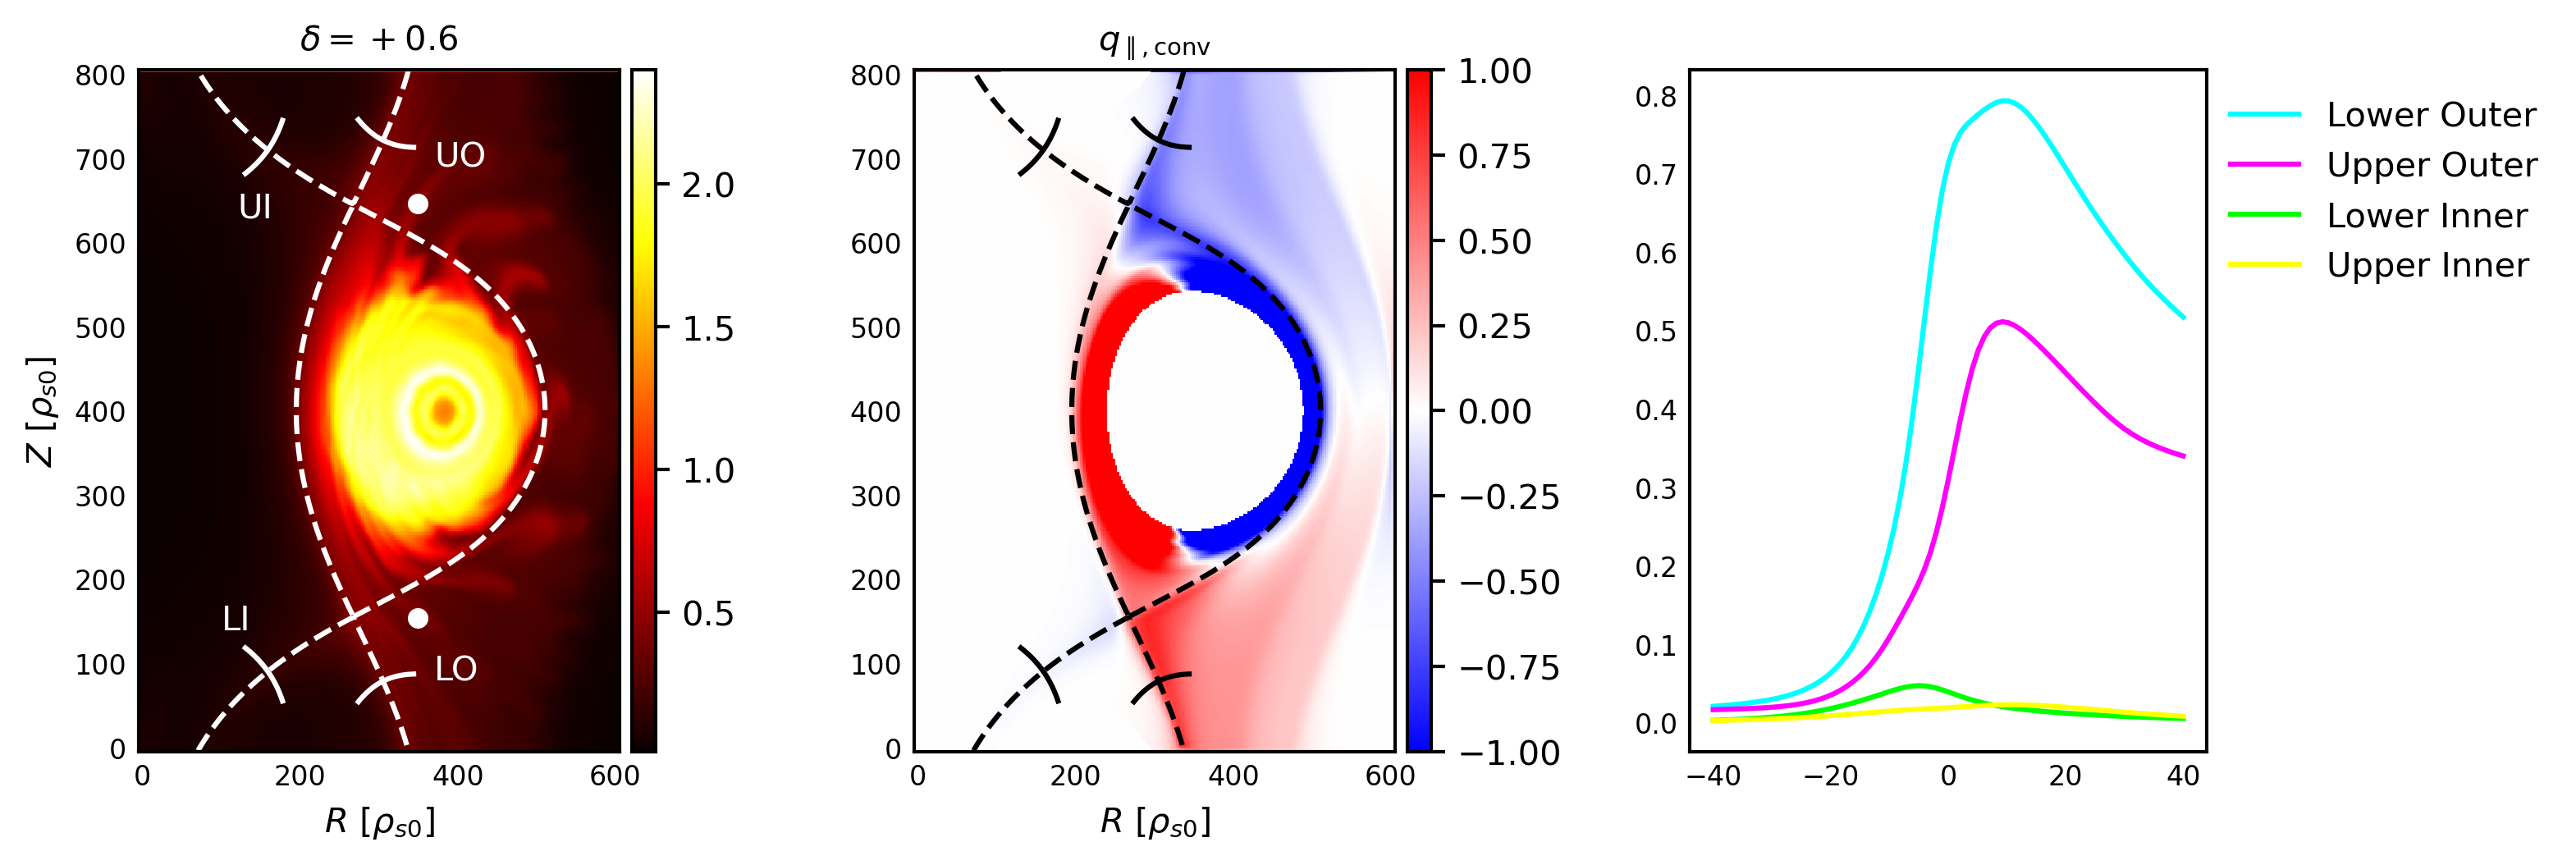

In [56]:
fig, axes = plt.subplots(ncols=3, figsize=(3*fig_width, 1.6*fig_height))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.4)

X,Y = np.meshgrid(s.x, s.y)

cs0=axes[0].pcolormesh(X, Y, dens_DPT_st0p3[:,:,0,-1], cmap='hot', rasterized=True)
divider = make_axes_locatable(axes[0])
cax0 = divider.append_axes('right', size='5%', pad=0.05)
cbar0 = fig.colorbar(cs0, cax=cax0, orientation='vertical')
cbar0.ax.tick_params(labelsize=10)  # Adjusted size

###############################################################################
qpare_DPT_st0p3_masked = np.copy(qpare_DPT_st0p3)
# Apply mask for the core region
for i in range(s.ny):
    for j in range(s.nx):
        if Psi_PT_st0p3[i,j] < Psi_PT_st0p3[iy0_PT_st0p3,ix0_PT_st0p3]+6000:
            qpare_DPT_st0p3_masked[i,j]=0.0
################################################################################            

cs1=axes[1].pcolormesh(X, Y, qpare_DPT_st0p3_masked, cmap='bwr', vmin=-1, vmax=1, rasterized=True)
divider = make_axes_locatable(axes[1])
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar1 = fig.colorbar(cs1, cax=cax1, orientation='vertical')
cbar1.ax.tick_params(labelsize=10)  # Adjusted size

axes[0].scatter(s.xxpt, s.yxpt, c='w')
axes[0].scatter(s.xxpt, 800-s.yxpt, c='w')

#ax.scatter(UI_DPT_st0p3)

axes[0].plot(coord_UI_DPT_st0p3[0,:], coord_UI_DPT_st0p3[1,:], c='w', linestyle='-')
axes[0].plot(coord_UO_DPT_st0p3[0,:], coord_UO_DPT_st0p3[1,:], c='w', linestyle='-')
axes[0].plot(coord_LI_DPT_st0p3[0,:], coord_LI_DPT_st0p3[1,:], c='w', linestyle='-')
axes[0].plot(coord_LO_DPT_st0p3[0,:], coord_LO_DPT_st0p3[1,:], c='w', linestyle='-')

# Plot Separatrix
axes[0].contour(X, Y, Psi_PT_st0p3, levels=[Psi_PT_st0p3[iyxpt_PT_st0p3, ixxpt_PT_st0p3]], colors='w', linestyles='--')
axes[1].contour(X, Y, Psi_PT_st0p3, levels=[Psi_PT_st0p3[iyxpt_PT_st0p3, ixxpt_PT_st0p3]], colors='k', linestyles='--')

axes[1].plot(coord_UI_DPT_st0p3[0,:], coord_UI_DPT_st0p3[1,:], c='k', linestyle='-')
axes[1].plot(coord_UO_DPT_st0p3[0,:], coord_UO_DPT_st0p3[1,:], c='k', linestyle='-')
axes[1].plot(coord_LI_DPT_st0p3[0,:], coord_LI_DPT_st0p3[1,:], c='k', linestyle='-')
axes[1].plot(coord_LO_DPT_st0p3[0,:], coord_LO_DPT_st0p3[1,:], c='k', linestyle='-')

axes[2].plot(length_LO_DPT_st0p3, np.abs(qpare_DPT_st0p3_LO), label="Lower Outer", c='cyan')
axes[2].plot(length_UO_DPT_st0p3, np.abs(qpare_DPT_st0p3_UO), label="Upper Outer", c='magenta')
axes[2].plot(length_LI_DPT_st0p3, np.abs(qpare_DPT_st0p3_LI), label="Lower Inner", c='lime')
axes[2].plot(length_UI_DPT_st0p3, np.abs(qpare_DPT_st0p3_UI), label="Upper Inner", c='yellow')

for ax in axes:
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='minor', direction="in", size=0.2, width=0.2)
    ax.tick_params(which='major', direction="in", size=0.5, width=0.4)


axes[0].set_xlabel(r'$R\,\,[\rho_{s0}]$')
axes[1].set_xlabel(r'$R\,\,[\rho_{s0}]$')
axes[0].set_ylabel(r'$Z\,\,[\rho_{s0}]$', rotation=90)
    
axes[0].text(370, 80, 'LO', style ='normal', family='sans-serif', color ="w")
axes[0].text(100, 140, 'LI', style ='normal', family='sans-serif', color ="w")
axes[0].text(370, 690, 'UO', style ='normal', family='sans-serif', color ="w")
axes[0].text(120, 630, 'UI', style ='normal', family='sans-serif', color ="w")

axes[0].set_title(r'$\delta=+0.6$')
axes[1].set_title(r'$q_{\parallel, \rm{conv}}$')

leg=axes[2].legend(bbox_to_anchor=(1.7, 1.), loc='upper right', edgecolor='white', prop={'size': 10}, 
         facecolor='white', framealpha=0)

# Save the figure
dpi_val = 300
home_directory = os.path.expanduser('~')
os.chdir(home_directory)
#plt.savefig("DN_PT_getline_st0p3.pdf", bbox_inches='tight', format='pdf', pad_inches=0.01, dpi=dpi_val)

<div class="alert alert-block alert-info"  style="text-align: center;">
<span style="font-size: 20px;"><b> DNT $s_{T0}=0.05$ </b></span><br>
</div>

In [58]:
os.chdir('/marconi_work/FUA37_TSVV2/kyungtak/GBS_DN/DN_tria/st_scan/DNT_st0p05')

# Load GBS simulations
s=g.Sim()

t_final = s.time[-1]
t_init = t_final -5
t_read = np.linspace(t_init, t_final, 101)

Psi_NT_st0p05 = s.Psi
ixxpt_NT_st0p05 = s.ixxpt
iyxpt_NT_st0p05 = s.iyxpt
iy0_NT_st0p05 = s.iy0
ix0_NT_st0p05 = s.ix0

dens_DNT_st0p05  = s.get_field('n', t1=t_init, t2=t_final)
vpare_DNT_st0p05 = s.get_field('vpare', t1=t_init, t2=t_final)
Te_DNT_st0p05 = s.get_field('Te', t1=t_init, t2=t_final)
phi_DNT_st0p05 = s.get_field('strmf', t1=t_init, t2=t_final)

vpare_DNT_st0p05_avg = np.mean(vpare_DNT_st0p05, axis=(2,3))

# Fluctuating quantity
dens_DNT_st0p05_avg  = np.mean(dens_DNT_st0p05, axis=(2,3)); dens_DNT_st0p05_avg_tor = np.mean(dens_DNT_st0p05, axis=2)
dens_DNT_st0p05_fluct   = np.sqrt((dens_DNT_st0p05[:,:,0,:]-dens_DNT_st0p05_avg_tor)**2) / dens_DNT_st0p05_avg_tor
dens_DNT_st0p05_fluct_avg = np.mean(dens_DNT_st0p05_fluct, axis=2)

phi_DNT_st0p05_avg  = np.mean(phi_DNT_st0p05, axis=(2,3)); phi_DNT_st0p05_avg_tor = np.mean(phi_DNT_st0p05, axis=2)
phi_DNT_st0p05_fluct   = np.sqrt((phi_DNT_st0p05[:,:,0,:]-phi_DNT_st0p05_avg_tor)**2) / phi_DNT_st0p05_avg_tor
phi_DNT_st0p05_fluct_avg = np.mean(phi_DNT_st0p05_fluct, axis=2)

# Convective Heat Flux
qpare_DNT_st0p05 = (5/2) * np.mean(vpare_DNT_st0p05 * Te_DNT_st0p05 * dens_DNT_st0p05, axis=(2,3))

Text(0.5, 1.0, 'DNT peak $\\delta=-0.6$')

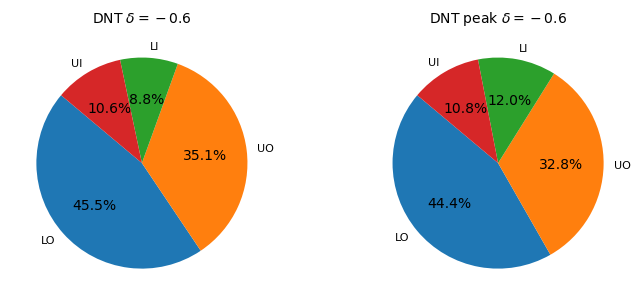

In [60]:
# For balanced DN
UO_DNT_st0p05=(456.5503784658009, 709.075944151039)
UI_DNT_st0p05=(310.36118514691896, 721.6963043686486)
LI_DNT_st0p05=(310.3629879445284, 78.30729369710014)
LO_DNT_st0p05=(456.5471511382758, 90.92656834368125)

coord_UI_DNT_st0p05, length_UI_DNT_st0p05 = get_line(s, UI_DNT_st0p05, (-40,40), "psi", resolution=(40,40))
coord_UO_DNT_st0p05, length_UO_DNT_st0p05 = get_line(s, UO_DNT_st0p05, (-40,40), "psi", resolution=(40,40))
coord_LI_DNT_st0p05, length_LI_DNT_st0p05 = get_line(s, LI_DNT_st0p05, (-40,40), "psi", resolution=(40,40))
coord_LO_DNT_st0p05, length_LO_DNT_st0p05 = get_line(s, LO_DNT_st0p05, (-40,40), "psi", resolution=(40,40))

# Half length
#coord_xpt_up, length_xpt_up = get_line(s, (s.xxpt, s.yxpt), (-1,125), "chi", resolution=(40,125))
#coord_xpt_up2, length_xpt_up2 = get_line(s, (s.xxpt, s.yxpt), (-85,1), "chi", resolution=(40,40))
#coord_xpt_up3, length_xpt_up3 = get_line(s, (s.xxpt, 800-s.yxpt), (-1,85), "chi", resolution=(40,40))
#coord_xpt_up4, length_xpt_up4 = get_line(s, (s.xxpt, 800-s.yxpt), (-125,1), "chi", resolution=(40,40))


from scipy.interpolate import RectBivariateSpline
qpare_interpolant = RectBivariateSpline(s.y, s.x, qpare_DNT_st0p05)
qpare_DNT_st0p05_UI = qpare_interpolant(coord_UI_DNT_st0p05[1,:], coord_UI_DNT_st0p05[0,:], grid=False)
qpare_DNT_st0p05_UO = qpare_interpolant(coord_UO_DNT_st0p05[1,:], coord_UO_DNT_st0p05[0,:], grid=False)
qpare_DNT_st0p05_LI = qpare_interpolant(coord_LI_DNT_st0p05[1,:], coord_LI_DNT_st0p05[0,:], grid=False)
qpare_DNT_st0p05_LO = qpare_interpolant(coord_LO_DNT_st0p05[1,:], coord_LO_DNT_st0p05[0,:], grid=False)


# Apply the function to each array
Heat_DNT_st0p05_LO = np.sum(np.abs(qpare_DNT_st0p05_LO))
Heat_DNT_st0p05_UO = np.sum(np.abs(qpare_DNT_st0p05_UO))
Heat_DNT_st0p05_LI = np.sum(np.abs(qpare_DNT_st0p05_LI))
Heat_DNT_st0p05_UI = np.sum(np.abs(qpare_DNT_st0p05_UI))

# Peak Heat Flux
Peak_DNT_st0p05_LO = np.max(np.abs(qpare_DNT_st0p05_LO))
Peak_DNT_st0p05_UO = np.max(np.abs(qpare_DNT_st0p05_UO))
Peak_DNT_st0p05_LI = np.max(np.abs(qpare_DNT_st0p05_LI))
Peak_DNT_st0p05_UI = np.max(np.abs(qpare_DNT_st0p05_UI))

Heat_tot_DNT_st0p05 = Heat_DNT_st0p05_LO + Heat_DNT_st0p05_UO + Heat_DNT_st0p05_LI + Heat_DNT_st0p05_UI
Peak_tot_DNT_st0p05 = Peak_DNT_st0p05_LO + Peak_DNT_st0p05_UO + Peak_DNT_st0p05_LI + Peak_DNT_st0p05_UI

# Calculating the proportion of each element
chart_tot_DNT_st0p05 = [Heat_DNT_st0p05_LO, Heat_DNT_st0p05_UO, Heat_DNT_st0p05_LI, Heat_DNT_st0p05_UI] / Heat_tot_DNT_st0p05
chart_peak_DNT_st0p05= [Peak_DNT_st0p05_LO, Peak_DNT_st0p05_UO, Peak_DNT_st0p05_LI, Peak_DNT_st0p05_UI] / Peak_tot_DNT_st0p05

# Labels for each slice
labels = ['LO', 'UO', 'LI', 'UI']

# Creating the pie chart
fig, ax = plt.subplots(ncols=2, figsize=(8, 4), dpi=100)
ax[0].pie(chart_tot, labels=labels, autopct='%1.1f%%', startangle=140)
ax[0].set_title(r'DNT $\delta=-0.6$')
ax[1].pie(chart_peak, labels=labels, autopct='%1.1f%%', startangle=140)
ax[1].set_title(r'DNT peak $\delta=-0.6$')


# Display the plot
#plt.show()


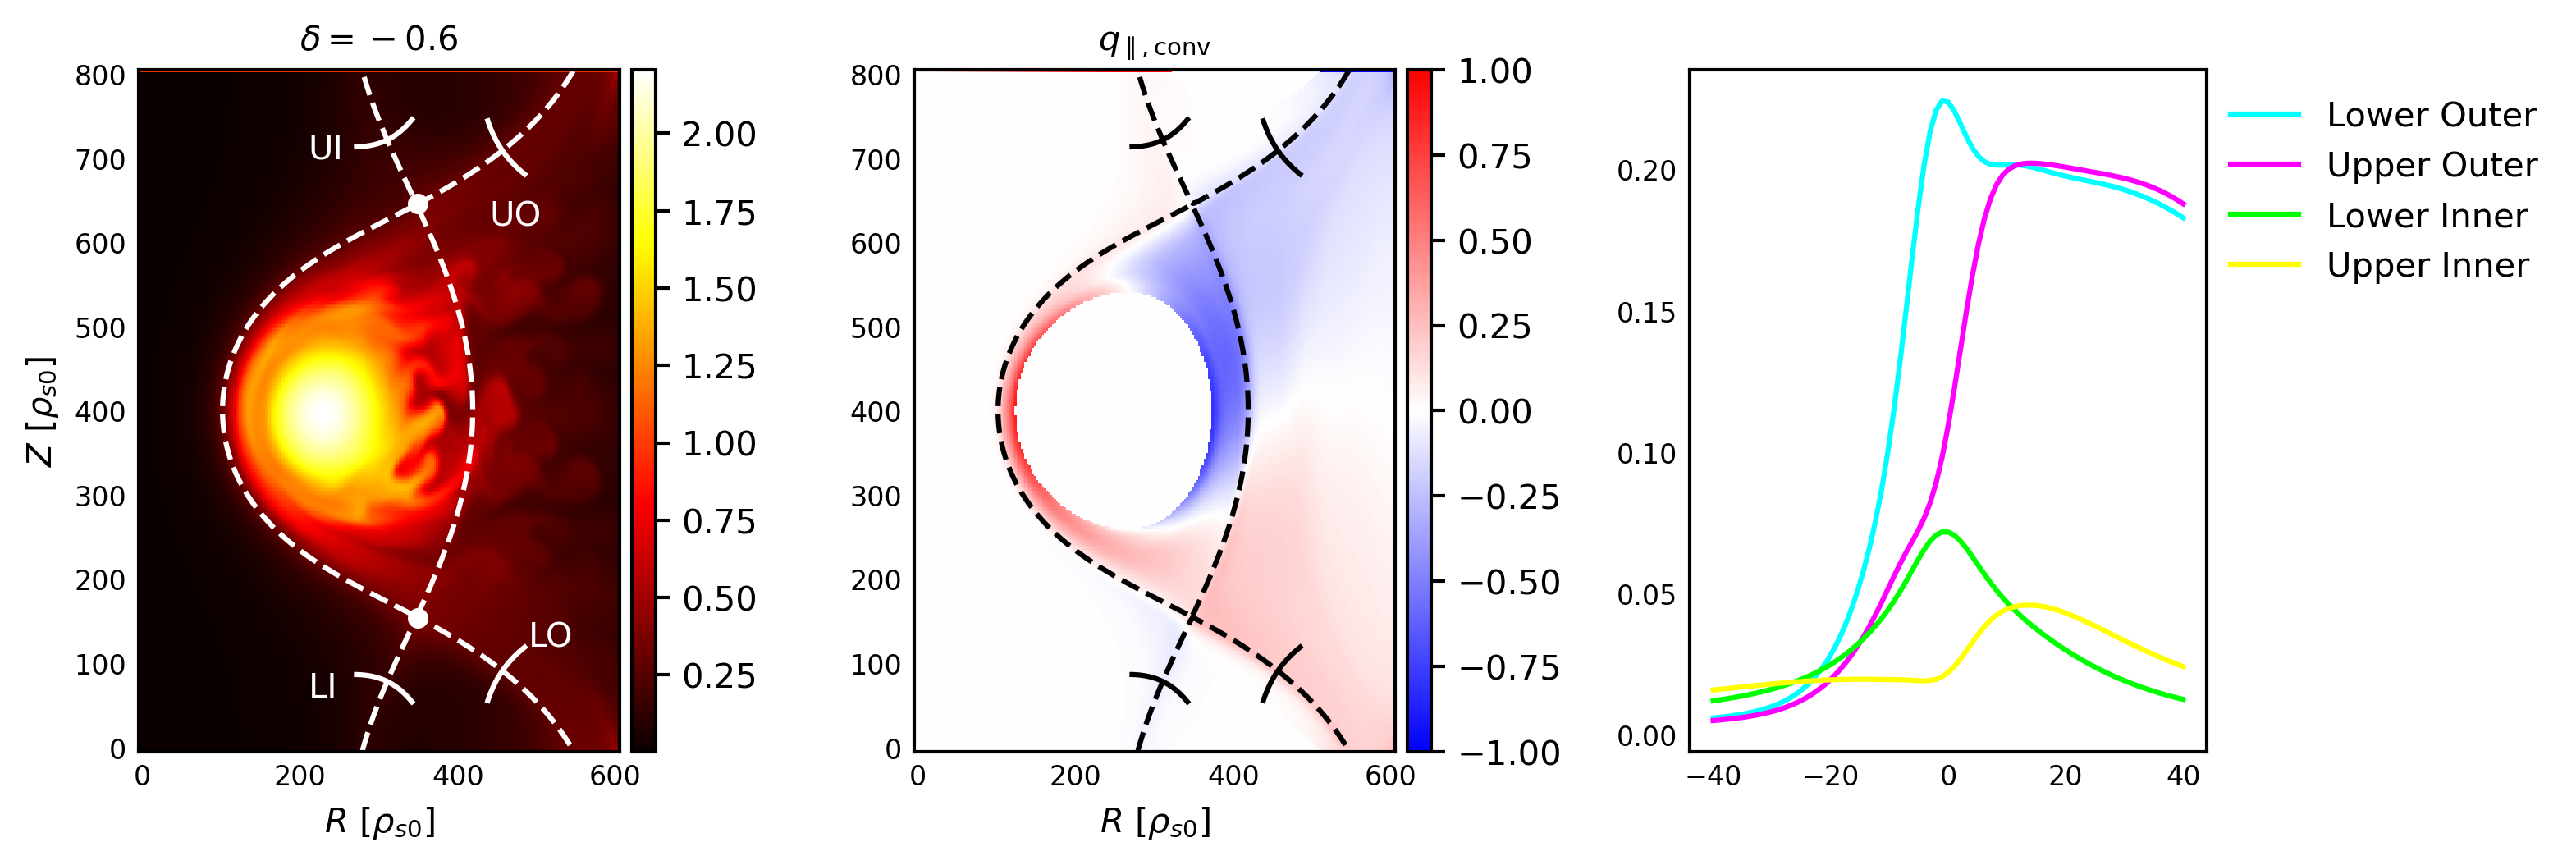

In [62]:
fig, axes = plt.subplots(ncols=3, figsize=(3*fig_width, 1.6*fig_height))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.4)

X,Y = np.meshgrid(s.x, s.y)

cs0=axes[0].pcolormesh(X, Y, dens_DNT_st0p05[:,:,0,-1], cmap='hot', rasterized=True)
divider = make_axes_locatable(axes[0])
cax0 = divider.append_axes('right', size='5%', pad=0.05)
cbar0 = fig.colorbar(cs0, cax=cax0, orientation='vertical')
cbar0.ax.tick_params(labelsize=10)  # Adjusted size

###############################################################################
qpare_DNT_st0p05_masked = np.copy(qpare_DNT_st0p05)

# Apply mask for the core region
for i in range(s.ny):
    for j in range(s.nx):
        if Psi_NT_st0p05[i,j] < Psi_NT_st0p05[iy0_NT_st0p05,ix0_NT_st0p05]+6000:
            qpare_DNT_st0p05_masked[i,j]=0.0
################################################################################            

cs1=axes[1].pcolormesh(X, Y, qpare_DNT_st0p05_masked, cmap='bwr', vmin=-1, vmax=1, rasterized=True)
divider = make_axes_locatable(axes[1])
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar1 = fig.colorbar(cs1, cax=cax1, orientation='vertical')
cbar1.ax.tick_params(labelsize=10)  # Adjusted size

axes[0].scatter(s.xxpt, s.yxpt, c='w')
axes[0].scatter(s.xxpt, 800-s.yxpt, c='w')

#ax.scatter(UI_DNT_st0p05)

axes[0].plot(coord_UI_DNT_st0p05[0,:], coord_UI_DNT_st0p05[1,:], c='w', linestyle='-')
axes[0].plot(coord_UO_DNT_st0p05[0,:], coord_UO_DNT_st0p05[1,:], c='w', linestyle='-')
axes[0].plot(coord_LI_DNT_st0p05[0,:], coord_LI_DNT_st0p05[1,:], c='w', linestyle='-')
axes[0].plot(coord_LO_DNT_st0p05[0,:], coord_LO_DNT_st0p05[1,:], c='w', linestyle='-')

# Plot Separatrix
axes[0].contour(X, Y, Psi_NT_st0p05, levels=[Psi_NT_st0p05[iyxpt_NT_st0p05, ixxpt_NT_st0p05]], colors='w', linestyles='--')
axes[1].contour(X, Y, Psi_NT_st0p05, levels=[Psi_NT_st0p05[iyxpt_NT_st0p05, ixxpt_NT_st0p05]], colors='k', linestyles='--')

axes[1].plot(coord_UI_DNT_st0p05[0,:], coord_UI_DNT_st0p05[1,:], c='k', linestyle='-')
axes[1].plot(coord_UO_DNT_st0p05[0,:], coord_UO_DNT_st0p05[1,:], c='k', linestyle='-')
axes[1].plot(coord_LI_DNT_st0p05[0,:], coord_LI_DNT_st0p05[1,:], c='k', linestyle='-')
axes[1].plot(coord_LO_DNT_st0p05[0,:], coord_LO_DNT_st0p05[1,:], c='k', linestyle='-')

axes[2].plot(length_LO_DNT_st0p05, np.abs(qpare_DNT_st0p05_LO), label="Lower Outer", c='cyan')
axes[2].plot(length_UO_DNT_st0p05, np.abs(qpare_DNT_st0p05_UO), label="Upper Outer", c='magenta')
axes[2].plot(length_LI_DNT_st0p05, np.abs(qpare_DNT_st0p05_LI), label="Lower Inner", c='lime')
axes[2].plot(length_UI_DNT_st0p05, np.abs(qpare_DNT_st0p05_UI), label="Upper Inner", c='yellow')

for ax in axes:
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='minor', direction="in", size=0.2, width=0.2)
    ax.tick_params(which='major', direction="in", size=0.5, width=0.4)


axes[0].set_xlabel(r'$R\,\,[\rho_{s0}]$')
axes[1].set_xlabel(r'$R\,\,[\rho_{s0}]$')
axes[0].set_ylabel(r'$Z\,\,[\rho_{s0}]$', rotation=90)
    
axes[0].text(490, 120, 'LO', style ='normal', family='sans-serif', color ="w")
axes[0].text(210, 60, 'LI', style ='normal', family='sans-serif', color ="w")
axes[0].text(440, 620, 'UO', style ='normal', family='sans-serif', color ="w")
axes[0].text(210, 700, 'UI', style ='normal', family='sans-serif', color ="w")

axes[0].set_title(r'$\delta=-0.6$')
axes[1].set_title(r'$q_{\parallel, \rm{conv}}$')

leg=axes[2].legend(bbox_to_anchor=(1.7, 1.), loc='upper right', edgecolor='white', prop={'size': 10}, 
         facecolor='white', framealpha=0)

# Save the figure
dpi_val = 300
home_directory = os.path.expanduser('~')
os.chdir(home_directory)
#plt.savefig("DN_PT_getline_st0p05.pdf", bbox_inches='tight', format='pdf', pad_inches=0.01, dpi=dpi_val)

<div class="alert alert-block alert-info"  style="text-align: center;">
<span style="font-size: 20px;"><b> DNT $s_{T0}=0.3$ </b></span><br>
</div>

In [ ]:
os.chdir('/marconi_work/FUA37_TSVV2/kyungtak/GBS_DN/DN_tria/st_scan/DNT_st0p3')

# Load GBS simulations
s=g.Sim()

t_final = s.time[-1]-3
t_init = t_final -5
t_read = np.linspace(t_init, t_final, 101)

Psi_NT_st0p3 = s.Psi
ixxpt_NT_st0p3 = s.ixxpt
iyxpt_NT_st0p3 = s.iyxpt
iy0_NT_st0p3 = s.iy0
ix0_NT_st0p3 = s.ix0

dens_DNT_st0p3  = s.get_field('n', t1=t_init, t2=t_final)
vpare_DNT_st0p3 = s.get_field('vpare', t1=t_init, t2=t_final)
Te_DNT_st0p3 = s.get_field('Te', t1=t_init, t2=t_final)
phi_DNT_st0p3 = s.get_field('strmf', t1=t_init, t2=t_final)

vpare_DNT_st0p3_avg = np.mean(vpare_DNT_st0p3, axis=(2,3))

# Fluctuating quantity
dens_DNT_st0p3_avg  = np.mean(dens_DNT_st0p3, axis=(2,3)); dens_DNT_st0p3_avg_tor = np.mean(dens_DNT_st0p3, axis=2)
dens_DNT_st0p3_fluct   = np.sqrt((dens_DNT_st0p3[:,:,0,:]-dens_DNT_st0p3_avg_tor)**2) / dens_DNT_st0p3_avg_tor
dens_DNT_st0p3_fluct_avg = np.mean(dens_DNT_st0p3_fluct, axis=2)

phi_DNT_st0p3_avg  = np.mean(phi_DNT_st0p3, axis=(2,3)); phi_DNT_st0p3_avg_tor = np.mean(phi_DNT_st0p3, axis=2)
phi_DNT_st0p3_fluct   = np.sqrt((phi_DNT_st0p3[:,:,0,:]-phi_DNT_st0p3_avg_tor)**2) / phi_DNT_st0p3_avg_tor
phi_DNT_st0p3_fluct_avg = np.mean(phi_DNT_st0p3_fluct, axis=2)

# Convective Heat Flux
qpare_DNT_st0p3 = (5/2) * np.mean(vpare_DNT_st0p3 * Te_DNT_st0p3 * dens_DNT_st0p3, axis=(2,3))

In [ ]:
# For balanced DN
UO_DNT_st0p3=(456.5503784658009, 709.075944151039)
UI_DNT_st0p3=(310.36118514691896, 721.6963043686486)
LI_DNT_st0p3=(310.3629879445284, 78.30729369710014)
LO_DNT_st0p3=(456.5471511382758, 90.92656834368125)

coord_UI_DNT_st0p3, length_UI_DNT_st0p3 = get_line(s, UI_DNT_st0p3, (-40,40), "psi", resolution=(40,40))
coord_UO_DNT_st0p3, length_UO_DNT_st0p3 = get_line(s, UO_DNT_st0p3, (-40,40), "psi", resolution=(40,40))
coord_LI_DNT_st0p3, length_LI_DNT_st0p3 = get_line(s, LI_DNT_st0p3, (-40,40), "psi", resolution=(40,40))
coord_LO_DNT_st0p3, length_LO_DNT_st0p3 = get_line(s, LO_DNT_st0p3, (-40,40), "psi", resolution=(40,40))

# Half length
#coord_xpt_up, length_xpt_up = get_line(s, (s.xxpt, s.yxpt), (-1,125), "chi", resolution=(40,125))
#coord_xpt_up2, length_xpt_up2 = get_line(s, (s.xxpt, s.yxpt), (-85,1), "chi", resolution=(40,40))
#coord_xpt_up3, length_xpt_up3 = get_line(s, (s.xxpt, 800-s.yxpt), (-1,85), "chi", resolution=(40,40))
#coord_xpt_up4, length_xpt_up4 = get_line(s, (s.xxpt, 800-s.yxpt), (-125,1), "chi", resolution=(40,40))


from scipy.interpolate import RectBivariateSpline
qpare_interpolant = RectBivariateSpline(s.y, s.x, qpare_DNT_st0p3)
qpare_DNT_st0p3_UI = qpare_interpolant(coord_UI_DNT_st0p3[1,:], coord_UI_DNT_st0p3[0,:], grid=False)
qpare_DNT_st0p3_UO = qpare_interpolant(coord_UO_DNT_st0p3[1,:], coord_UO_DNT_st0p3[0,:], grid=False)
qpare_DNT_st0p3_LI = qpare_interpolant(coord_LI_DNT_st0p3[1,:], coord_LI_DNT_st0p3[0,:], grid=False)
qpare_DNT_st0p3_LO = qpare_interpolant(coord_LO_DNT_st0p3[1,:], coord_LO_DNT_st0p3[0,:], grid=False)


# Apply the function to each array
Heat_DNT_st0p3_LO = np.sum(np.abs(qpare_DNT_st0p3_LO))
Heat_DNT_st0p3_UO = np.sum(np.abs(qpare_DNT_st0p3_UO))
Heat_DNT_st0p3_LI = np.sum(np.abs(qpare_DNT_st0p3_LI))
Heat_DNT_st0p3_UI = np.sum(np.abs(qpare_DNT_st0p3_UI))

# Peak Heat Flux
Peak_DNT_st0p3_LO = np.max(np.abs(qpare_DNT_st0p3_LO))
Peak_DNT_st0p3_UO = np.max(np.abs(qpare_DNT_st0p3_UO))
Peak_DNT_st0p3_LI = np.max(np.abs(qpare_DNT_st0p3_LI))
Peak_DNT_st0p3_UI = np.max(np.abs(qpare_DNT_st0p3_UI))

Heat_tot_DNT_st0p3 = Heat_DNT_st0p3_LO + Heat_DNT_st0p3_UO + Heat_DNT_st0p3_LI + Heat_DNT_st0p3_UI
Peak_tot_DNT_st0p3 = Peak_DNT_st0p3_LO + Peak_DNT_st0p3_UO + Peak_DNT_st0p3_LI + Peak_DNT_st0p3_UI


# Calculating the proportion of each element
chart_tot_DNT_st0p3 = [Heat_DNT_st0p3_LO, Heat_DNT_st0p3_UO, Heat_DNT_st0p3_LI, Heat_DNT_st0p3_UI] / Heat_tot_DNT_st0p3
chart_peak_DNT_st0p3= [Peak_DNT_st0p3_LO, Peak_DNT_st0p3_UO, Peak_DNT_st0p3_LI, Peak_DNT_st0p3_UI] / Peak_tot_DNT_st0p3

# Labels for each slice
labels = ['LO', 'UO', 'LI', 'UI']

# Creating the pie chart
fig, ax = plt.subplots(ncols=2, figsize=(8, 4), dpi=100)
ax[0].pie(chart_tot, labels=labels, autopct='%1.1f%%', startangle=140)
ax[0].set_title(r'DNT $\delta=-0.6$')
ax[1].pie(chart_peak, labels=labels, autopct='%1.1f%%', startangle=140)
ax[1].set_title(r'DNT peak $\delta=-0.6$')


In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(3*fig_width, 1.6*fig_height))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.4)

X,Y = np.meshgrid(s.x, s.y)

cs0=axes[0].pcolormesh(X, Y, dens_DNT_st0p3[:,:,0,-1], cmap='hot', rasterized=True)
divider = make_axes_locatable(axes[0])
cax0 = divider.append_axes('right', size='5%', pad=0.05)
cbar0 = fig.colorbar(cs0, cax=cax0, orientation='vertical')
cbar0.ax.tick_params(labelsize=10)  # Adjusted size

###############################################################################
qpare_DNT_st0p3_masked = np.copy(qpare_DNT_st0p3)

# Apply mask for the core region
for i in range(s.ny):
    for j in range(s.nx):
        if Psi_NT_st0p3[i,j] < Psi_NT_st0p3[iy0_NT_st0p3,ix0_NT_st0p3]+6000:
            qpare_DNT_st0p3_masked[i,j]=0.0
################################################################################            

cs1=axes[1].pcolormesh(X, Y, qpare_DNT_st0p3_masked, cmap='bwr', vmin=-1, vmax=1, rasterized=True)
divider = make_axes_locatable(axes[1])
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar1 = fig.colorbar(cs1, cax=cax1, orientation='vertical')
cbar1.ax.tick_params(labelsize=10)  # Adjusted size

axes[0].scatter(s.xxpt, s.yxpt, c='w')
axes[0].scatter(s.xxpt, 800-s.yxpt, c='w')

#ax.scatter(UI_DNT_st0p3)

axes[0].plot(coord_UI_DNT_st0p3[0,:], coord_UI_DNT_st0p3[1,:], c='w', linestyle='-')
axes[0].plot(coord_UO_DNT_st0p3[0,:], coord_UO_DNT_st0p3[1,:], c='w', linestyle='-')
axes[0].plot(coord_LI_DNT_st0p3[0,:], coord_LI_DNT_st0p3[1,:], c='w', linestyle='-')
axes[0].plot(coord_LO_DNT_st0p3[0,:], coord_LO_DNT_st0p3[1,:], c='w', linestyle='-')

# Plot Separatrix
axes[0].contour(X, Y, Psi_NT_st0p3, levels=[Psi_NT_st0p3[iyxpt_NT_st0p3, ixxpt_NT_st0p3]], colors='w', linestyles='--')
axes[1].contour(X, Y, Psi_NT_st0p3, levels=[Psi_NT_st0p3[iyxpt_NT_st0p3, ixxpt_NT_st0p3]], colors='k', linestyles='--')

axes[1].plot(coord_UI_DNT_st0p3[0,:], coord_UI_DNT_st0p3[1,:], c='k', linestyle='-')
axes[1].plot(coord_UO_DNT_st0p3[0,:], coord_UO_DNT_st0p3[1,:], c='k', linestyle='-')
axes[1].plot(coord_LI_DNT_st0p3[0,:], coord_LI_DNT_st0p3[1,:], c='k', linestyle='-')
axes[1].plot(coord_LO_DNT_st0p3[0,:], coord_LO_DNT_st0p3[1,:], c='k', linestyle='-')

axes[2].plot(length_LO_DNT_st0p3, np.abs(qpare_DNT_st0p3_LO), label="Lower Outer", c='cyan')
axes[2].plot(length_UO_DNT_st0p3, np.abs(qpare_DNT_st0p3_UO), label="Upper Outer", c='magenta')
axes[2].plot(length_LI_DNT_st0p3, np.abs(qpare_DNT_st0p3_LI), label="Lower Inner", c='lime')
axes[2].plot(length_UI_DNT_st0p3, np.abs(qpare_DNT_st0p3_UI), label="Upper Inner", c='yellow')

for ax in axes:
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='minor', direction="in", size=0.2, width=0.2)
    ax.tick_params(which='major', direction="in", size=0.5, width=0.4)


axes[0].set_xlabel(r'$R\,\,[\rho_{s0}]$')
axes[1].set_xlabel(r'$R\,\,[\rho_{s0}]$')
axes[0].set_ylabel(r'$Z\,\,[\rho_{s0}]$', rotation=90)
    
axes[0].text(490, 120, 'LO', style ='normal', family='sans-serif', color ="w")
axes[0].text(210, 60, 'LI', style ='normal', family='sans-serif', color ="w")
axes[0].text(440, 620, 'UO', style ='normal', family='sans-serif', color ="w")
axes[0].text(210, 700, 'UI', style ='normal', family='sans-serif', color ="w")

axes[0].set_title(r'$\delta=-0.6$')
axes[1].set_title(r'$q_{\parallel, \rm{conv}}$')

leg=axes[2].legend(bbox_to_anchor=(1.7, 1.), loc='upper right', edgecolor='white', prop={'size': 10}, 
         facecolor='white', framealpha=0)

# Save the figure
dpi_val = 300
home_directory = os.path.expanduser('~')
os.chdir(home_directory)
#plt.savefig("DN_PT_getline_st0p3.pdf", bbox_inches='tight', format='pdf', pad_inches=0.01, dpi=dpi_val)

<div class="alert alert-block alert-info"  style="text-align: center;">
<span style="font-size: 40px;"><b> Now figures for the paper </b></span><br>
</div>

In [64]:
# IEEE journals typically require figures to be very clear at a column width of around 3.5 to 4 inches
fig_width = 3.5  # in inches
fig_height = fig_width / 1.618  # Golden ratio height for a single subplot

plt.rcParams.update({
    # Figure size and DPI
    'figure.figsize': (fig_width, fig_width / 1.618),  # IEEE column width, golden ratio height
    'figure.dpi': 300,                     # Figure resolution
    'savefig.dpi': 300,                    # Save figure resolution
    'savefig.format': 'pdf',               # Preferred format for vector graphics

    # Font settings
    'font.size': 10,                       # Main font size
    'font.family': 'sans-serif',           # Font family
    'font.sans-serif': ['Arial', 'Helvetica', 'DejaVu Sans'],  # Font type

    # Axes settings
    'axes.labelsize': 10,                  # Font size of the x and y labels
    'axes.titlesize': 10,                  # Font size of the title
    'axes.linewidth': 1,                   # Edge line width

    # Tick settings
    'xtick.labelsize': 8,                  # Font size of the x tick labels
    'ytick.labelsize': 8,                  # Font size of the y tick labels
    'xtick.major.size': 4,                 # Length of major tick marks
    'xtick.minor.size': 2,                 # Length of minor tick marks
    'xtick.major.width': 1,                # Width of major tick marks
    'xtick.minor.width': 0.5,              # Width of minor tick marks
    'ytick.major.size': 4,                 # Length of major tick marks
    'ytick.minor.size': 2,                 # Length of minor tick marks
    'ytick.major.width': 1,                # Width of major tick marks
    'ytick.minor.width': 0.5,              # Width of minor tick marks

    # Legend settings
    'legend.fontsize': 8,                  # Font size of the legend
    'legend.frameon': True,               # Disable background frame
    'legend.edgecolor':'white',

    # Line settings
    'lines.linewidth': 1.5,                # Line width
    'lines.markersize': 5,                 # Marker size

    # Grid settings
    'grid.alpha': 0.5,                     # Grid line transparency
    'grid.linestyle': ':',                 # Grid line style

})


<div class="alert alert-block alert-info"  style="text-align: center;">
<span style="font-size: 40px;"><b> Each target power distribution comparison </b></span><br>
</div>

NameError: name 'Heat_DNT_dn0p3_LO' is not defined

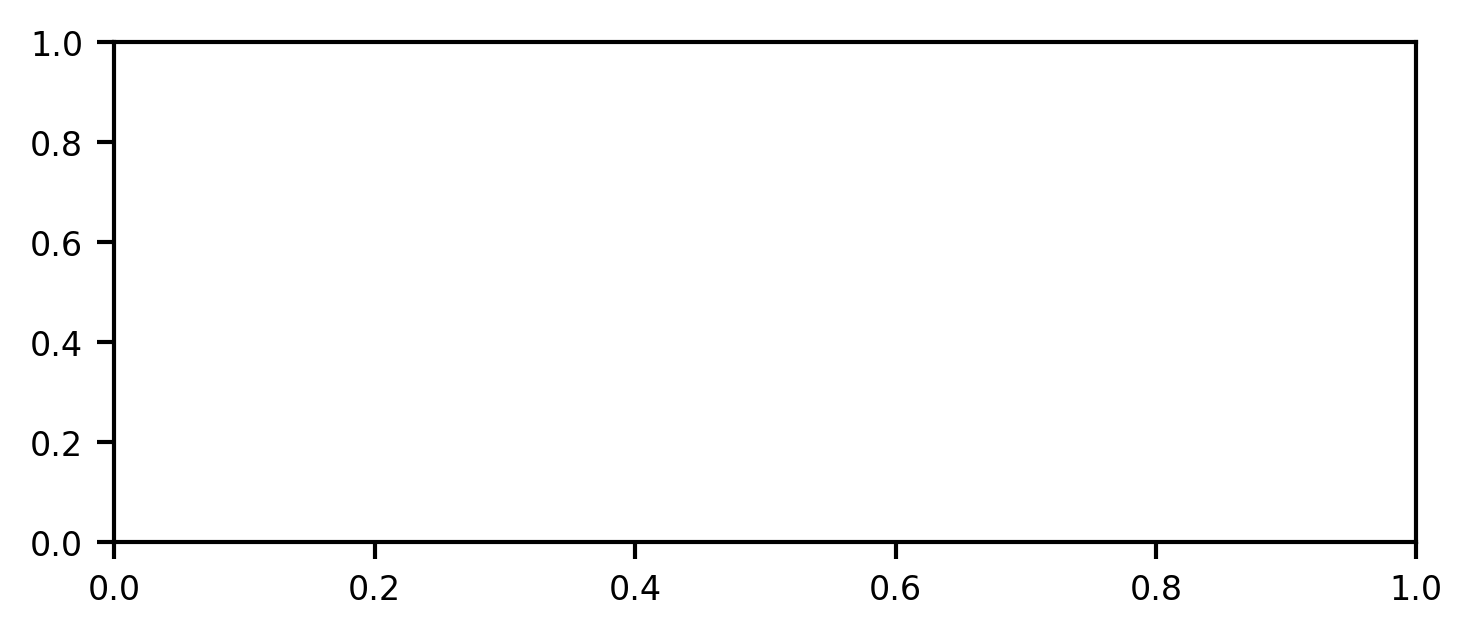

In [65]:
# Colors for each category
colors = ['tab:blue', 'tab:cyan', 'firebrick', 'lightcoral']

# Creating the figure and axes


fig, ax = plt.subplots(ncols=1, figsize=(1.6*fig_width, fig_height))


# Bar positions and width
bar_width = 0.4
index = np.arange(6)  # Positions for DNT and DPT

# Function to plot stacked bars
def plot_stacked_bars(index, heat_values, colors, labels):
    bottom = 0
    for value, color in zip(heat_values, colors):
        plt.bar(index, value, bottom=bottom, color=color, width=bar_width, edgecolor='white', label=labels[heat_values.index(value)])
        bottom += value

# Grouping the heat values for DNT and DPT
heat_DNT_dn0p3_outer = [Heat_DNT_dn0p3_LO, Heat_DNT_dn0p3_UO]
heat_DNT_dn0p3_inner = [Heat_DNT_dn0p3_LI, Heat_DNT_dn0p3_UI]
heat_DNT_dn0p4_outer = [Heat_DNT_dn0p4_LO, Heat_DNT_dn0p4_UO]
heat_DNT_dn0p4_inner = [Heat_DNT_dn0p4_LI, Heat_DNT_dn0p4_UI]
heat_DNT_dn0p5_outer = [Heat_DNT_dn0p5_LO, Heat_DNT_dn0p5_UO]
heat_DNT_dn0p5_inner = [Heat_DNT_dn0p5_LI, Heat_DNT_dn0p5_UI]
heat_DNT_dn0p6_outer = [Heat_DNT_dn0p6_LO, Heat_DNT_dn0p6_UO]
heat_DNT_dn0p6_inner = [Heat_DNT_dn0p6_LI, Heat_DNT_dn0p6_UI]


heat_DPT_d0p3_outer = [Heat_DPT_d0p3_LO, Heat_DPT_d0p3_UO]
heat_DPT_d0p3_inner = [Heat_DPT_d0p3_LI, Heat_DPT_d0p3_UI]
heat_DPT_d0p4_outer = [Heat_DPT_d0p4_LO, Heat_DPT_d0p4_UO]
heat_DPT_d0p4_inner = [Heat_DPT_d0p4_LI, Heat_DPT_d0p4_UI]
heat_DPT_d0p5_outer = [Heat_DPT_d0p5_LO, Heat_DPT_d0p5_UO]
heat_DPT_d0p5_inner = [Heat_DPT_d0p5_LI, Heat_DPT_d0p5_UI]
heat_DPT_d0p6_outer = [Heat_DPT_d0p6_LO, Heat_DPT_d0p6_UO]
heat_DPT_d0p6_inner = [Heat_DPT_d0p6_LI, Heat_DPT_d0p6_UI]

# Labels for the legend
labels = ['LO', 'UO', 'LI', 'UI']

# Plotting stacked bars for DNT and DPT

plot_stacked_bars(index[0] - bar_width/2, heat_DNT_dn0p3_inner, colors[2:], labels[2:])
plot_stacked_bars(index[0] + bar_width/2, heat_DNT_dn0p3_outer, colors[:2], labels[:2])

plot_stacked_bars(index[1] - bar_width/2, heat_DPT_d0p3_inner, colors[2:], labels[2:])
plot_stacked_bars(index[1] + bar_width/2, heat_DPT_d0p3_outer, colors[:2], labels[:2])

plot_stacked_bars(index[2] - bar_width/2, heat_DNT_dn0p4_inner, colors[2:], labels[2:])
plot_stacked_bars(index[2] + bar_width/2, heat_DNT_dn0p4_outer, colors[:2], labels[:2])

plot_stacked_bars(index[3] - bar_width/2, heat_DPT_d0p4_inner, colors[2:], labels[2:])
plot_stacked_bars(index[3] + bar_width/2, heat_DPT_d0p4_outer, colors[:2], labels[:2])

#plot_stacked_bars(index[4] - bar_width/2, heat_DNT_dn0p5_inner, colors[2:], labels[2:])
#plot_stacked_bars(index[4] + bar_width/2, heat_DNT_dn0p5_outer, colors[:2], labels[:2])

#plot_stacked_bars(index[5] - bar_width/2, heat_DPT_d0p5_inner, colors[2:], labels[2:])
#plot_stacked_bars(index[5] + bar_width/2, heat_DPT_d0p5_outer, colors[:2], labels[:2])


plot_stacked_bars(index[4] - bar_width/2, heat_DNT_dn0p6_inner, colors[2:], labels[2:])
plot_stacked_bars(index[4] + bar_width/2, heat_DNT_dn0p6_outer, colors[:2], labels[:2])

plot_stacked_bars(index[5] - bar_width/2, heat_DPT_d0p6_inner, colors[2:], labels[2:])
plot_stacked_bars(index[5] + bar_width/2, heat_DPT_d0p6_outer, colors[:2], labels[:2])

# Adding titles and labels
#plt.title('Total Heat Distribution in DNT and DPT Regions')
plt.ylabel(r'Total $q_{\parallel, e}$ (a. u.) ')

#plt.xticks(index, ['NT\n$\delta=-0.3$', 'PT\n$\delta=+0.3$', 'NT\n$\delta=-0.4$', 'PT\n$\delta=+0.4$', 
#                   'NT\n$\delta=-0.5$', 'PT\n$\delta=+0.5$', 'NT\n$\delta=-0.6$','PT\n$\delta=+0.6$'])
plt.xticks(index, ['NT\n$\delta=-0.3$', 'PT\n$\delta=+0.3$', 'NT\n$\delta=-0.4$', 'PT\n$\delta=+0.4$', 
                'NT\n$\delta=-0.6$','PT\n$\delta=+0.6$'])

# Adding a legend to explain the colors
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
#plt.legend(by_label.values(), by_label.keys(), title='Heat Categories', bbox_to_anchor=(0.5, 1), loc='upper left')
# Adjusting the legend to display horizontally
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.2, 1), 
           loc='upper left', ncol=len(by_label.keys()), borderaxespad=0., framealpha=0)


# Save the figure
dpi_val = 300
home_directory = os.path.expanduser('~')
os.chdir(home_directory)
#plt.savefig("qpar_bar_graph.pdf", bbox_inches='tight', format='pdf', pad_inches=0.01, dpi=dpi_val)

NameError: name 'Psi_PT_d0p3' is not defined

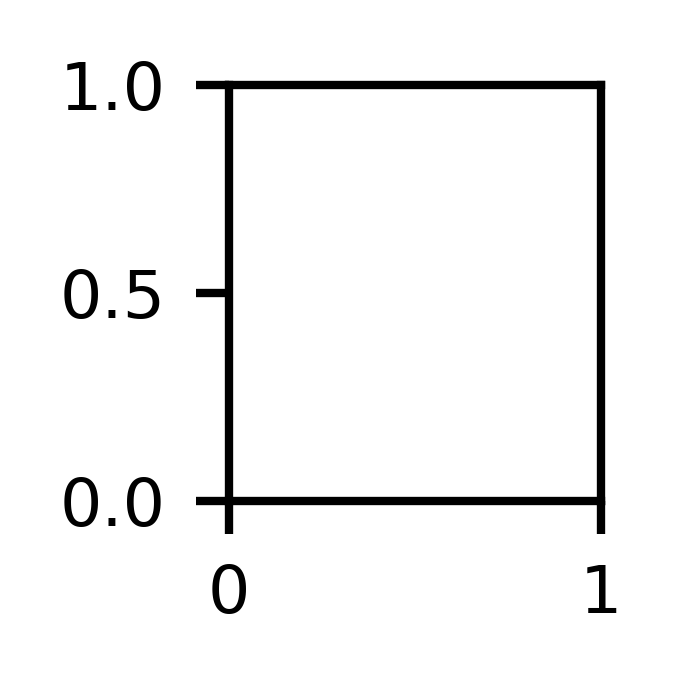

In [66]:
           
fig, ax = plt.subplots(figsize=(0.8,0.9), dpi=600)
X,Y = np.meshgrid(s.x, s.y)


ax.contour(X, Y, Psi_PT_d0p3, levels=[Psi_PT_d0p3[iyxpt_PT_d0p3, ixxpt_PT_d0p3]], colors='m', linewidths=0.3, linestyles='--')
ax.contour(X, Y, Psi_PT_d0p4, levels=[Psi_PT_d0p4[iyxpt_PT_d0p4, ixxpt_PT_d0p4]], colors='k', linewidths=0.3, linestyles='--')
ax.contour(X, Y, Psi_PT_d0p5, levels=[Psi_PT_d0p5[iyxpt_PT_d0p5, ixxpt_PT_d0p5]], colors='g', linewidths=0.3, linestyles='--')
ax.contour(X, Y, Psi_PT_d0p6, levels=[Psi_PT_d0p6[iyxpt_PT_d0p6, ixxpt_PT_d0p6]], colors='b', linewidths=0.3, linestyles='--')

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='minor', direction="in", size=0.2, width=0.2)
ax.tick_params(which='major', direction="in", size=0.5, width=0.4)
ax.tick_params(axis='x', labelsize=3, pad=1)
ax.tick_params(axis='y', labelsize=3, pad=1)
ax.yaxis.get_offset_text().set_fontsize(2.5)
ax.set_xticks([0, 200, 400, 600])  # Set the positions of the x-axis ticks
ax.set_xlabel(r'$R\,\,[\rho_{s0}]$', fontsize=3, labelpad=1)
ax.set_ylabel(r'$Z\,\,[\rho_{s0}]$', fontsize=3, rotation=90, labelpad=1)

ax.spines["bottom"].set_linewidth(0.2)
ax.spines["left"].set_linewidth(0.2)
ax.spines["right"].set_linewidth(0.2)
ax.spines["top"].set_linewidth(0.2)

ax.text(410, 80, 'LO', style ='normal', family='sans-serif', fontsize = 3, color ="w")
ax.text(120, 100, 'LI', style ='normal', family='sans-serif', fontsize = 3, color ="w")
ax.text(410, 690, 'UO', style ='normal', family='sans-serif', fontsize = 3, color ="w")
ax.text(120, 650, 'UI', style ='normal', family='sans-serif', fontsize = 3, color ="w")

#ax.set_title(r'$\delta=+0.6$', fontsize=3, pad=1)
ax.set_title(r'$q_{\parallel e}$ in PT', fontsize=3, pad=1)

In [ ]:

#fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(2.4*fig_width, 2*1.6*fig_height), sharex=True, 
#                         sharey=True, dpi=100)

fig, axes = plt.subplots(ncols=2, figsize=(2.4*fig_width, fig_height), dpi=200)
plt.subplots_adjust(wspace=0.15)  # Adjust the width space

X, Y = np.meshgrid(s.x, s.y)
axes[0].plot(length_LO_DNT_dn0p6, np.abs(qpare_DNT_dn0p6_LO), label=r"Lower Outer", c='b')
axes[0].plot(length_LO_DPT_d0p6, np.abs(qpare_DPT_d0p6_LO),  c='r')

axes[0].plot(length_UO_DNT_dn0p6, np.abs(qpare_DNT_dn0p6_UO), label=r"Upper Outer", c='b', ls='--')
axes[0].plot(length_UO_DPT_d0p6, np.abs(qpare_DPT_d0p6_UO), c='r', ls='--')

axes[1].plot(length_LI_DNT_dn0p6, np.abs(qpare_DNT_dn0p6_LI), label=r"Lower Inner", c='b')
axes[1].plot(length_LI_DPT_d0p6, np.abs(qpare_DPT_d0p6_LI),  c='r')

axes[1].plot(length_UI_DNT_dn0p6, np.abs(qpare_DNT_dn0p6_UI), label=r"Upper Inner", c='b', ls='--')
axes[1].plot(length_UI_DPT_d0p6, np.abs(qpare_DPT_d0p6_UI), c='r', ls='--')


for ax in axes:
    ax.axvline(x=0, c='k', ls='--', alpha=0.5)
    ax.set_xlabel(r'$\rho-\rho_{\rm{sep}} \, [\rho_{s0}]$ ')
    #ax.set_title(r'$\delta = \pm 0.6$')


for ax in axes:
    ax.grid(True, which='major', alpha=0.3, linestyle='-', linewidth=0.5)
    ax.grid(True, which='minor', alpha=0, linestyle='-', linewidth=0.5)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='minor', direction="in", size=1, width=0.5, pad=5)
    ax.tick_params(which='major', direction="in", size=3, width=0.5, pad=5)
    ax.tick_params(axis='x')
    ax.tick_params(axis='y')
    #ax.set_xlabel(r'$(r-r_{{sep}})$', rotation=0, size=5, labelpad=1)
    #ax.set_xlabel(r'R$\,[\rho_{s0}]$', rotation=0, size=14, labelpad=8)
    #ax.set_ylabel(r'$n$', rotation=90, size=3, labelpad=1)
    #ax.yaxis.get_offset_text().set_fontsize()
    # Figure edge setting
    ax.spines["bottom"].set_linewidth(1)
    ax.spines["left"].set_linewidth(1)
    ax.spines["right"].set_linewidth(1)
    ax.spines["top"].set_linewidth(1)
    #ax.set_xlim([450, 495])
    #ax.set_ylim([0.1, 1.7])
    #ax.axvline(x=470, lw=1, c='k', ls='--')
    ax.set_xticks(np.arange(-40, 41, 20))
    
    
    
axes[0].set_ylabel(r'$q_{\parallel e}$ (a. u.)')

axes[0].text(x=30, y=0.5, s='PT', color='r')
axes[0].text(x=20, y=0.3, s='NT', color='b')

axes[1].text(x=8, y=0.005, s='PT', color='r')
axes[1].text(x=10, y=0.08, s='NT', color='b')


custom_handles = [
    mlines.Line2D([], [], color='k', label='Lower Outer'),  
    mlines.Line2D([], [], color='k', linestyle=':', label='Upper Outer'),  
]

custom_handles_inner = [
    mlines.Line2D([], [], color='k', label='Lower Inner'),  
    mlines.Line2D([], [], color='k', linestyle=':', label='Upper Inner'),  
]

# Apply custom legend handles to the first axes
axes[0].legend(handles=custom_handles, bbox_to_anchor=(0.0, 1.), loc='upper left', edgecolor='white', facecolor='white', framealpha=0)
axes[1].legend(handles=custom_handles_inner, bbox_to_anchor=(0.0, 1.), loc='upper left', edgecolor='white', facecolor='white', framealpha=0)


# Save the figure
dpi_val = 300
home_directory = os.path.expanduser('~')
os.chdir(home_directory)
#plt.savefig("qpar_profile.pdf", bbox_inches='tight', format='pdf', pad_inches=0.01, dpi=dpi_val)

<div class="alert alert-block alert-info"  style="text-align: center;">
<span style="font-size: 40px;"><b> Power distributoin in percantage </b></span><br>
</div>

In [ ]:
# Calculating the proportion of each element


data_tot = np.array([chart_tot_DNT_nu0p1, chart_tot_DNT_dn0p6, chart_tot_DNT_nu1, 
                     chart_tot_DPT_nu0p1, chart_tot_DPT_d0p6, chart_tot_DPT_nu1])
data_LO_nu_scan = np.array([chart[0]*100 for chart in data_tot])
data_UO_nu_scan = np.array([chart[1]*100 for chart in data_tot])
data_LI_nu_scan = np.array([chart[2]*100 for chart in data_tot])
data_UI_nu_scan = np.array([chart[3]*100 for chart in data_tot])

data_peak = np.array([chart_peak_DNT_nu0p1, chart_peak_DNT_dn0p6, chart_peak_DNT_nu1, 
                     chart_peak_DPT_nu0p1, chart_peak_DPT_d0p6, chart_peak_DPT_nu1])

peak_LO_nu_scan = np.array([chart[0]*100 for chart in data_peak])
peak_UO_nu_scan = np.array([chart[1]*100 for chart in data_peak])
peak_LI_nu_scan = np.array([chart[2]*100 for chart in data_peak])
peak_UI_nu_scan = np.array([chart[3]*100 for chart in data_peak])


# Labels for each slice
labels = ['LO', 'UO', 'LI', 'UI']

# Creating the stacked bar graph
fig, ax = plt.subplots(figsize=(fig_width, fig_height), dpi=300)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=2, hspace=0.4)
colors = ['tab:blue', 'tab:cyan', 'firebrick', 'lightcoral']
xlabels = [r'$0.1$' +'\n' '(NT)', r'$0.3$' +'\n' ' (NT)', r'$1.0$' +'\n' ' (NT)', 
           r'$0.1$ ' +'\n' '(PT)', r'$0.3$' +'\n' ' (PT)',  r'$1.0$' +'\n' ' (PT)']
# Calculating cumulative data for stacking
cumulative_LO = data_LO_nu_scan
cumulative_UO = cumulative_LO + data_UO_nu_scan
cumulative_LI = cumulative_UO + data_LI_nu_scan
cumulative_UI = cumulative_LI + data_UI_nu_scan

# Fill between for each category
ax.fill_between(xlabels, 0, cumulative_LO, color=colors[0], label='LO')
ax.fill_between(xlabels, cumulative_LO, cumulative_UO, color=colors[1], label='UO')
ax.fill_between(xlabels, cumulative_UO, cumulative_LI, color=colors[2], label='LI')
ax.fill_between(xlabels, cumulative_LI, cumulative_UI, color=colors[3], label='UI')

ax.set_title('Total power distribution')
ax.set_xticks(xlabels)
ax.set_xticklabels(xlabels)
ax.set_ylabel('[%]')
ax.set_xlabel(r'Resistivity $\nu_0$')
ax.set_ylim([0, 100])  
#ax.set_xlim([0., 0.5])  
ax.margins(x=0)

ax.grid(True, which='major', lw=0.5)
ax.grid(True, which='major', alpha=1, linestyle=':', linewidth=0.5)
ax.tick_params(which='major', direction="in")
ax.tick_params(which='minor', direction="in")
# Get handles and labels
handles, labels = ax.get_legend_handles_labels()

# Reverse the order to match the reversed stack order
ax.legend(handles[::-1], labels[::-1], loc='upper left', bbox_to_anchor=(1, 1))

###########################################3

# Creating the stacked bar graph
fig, ax = plt.subplots(figsize=(fig_width, fig_height), dpi=300)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=2, hspace=0.4)

# Calculating cumulative data for stacking
cumul_peak_LO = peak_LO_nu_scan
cumul_peak_UO = cumul_peak_LO + peak_UO_nu_scan
cumul_peak_LI = cumul_peak_UO + peak_LI_nu_scan
cumul_peak_UI = cumul_peak_LI + peak_UI_nu_scan

# Fill between for each category
ax.fill_between(xlabels, 0, cumul_peak_LO, color=colors[0], label='LO')
ax.fill_between(xlabels, cumul_peak_LO, cumul_peak_UO, color=colors[1], label='UO')
ax.fill_between(xlabels, cumul_peak_UO, cumul_peak_LI, color=colors[2], label='LI')
ax.fill_between(xlabels, cumul_peak_LI, cumul_peak_UI, color=colors[3], label='UI')

ax.set_title('Peak power distribution')
ax.set_xticks(xlabels)
ax.set_xticklabels(xlabels)
ax.set_ylabel('[%]')
ax.set_xlabel(r'Resistivity $\nu_0$')
ax.set_ylim([0, 100])  
#ax.set_xlim([0., 0.5])  
ax.margins(x=0)

ax.grid(True, which='major', lw=0.5)
ax.grid(True, which='major', alpha=1, linestyle=':', linewidth=0.5)
ax.tick_params(which='major', direction="in")
ax.tick_params(which='minor', direction="in")
# Get handles and labels
handles, labels = ax.get_legend_handles_labels()

# Reverse the order to match the reversed stack order
ax.legend(handles[::-1], labels[::-1], loc='upper left', bbox_to_anchor=(1, 1))


In [ ]:
# Calculating the proportion of each element


data_tot = np.array([chart_tot_DNT_st0p05, chart_tot_DNT_dn0p6, chart_tot_DNT_st0p3, 
                     chart_tot_DPT_st0p05, chart_tot_DPT_d0p6, chart_tot_DPT_st0p3])
data_LO_st_scan = np.array([chart[0]*100 for chart in data_tot])
data_UO_st_scan = np.array([chart[1]*100 for chart in data_tot])
data_LI_st_scan = np.array([chart[2]*100 for chart in data_tot])
data_UI_st_scan = np.array([chart[3]*100 for chart in data_tot])

data_peak = np.array([chart_peak_DNT_st0p05, chart_peak_DNT_dn0p6, chart_peak_DNT_st0p3, 
                     chart_peak_DPT_st0p05, chart_peak_DPT_d0p6, chart_peak_DPT_st0p3])

peak_LO_st_scan = np.array([chart[0]*100 for chart in data_peak])
peak_UO_st_scan = np.array([chart[1]*100 for chart in data_peak])
peak_LI_st_scan = np.array([chart[2]*100 for chart in data_peak])
peak_UI_st_scan = np.array([chart[3]*100 for chart in data_peak])


# Labels for each slice
labels = ['LO', 'UO', 'LI', 'UI']

# Creating the stacked bar graph
fig, ax = plt.subplots(figsize=(fig_width, fig_height), dpi=300)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=2, hspace=0.4)
colors = ['tab:blue', 'tab:cyan', 'firebrick', 'lightcoral']
xlabels = [r'$0.05$' +'\n' '(NT)', r'$0.15$' +'\n' ' (NT)', r'$0.3$' +'\n' ' (NT)', 
           r'$0.05$ ' +'\n' '(PT)', r'$0.15$' +'\n' ' (PT)',  r'$0.3$' +'\n' ' (PT)']
# Calculating cumulative data for stacking
cumulative_LO = data_LO_st_scan
cumulative_UO = cumulative_LO + data_UO_st_scan
cumulative_LI = cumulative_UO + data_LI_st_scan
cumulative_UI = cumulative_LI + data_UI_st_scan

# Fill between for each category
ax.fill_between(xlabels, 0, cumulative_LO, color=colors[0], label='LO')
ax.fill_between(xlabels, cumulative_LO, cumulative_UO, color=colors[1], label='UO')
ax.fill_between(xlabels, cumulative_UO, cumulative_LI, color=colors[2], label='LI')
ax.fill_between(xlabels, cumulative_LI, cumulative_UI, color=colors[3], label='UI')

ax.set_title('Total power distribution')
ax.set_xticks(xlabels)
ax.set_xticklabels(xlabels)
ax.set_ylabel('[%]')
ax.set_xlabel(r'Heat source $s_{T0}$')
ax.set_ylim([0, 100])  
#ax.set_xlim([0., 0.5])  
ax.margins(x=0)

ax.grid(True, which='major', lw=0.5)
ax.grid(True, which='major', alpha=1, linestyle=':', linewidth=0.5)
ax.tick_params(which='major', direction="in")
ax.tick_params(which='minor', direction="in")
# Get handles and labels
handles, labels = ax.get_legend_handles_labels()

# Reverse the order to match the reversed stack order
ax.legend(handles[::-1], labels[::-1], loc='upper left', bbox_to_anchor=(1, 1))

###########################################3

# Creating the stacked bar graph
fig, ax = plt.subplots(figsize=(fig_width, fig_height), dpi=300)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=2, hspace=0.4)

# Calculating cumulative data for stacking
cumul_peak_LO = peak_LO_st_scan
cumul_peak_UO = cumul_peak_LO + peak_UO_st_scan
cumul_peak_LI = cumul_peak_UO + peak_LI_st_scan
cumul_peak_UI = cumul_peak_LI + peak_UI_st_scan

# Fill between for each category
ax.fill_between(xlabels, 0, cumul_peak_LO, color=colors[0], label='LO')
ax.fill_between(xlabels, cumul_peak_LO, cumul_peak_UO, color=colors[1], label='UO')
ax.fill_between(xlabels, cumul_peak_UO, cumul_peak_LI, color=colors[2], label='LI')
ax.fill_between(xlabels, cumul_peak_LI, cumul_peak_UI, color=colors[3], label='UI')

ax.set_title('Peak power distribution')
ax.set_xticks(xlabels)
ax.set_xticklabels(xlabels)
ax.set_ylabel('[%]')
ax.set_xlabel(r'Heat source $s_{T0}$')
ax.set_ylim([0, 100])  
#ax.set_xlim([0., 0.5])  
ax.margins(x=0)

ax.grid(True, which='major', lw=0.5)
ax.grid(True, which='major', alpha=1, linestyle=':', linewidth=0.5)
ax.tick_params(which='major', direction="in")
ax.tick_params(which='minor', direction="in")
# Get handles and labels
handles, labels = ax.get_legend_handles_labels()

# Reverse the order to match the reversed stack order
ax.legend(handles[::-1], labels[::-1], loc='upper left', bbox_to_anchor=(1, 1))


In [ ]:
Tot_qasym_outer_nu = np.abs(data_LO_nu_scan - data_UO_nu_scan)
Tot_qasym_outer_st = np.abs(data_LO_st_scan - data_UO_st_scan)
Peak_qasym_outer_nu = np.abs(peak_LO_nu_scan - peak_UO_nu_scan)
Peak_qasym_outer_st = np.abs(peak_LO_st_scan - peak_UO_st_scan)

Tot_inner_nu = data_LI_nu_scan + data_UI_nu_scan
Tot_inner_st = data_LI_st_scan + data_UI_st_scan

Peak_inner_nu = peak_LI_nu_scan + peak_UI_nu_scan
Peak_inner_st = peak_LI_st_scan + peak_UI_st_scan

In [ ]:
fig, axes=plt.subplots(ncols=2, figsize=(1.6*fig_width, fig_height))


xlabels_nu = [r'$0.1$' +'\n' '(NT)', r'$0.3$' +'\n' ' (NT)', r'$1.0$' +'\n' ' (NT)', 
           r'$0.1$ ' +'\n' '(PT)', r'$0.3$' +'\n' ' (PT)',  r'$1.0$' +'\n' ' (PT)']
xlabels_st = [r'$0.05$' +'\n' '(NT)', r'$0.15$' +'\n' ' (NT)', r'$0.3$' +'\n' ' (NT)', 
           r'$0.05$ ' +'\n' '(PT)', r'$0.15$' +'\n' ' (PT)',  r'$0.3$' +'\n' ' (PT)']


axes[0].scatter(xlabels_nu, Tot_qasym_outer_nu, c='r', marker='x', label='total')
axes[0].plot(xlabels_nu, Tot_qasym_outer_nu, c='r')

axes[0].scatter(xlabels_nu, Peak_qasym_outer_nu, c='b', marker='^', label='peak')
axes[0].plot(xlabels_nu, Peak_qasym_outer_nu, c='b')
axes[0].set_xlabel(r'Resistivity $\nu_0$')
axes[0].set_ylabel(r'[%]')
axes[0].set_title(r'$|q_{LO}-q_{UO}|$')

axes[1].plot(xlabels_nu, Tot_inner_nu, c='r', label='total')
axes[1].plot(xlabels_nu, Peak_inner_nu, c='b', label='peak')
axes[1].set_xlabel(r'Resistivity $\nu_0$')
axes[1].set_ylabel(r'[%]')
axes[1].set_title(r'$q_{LI}+q_{UI}$')

for ax in axes:
    ax.grid(True, which='major', lw=0.5)
    ax.grid(True, which='major', alpha=1, linestyle=':', linewidth=0.5)
    ax.tick_params(which='major', direction="in")
    ax.tick_params(which='minor', direction="in")
    
axes[0].legend()
axes[1].legend()


In [ ]:
fig, axes=plt.subplots(ncols=2, figsize=(1.6*fig_width, fig_height))


xlabels_nu = [r'$0.1$' +'\n' '(NT)', r'$0.3$' +'\n' ' (NT)', r'$1.0$' +'\n' ' (NT)', 
           r'$0.1$ ' +'\n' '(PT)', r'$0.3$' +'\n' ' (PT)',  r'$1.0$' +'\n' ' (PT)']
xlabels_st = [r'$0.05$' +'\n' '(NT)', r'$0.15$' +'\n' ' (NT)', r'$0.3$' +'\n' ' (NT)', 
           r'$0.05$ ' +'\n' '(PT)', r'$0.15$' +'\n' ' (PT)',  r'$0.3$' +'\n' ' (PT)']

axes[0].scatter(xlabels_st, Tot_qasym_outer_st, c='r', marker='x', label='total')
axes[0].plot(xlabels_st, Tot_qasym_outer_st, c='r')

axes[0].scatter(xlabels_st, Peak_qasym_outer_st, c='b', marker='^', label='peak')
axes[0].plot(xlabels_st, Peak_qasym_outer_st, c='b')
axes[0].set_xlabel(r'Heat source $s_{T0}$')
axes[0].set_ylabel(r'[%]')
axes[0].set_title(r'$|q_{LO}-q_{UO}|$')

axes[1].plot(xlabels_st, Tot_inner_st, c='r', label='total')
axes[1].plot(xlabels_st, Peak_inner_st, c='b', label='peak')
axes[1].set_xlabel(r'Heat source $s_{T0}$')
axes[1].set_ylabel(r'[%]')
axes[1].set_title(r'$q_{LI}+q_{UI}$')

for ax in axes:
    ax.grid(True, which='major', lw=0.5)
    ax.grid(True, which='major', alpha=1, linestyle=':', linewidth=0.5)
    ax.tick_params(which='major', direction="in")
    ax.tick_params(which='minor', direction="in")
    
axes[0].legend()
axes[1].legend()
